In [2]:
import csv
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

usage = pd.read_excel("C:/Users/joaqu/Desktop/ESTADISTICA INFORME/dfcombinado.xlsx")

In [3]:
df = usage[usage['student_id'].notna()]
usage.columns

Index(['Unnamed: 0', 'student_id', 'count_complete_content', 'avg_try_step',
       'count_correct_attempts', 'count_incorrect_attempts',
       'proportion_hints', 'count_correct_without_hints',
       'count_last_hint_true', 'avg_time_in_question',
       'avg_time_to_first_hint', 'more_difficult_changes',
       'similar_difficulty_changes', 'easier_changes', 'SE01_conf_aprender',
       'SE02_autonomia_aprender', 'SE14R_cuesta_ejercicios',
       'SE03_resolver_ejercicios', 'SE04_estudiar_tiempo_necesario',
       'SE15R_cuesta_clases', 'SE06_entender_compleja',
       'SE08_buscar_ayuda_autonomia', 'SE09_conf_aprobar',
       'SE10_identif_baches', 'SE16R_cuesta_comparacion',
       'SE11_entender_clases', 'SE13_resiliencia', 'SE_t1'],
      dtype='object')

In [5]:
import scipy.stats as stats

# Lista de columnas de comportamiento
columnas_comportamiento = [
    'count_complete_content', 'avg_try_step',
       'count_correct_attempts', 'count_incorrect_attempts',
       'proportion_hints', 'count_correct_without_hints', 'avg_time_in_question',
       'avg_time_to_first_hint', 'more_difficult_changes',
       'similar_difficulty_changes', 'easier_changes'
]

# Lista de columnas de autoeficacia
columnas_autoeficacia = [
    'SE01_conf_aprender', 'SE02_autonomia_aprender',
    'SE14R_cuesta_ejercicios', 'SE03_resolver_ejercicios',
    'SE04_estudiar_tiempo_necesario', 'SE15R_cuesta_clases',
    'SE06_entender_compleja', 'SE08_buscar_ayuda_autonomia',
    'SE09_conf_aprobar', 'SE10_identif_baches', 'SE16R_cuesta_comparacion',
    'SE11_entender_clases', 'SE13_resiliencia'
]

# Función para realizar las pruebas de dos muestras
def realizar_pruebas(df, columnas_comportamiento, columnas_autoeficacia):
    resultados = {}
    columnas_significativas = []  # Lista para guardar las columnas significativas

    # Iterar sobre las columnas de autoeficacia
    for col_auto in columnas_autoeficacia:
        # Definir los grupos basados en cada columna de autoeficacia
        grupo_bajo = df[(df[col_auto] >= 1) & (df[col_auto] <= 3)]
        grupo_alto = df[(df[col_auto] >= 4) & (df[col_auto] <= 6)]
        
        # Comprobar que ambos grupos no estén vacíos antes de continuar
        if grupo_bajo.empty or grupo_alto.empty:
            continue
        
        # Evaluar las pruebas para cada columna de comportamiento
        for col_comport in columnas_comportamiento:
            # Obtener los datos de comportamiento de ambos grupos
            datos_bajo_comport = grupo_bajo[col_comport].dropna()
            datos_alto_comport = grupo_alto[col_comport].dropna()

            # Comprobar si los datos son normales usando la prueba de Shapiro-Wilk
            stat_bajo, p_bajo = stats.shapiro(datos_bajo_comport)
            stat_alto, p_alto = stats.shapiro(datos_alto_comport)

            # Evaluar normalidad y elegir la prueba estadística correspondiente
            if p_bajo > 0.05 and p_alto > 0.05:
                # Si ambos son normales, realizamos el t-test para dos muestras
                stat_t, p_t = stats.ttest_ind(datos_bajo_comport, datos_alto_comport, equal_var=False)
                test = "Two-Sample t-test"
            else:
                # Si no son normales, realizamos el test de Mann-Whitney (Wilcoxon)
                stat_mw, p_mw = stats.mannwhitneyu(datos_bajo_comport, datos_alto_comport)
                stat_t, p_t = stat_mw, p_mw
                test = "Mann-Whitney U test"
            
            # Solo guardamos e imprimimos los resultados si el p-valor es menor que 0.05
            if p_t < 0.05:
                if col_comport not in resultados:
                    resultados[col_comport] = []
                
                resultados[col_comport].append({
                    'autoeficacia_column': col_auto, 
                    'test': test, 
                    'p_value': p_t
                })
                
                # Agregar la columna a la lista de significativas si no está ya
                if col_comport not in columnas_significativas:
                    columnas_significativas.append(col_comport)
    
    return resultados, columnas_significativas

# Comparar las columnas de comportamiento entre los grupos bajos y altos de autoeficacia
resultados_comparaciones, columnas_significativas = realizar_pruebas(df, columnas_comportamiento, columnas_autoeficacia)

# Mostrar solo los resultados significativos
for col_comport, resultado in resultados_comparaciones.items():
    for r in resultado:
        print(f"{col_comport} | Autoeficacia columna: {r['autoeficacia_column']} | Test: {r['test']} | P-valor = {r['p_value']}")

# Imprimir las columnas de comportamiento significativas
print("\nColumnas de comportamiento significativas:")
print(columnas_significativas)

avg_time_to_first_hint | Autoeficacia columna: SE14R_cuesta_ejercicios | Test: Mann-Whitney U test | P-valor = 0.018463031878532345
avg_time_to_first_hint | Autoeficacia columna: SE09_conf_aprobar | Test: Mann-Whitney U test | P-valor = 0.00393449029979772
count_complete_content | Autoeficacia columna: SE09_conf_aprobar | Test: Mann-Whitney U test | P-valor = 0.031497248422668954
avg_try_step | Autoeficacia columna: SE09_conf_aprobar | Test: Mann-Whitney U test | P-valor = 0.04960985992062607
count_correct_attempts | Autoeficacia columna: SE09_conf_aprobar | Test: Mann-Whitney U test | P-valor = 0.034017546171254735
count_incorrect_attempts | Autoeficacia columna: SE09_conf_aprobar | Test: Mann-Whitney U test | P-valor = 0.01656690335365725
count_correct_without_hints | Autoeficacia columna: SE09_conf_aprobar | Test: Mann-Whitney U test | P-valor = 0.015768406363977125
similar_difficulty_changes | Autoeficacia columna: SE09_conf_aprobar | Test: Mann-Whitney U test | P-valor = 0.0135241

Distribución de clases para cada columna de autoeficacia binaria:

SE01_conf_aprender_binaria:
SE01_conf_aprender_binaria
1    190
0     34
Name: count, dtype: int64

SE02_autonomia_aprender_binaria:
SE02_autonomia_aprender_binaria
1    172
0     52
Name: count, dtype: int64

SE14R_cuesta_ejercicios_binaria:
SE14R_cuesta_ejercicios_binaria
1    128
0     96
Name: count, dtype: int64

SE03_resolver_ejercicios_binaria:
SE03_resolver_ejercicios_binaria
1    154
0     70
Name: count, dtype: int64

SE04_estudiar_tiempo_necesario_binaria:
SE04_estudiar_tiempo_necesario_binaria
1    176
0     48
Name: count, dtype: int64

SE15R_cuesta_clases_binaria:
SE15R_cuesta_clases_binaria
1    144
0     80
Name: count, dtype: int64

SE06_entender_compleja_binaria:
SE06_entender_compleja_binaria
1    150
0     74
Name: count, dtype: int64

SE08_buscar_ayuda_autonomia_binaria:
SE08_buscar_ayuda_autonomia_binaria
1    184
0     40
Name: count, dtype: int64

SE09_conf_aprobar_binaria:
SE09_conf_aprobar_bina

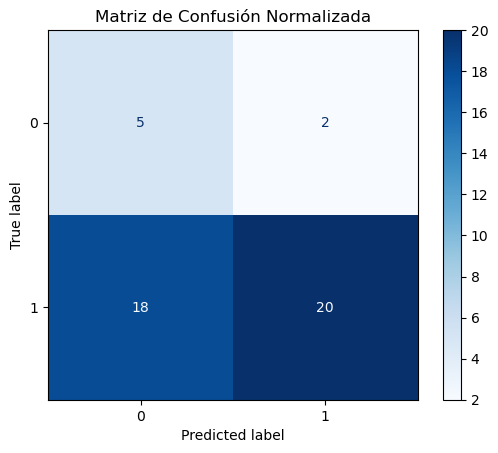


AUC: 0.701


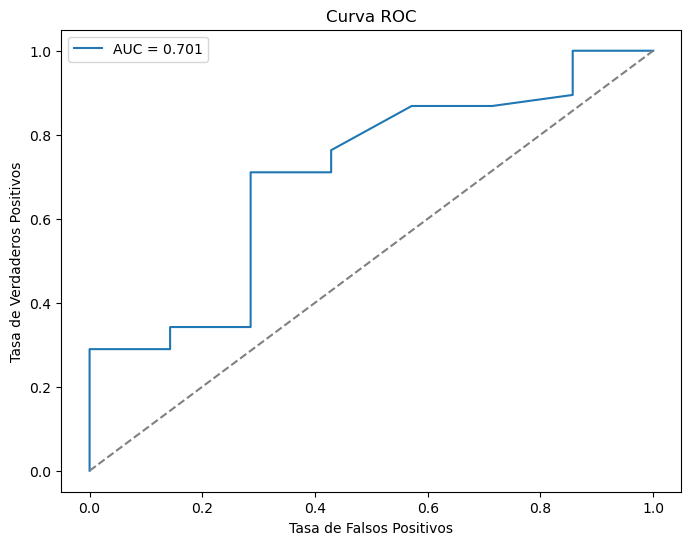


Coeficientes del modelo:
                      Variable  Coeficiente
1       count_complete_content     0.321839
5  count_correct_without_hints     0.098137
6   similar_difficulty_changes     0.073679
2                 avg_try_step     0.050881
0       avg_time_to_first_hint     0.006174
4     count_incorrect_attempts     0.000665
7               easier_changes    -0.056858
3       count_correct_attempts    -0.339203


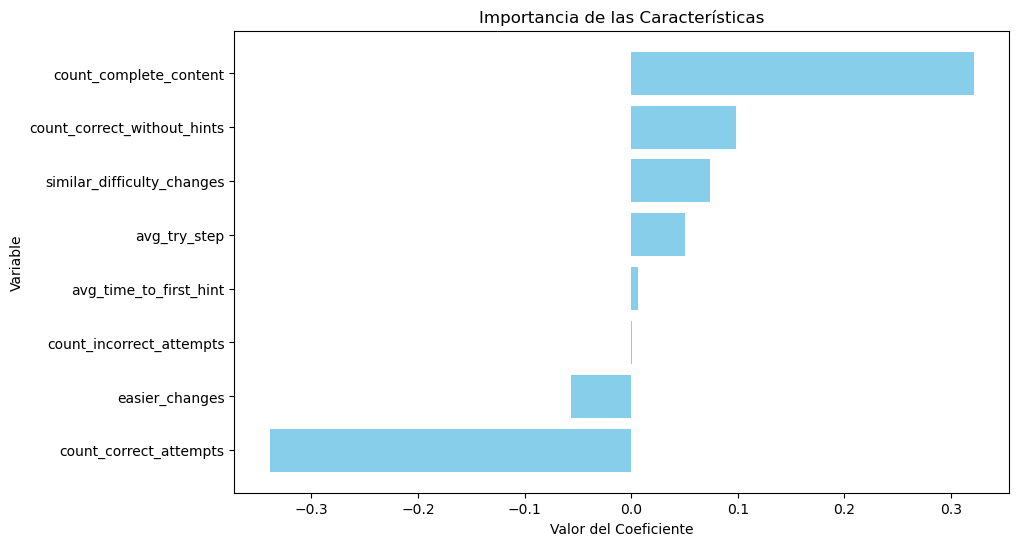

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt

# Definir las columnas de autoeficacia y las variables significativas basadas en pruebas previas
columnas_autoeficacia = [
    'SE01_conf_aprender', 'SE02_autonomia_aprender',
    'SE14R_cuesta_ejercicios', 'SE03_resolver_ejercicios',
    'SE04_estudiar_tiempo_necesario', 'SE15R_cuesta_clases',
    'SE06_entender_compleja', 'SE08_buscar_ayuda_autonomia',
    'SE09_conf_aprobar', 'SE10_identif_baches', 'SE16R_cuesta_comparacion',
    'SE11_entender_clases', 'SE13_resiliencia'
]

variables_significativas = [
    'avg_time_to_first_hint', 'count_complete_content', 'avg_try_step',
    'count_correct_attempts', 'count_incorrect_attempts',
    'count_correct_without_hints', 'similar_difficulty_changes',
    'easier_changes'
]

# Crear variables binarias para todas las columnas de autoeficacia
for col in columnas_autoeficacia:
    df.loc[:, f'{col}_binaria'] = np.where(df[col] >= 4, 1, 0)

# Seleccionar las columnas binarias de autoeficacia y la variable dependiente para el modelo
columnas_autoeficacia_binarias = [f'{col}_binaria' for col in columnas_autoeficacia]

# Crear DataFrame para el modelo
df_modelo = df[columnas_autoeficacia_binarias + variables_significativas].dropna()

# Revisar el balance de clases para cada variable de autoeficacia binaria
print("Distribución de clases para cada columna de autoeficacia binaria:")
for col in columnas_autoeficacia_binarias:
    print(f"\n{col}:")
    print(df_modelo[col].value_counts())

# Seleccionar una variable dependiente (ejemplo: SE09_conf_aprobar_binaria)
var_dependiente = 'SE09_conf_aprobar_binaria'

# Dividir datos en entrenamiento y prueba
X = df_modelo[variables_significativas]
y = df_modelo[var_dependiente]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Calcular el VIF para detectar multicolinealidad
vif_data = pd.DataFrame()
vif_data["Variable"] = variables_significativas
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVIF (Factor de Inflación de la Varianza):")
print(vif_data)

# Ajustar el modelo de regresión logística con ponderación de clases
modelo = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
modelo.fit(X_train, y_train)

# Predicciones
y_pred = modelo.predict(X_test)
y_prob = modelo.predict_proba(X_test)[:, 1]

# Evaluar el modelo
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelo.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión Normalizada")
plt.show()

# Calcular y graficar ROC-AUC
auc = roc_auc_score(y_test, y_prob)
print(f"\nAUC: {auc:.3f}")

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

# Mostrar los coeficientes del modelo
coeficientes = pd.DataFrame({
    'Variable': variables_significativas,
    'Coeficiente': modelo.coef_[0]
}).sort_values(by='Coeficiente', ascending=False)

print("\nCoeficientes del modelo:")
print(coeficientes)

# Visualizar la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(coeficientes['Variable'], coeficientes['Coeficiente'], color='skyblue')
plt.xlabel("Valor del Coeficiente")
plt.ylabel("Variable")
plt.title("Importancia de las Características")
plt.gca().invert_yaxis()
plt.show()


## TRABAJO ORDENADO


                                count        mean         std  min       25%  \
count_complete_content          224.0   14.000000   17.987041  0.0  0.000000   
avg_try_step                    224.0    2.767647    2.293793  0.0  1.000000   
count_correct_attempts          224.0   13.834821   17.946219  0.0  0.000000   
count_incorrect_attempts        224.0   68.392857   85.301508  0.0  3.000000   
proportion_hints                224.0    1.892631    2.964298  0.0  0.000000   
count_correct_without_hints     224.0    8.513393   10.727351  0.0  0.000000   
avg_time_in_question            224.0  108.092464  198.881042  0.0  0.000000   
avg_time_to_first_hint          224.0   74.837098  112.551467  0.0  0.000000   
more_difficult_changes          224.0    3.254464    4.616453  0.0  0.000000   
similar_difficulty_changes      224.0    4.558036    7.267856  0.0  0.000000   
easier_changes                  224.0   13.133929   13.901960  0.0  3.000000   
SE01_conf_aprender              224.0   

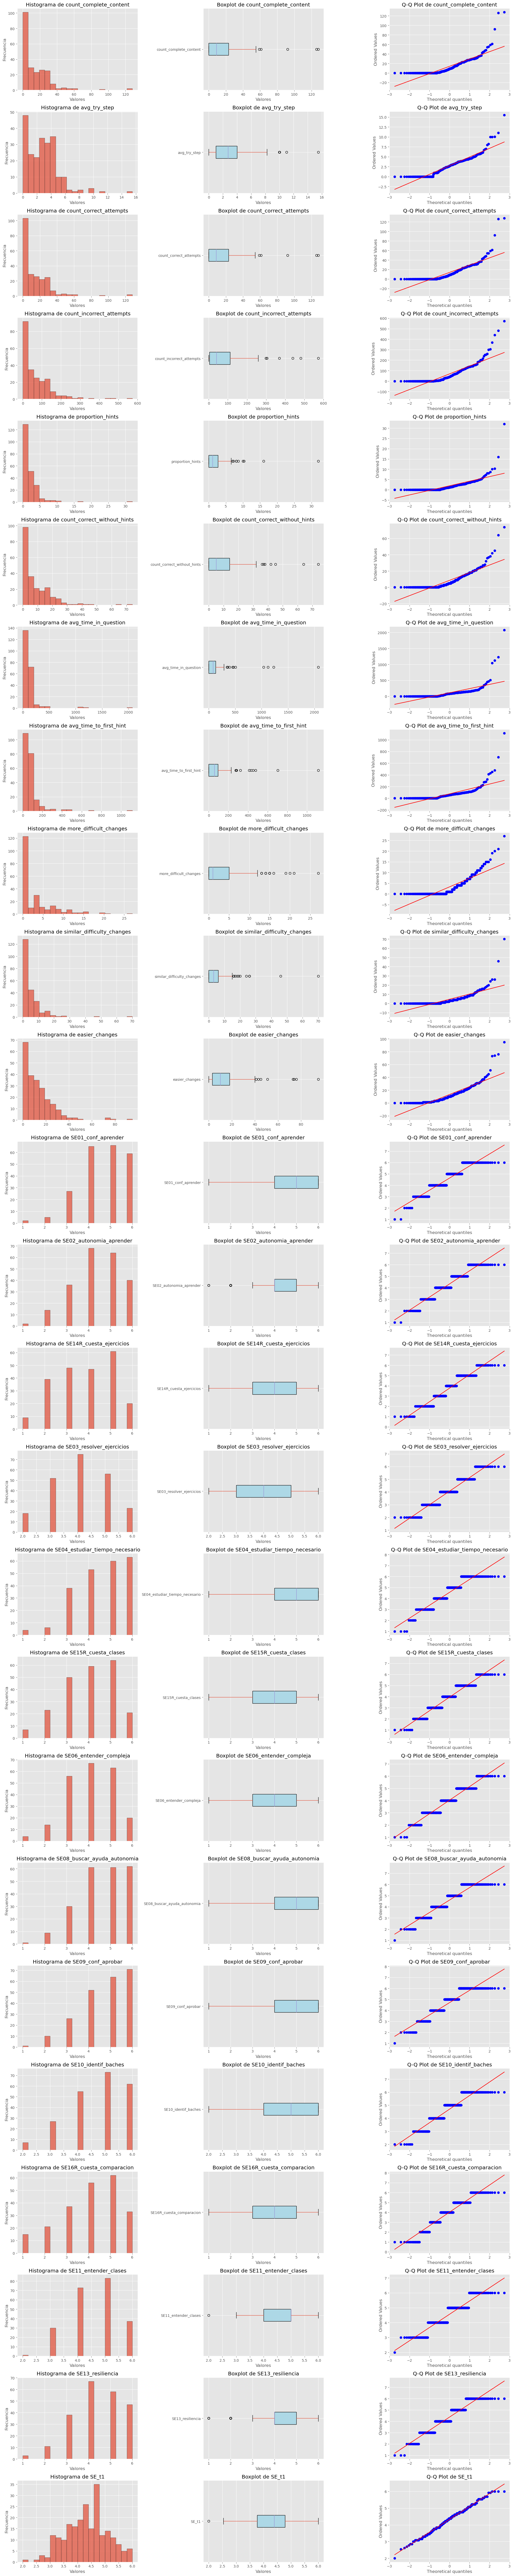

In [21]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Lista de columnas a analizar
columns = [
    'count_complete_content', 'avg_try_step', 'count_correct_attempts', 
    'count_incorrect_attempts', 'proportion_hints', 'count_correct_without_hints', 
    'avg_time_in_question', 'avg_time_to_first_hint', 'more_difficult_changes', 
    'similar_difficulty_changes', 'easier_changes', 'SE01_conf_aprender', 
    'SE02_autonomia_aprender', 'SE14R_cuesta_ejercicios', 'SE03_resolver_ejercicios', 
    'SE04_estudiar_tiempo_necesario', 'SE15R_cuesta_clases', 'SE06_entender_compleja', 
    'SE08_buscar_ayuda_autonomia', 'SE09_conf_aprobar', 'SE10_identif_baches', 
    'SE16R_cuesta_comparacion', 'SE11_entender_clases', 'SE13_resiliencia', 'SE_t1'
]

# Verificar que las columnas existan en el DataFrame
columns = [col for col in columns if col in df.columns]

# Estadísticas descriptivas
stats_summary = df[columns].describe().T
stats_summary['variance'] = df[columns].var()
print(stats_summary)

# Configuración de gráficos (ajustar el tamaño de los gráficos)
fig, axes = plt.subplots(nrows=len(columns), ncols=3, figsize=(20, len(columns)*4))  # Aumentamos la altura
axes = axes.flatten()

# Crear histogramas, boxplots y Q-Q plots
for i, col in enumerate(columns):
    # Histograma
    df[col].hist(ax=axes[3*i], bins=20, edgecolor='black', alpha=0.7)
    axes[3*i].set_title(f'Histograma de {col}')
    axes[3*i].set_xlabel('Valores')
    axes[3*i].set_ylabel('Frecuencia')

    # Boxplot
    df.boxplot(column=col, ax=axes[3*i+1], vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
    axes[3*i+1].set_title(f'Boxplot de {col}')
    axes[3*i+1].set_xlabel('Valores')

    # Q-Q plot
    stats.probplot(df[col].dropna(), dist="norm", plot=axes[3*i+2])
    axes[3*i+2].set_title(f'Q-Q Plot de {col}')

# Ajustar diseño
plt.tight_layout()

# Guardar los gráficos en un archivo (por ejemplo, como PNG)
plt.savefig('graficos_comportamiento.png', dpi=300)

# Mostrar los gráficos
plt.show()



In [22]:
import scipy.stats as stats
import pandas as pd

se_variables = [
    'SE01_conf_aprender', 'SE02_autonomia_aprender', 'SE14R_cuesta_ejercicios',
    'SE03_resolver_ejercicios', 'SE04_estudiar_tiempo_necesario', 
    'SE15R_cuesta_clases', 'SE06_entender_compleja', 
    'SE08_buscar_ayuda_autonomia', 'SE09_conf_aprobar', 'SE10_identif_baches',
    'SE16R_cuesta_comparacion', 'SE11_entender_clases', 'SE13_resiliencia','SE_t1'
]

results = []

high_efficacy = df[df['SE_t1'] > 3]
low_efficacy = df[df['SE_t1'] <= 3]

# Evaluar normalidad y homogeneidad para cada variable de autoeficacia
for se_var in se_variables:
    if se_var in df.columns:
        # Prueba de Shapiro-Wilk para normalidad (alto y bajo autoeficacia)
        stat_sw_high, p_sw_high = stats.shapiro(high_efficacy[se_var].dropna())
        stat_sw_low, p_sw_low = stats.shapiro(low_efficacy[se_var].dropna())

        # Prueba de Levene para homogeneidad de varianzas
        stat_levene, p_levene = stats.levene(
            high_efficacy[se_var].dropna(), 
            low_efficacy[se_var].dropna()
        )

        
        test_to_apply = "Paramétrico (t-test)" if p_sw_high > 0.05 and p_sw_low > 0.05 and p_levene > 0.05 else "No paramétrico (Mann-Whitney U)"
        
        results.append({
            'Variable SE': se_var,
            'Shapiro-Wilk High (p-value)': p_sw_high,
            'Shapiro-Wilk Low (p-value)': p_sw_low,
            'Levene (p-value)': p_levene,
            'Test a utilizar': test_to_apply
        })

results_df = pd.DataFrame(results)
print(results_df)


                       Variable SE  Shapiro-Wilk High (p-value)  \
0               SE01_conf_aprender                 5.857113e-12   
1          SE02_autonomia_aprender                 3.818583e-10   
2          SE14R_cuesta_ejercicios                 3.359544e-09   
3         SE03_resolver_ejercicios                 9.309497e-10   
4   SE04_estudiar_tiempo_necesario                 1.048104e-11   
5              SE15R_cuesta_clases                 3.847859e-09   
6           SE06_entender_compleja                 1.407005e-09   
7      SE08_buscar_ayuda_autonomia                 8.966331e-12   
8                SE09_conf_aprobar                 1.018661e-12   
9              SE10_identif_baches                 3.049036e-12   
10        SE16R_cuesta_comparacion                 8.737235e-10   
11            SE11_entender_clases                 1.051560e-11   
12                SE13_resiliencia                 2.886175e-10   
13                           SE_t1                 1.489624e-0

In [14]:
import scipy.stats as stats

columnas_comportamiento = [
    'count_complete_content', 'avg_try_step',
       'count_correct_attempts', 'count_incorrect_attempts',
       'proportion_hints', 'count_correct_without_hints', 'avg_time_in_question',
       'avg_time_to_first_hint', 'more_difficult_changes',
       'similar_difficulty_changes', 'easier_changes'
]

columnas_autoeficacia = [
    'SE01_conf_aprender', 'SE02_autonomia_aprender',
    'SE14R_cuesta_ejercicios', 'SE03_resolver_ejercicios',
    'SE04_estudiar_tiempo_necesario', 'SE15R_cuesta_clases',
    'SE06_entender_compleja', 'SE08_buscar_ayuda_autonomia',
    'SE09_conf_aprobar', 'SE10_identif_baches', 'SE16R_cuesta_comparacion',
    'SE11_entender_clases', 'SE13_resiliencia','SE_t1'
]

def realizar_pruebas(df, columnas_comportamiento, columnas_autoeficacia):
    resultados = {}
    columnas_significativas = []

    for col_auto in columnas_autoeficacia:
        grupo_bajo = df[(df[col_auto] >= 1) & (df[col_auto] <= 3)]
        grupo_alto = df[(df[col_auto] >= 4) & (df[col_auto] <= 6)]
        
        if grupo_bajo.empty or grupo_alto.empty:
            continue
        
        for col_comport in columnas_comportamiento:
            datos_bajo_comport = grupo_bajo[col_comport].dropna()
            datos_alto_comport = grupo_alto[col_comport].dropna()

            stat_bajo, p_bajo = stats.shapiro(datos_bajo_comport)
            stat_alto, p_alto = stats.shapiro(datos_alto_comport)

            if p_bajo > 0.05 and p_alto > 0.05:
                stat_t, p_t = stats.ttest_ind(datos_bajo_comport, datos_alto_comport, equal_var=False)
                test = "Two-Sample t-test"
            else:
                stat_mw, p_mw = stats.mannwhitneyu(datos_bajo_comport, datos_alto_comport)
                stat_t, p_t = stat_mw, p_mw
                test = "Mann-Whitney U test"
            
            if p_t < 0.05:
                if col_comport not in resultados:
                    resultados[col_comport] = []
                
                resultados[col_comport].append({
                    'autoeficacia_column': col_auto, 
                    'test': test, 
                    'p_value': p_t
                })
                
                if col_comport not in columnas_significativas:
                    columnas_significativas.append(col_comport)
    
    return resultados, columnas_significativas

resultados_comparaciones, columnas_significativas = realizar_pruebas(df, columnas_comportamiento, columnas_autoeficacia)

for col_comport, resultado in resultados_comparaciones.items():
    for r in resultado:
        print(f"{col_comport} | Autoeficacia columna: {r['autoeficacia_column']} | Test: {r['test']} | P-valor = {r['p_value']}")

print("\nColumnas de comportamiento significativas:")
print(columnas_significativas)

avg_time_to_first_hint | Autoeficacia columna: SE14R_cuesta_ejercicios | Test: Mann-Whitney U test | P-valor = 0.018463031878532345
avg_time_to_first_hint | Autoeficacia columna: SE09_conf_aprobar | Test: Mann-Whitney U test | P-valor = 0.00393449029979772
count_complete_content | Autoeficacia columna: SE09_conf_aprobar | Test: Mann-Whitney U test | P-valor = 0.031497248422668954
avg_try_step | Autoeficacia columna: SE09_conf_aprobar | Test: Mann-Whitney U test | P-valor = 0.04960985992062607
count_correct_attempts | Autoeficacia columna: SE09_conf_aprobar | Test: Mann-Whitney U test | P-valor = 0.034017546171254735
count_incorrect_attempts | Autoeficacia columna: SE09_conf_aprobar | Test: Mann-Whitney U test | P-valor = 0.01656690335365725
count_correct_without_hints | Autoeficacia columna: SE09_conf_aprobar | Test: Mann-Whitney U test | P-valor = 0.015768406363977125
similar_difficulty_changes | Autoeficacia columna: SE09_conf_aprobar | Test: Mann-Whitney U test | P-valor = 0.0135241



Evaluando modelo con SE01_conf_aprender_binaria como variable dependiente

VIF (Factor de Inflación de la Varianza):
                      Variable          VIF
0       avg_time_to_first_hint     1.814183
1       count_complete_content  3450.927126
2                 avg_try_step     2.854706
3       count_correct_attempts  2941.195012
4     count_incorrect_attempts    18.797614
5  count_correct_without_hints    29.203148
6   similar_difficulty_changes     5.450361
7               easier_changes     7.804161

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.19      0.71      0.29         7
           1       0.89      0.42      0.57        38

    accuracy                           0.47        45
   macro avg       0.54      0.57      0.43        45
weighted avg       0.78      0.47      0.53        45



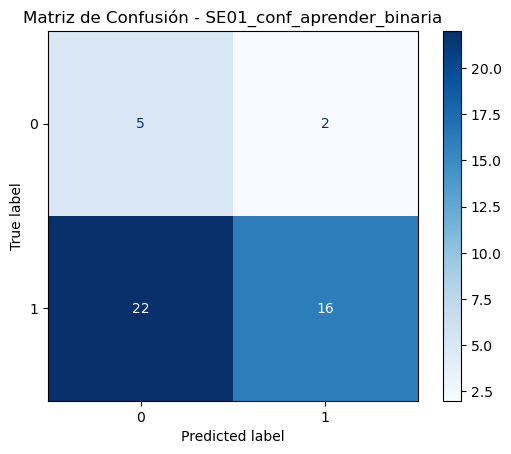


AUC para SE01_conf_aprender_binaria: 0.492


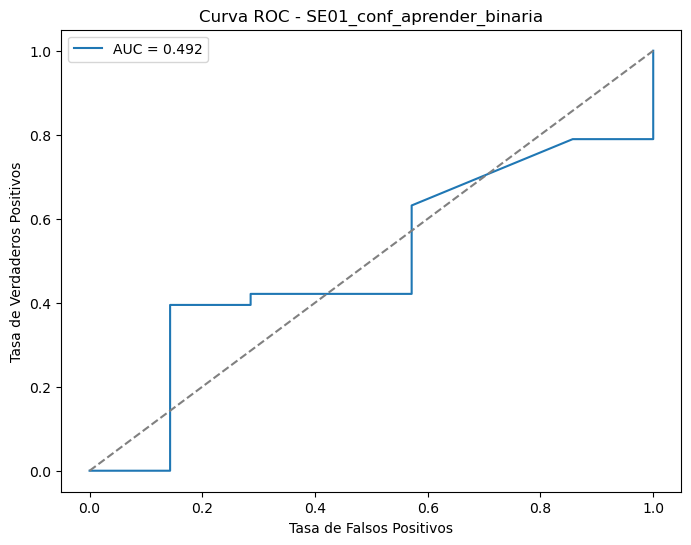


Coeficientes del modelo para SE01_conf_aprender_binaria:
                      Variable  Coeficiente
1       count_complete_content     0.278906
2                 avg_try_step     0.237042
6   similar_difficulty_changes     0.155534
5  count_correct_without_hints     0.106047
4     count_incorrect_attempts     0.006984
0       avg_time_to_first_hint    -0.000156
7               easier_changes    -0.022609
3       count_correct_attempts    -0.408245


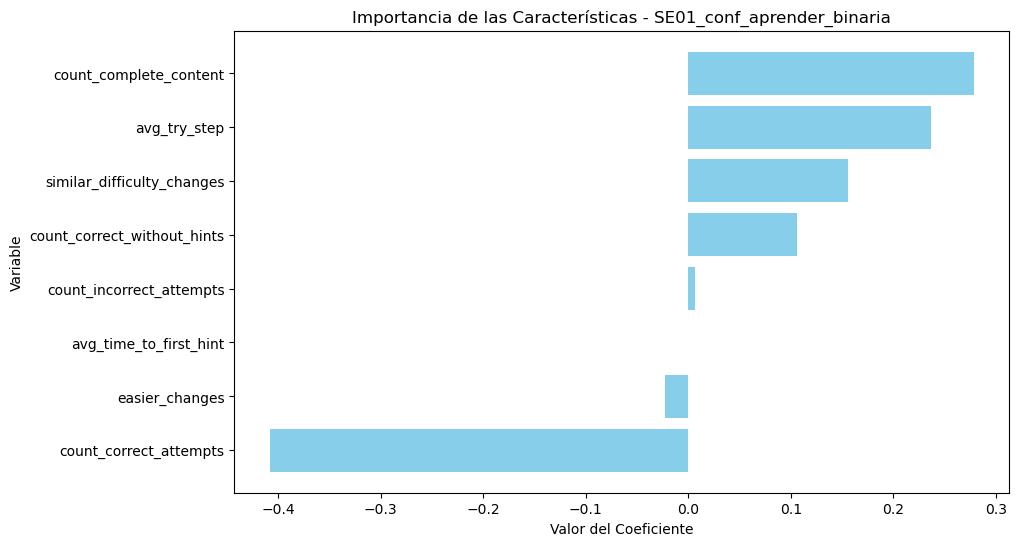



Evaluando modelo con SE02_autonomia_aprender_binaria como variable dependiente

VIF (Factor de Inflación de la Varianza):
                      Variable          VIF
0       avg_time_to_first_hint     1.814183
1       count_complete_content  3450.927126
2                 avg_try_step     2.854706
3       count_correct_attempts  2941.195012
4     count_incorrect_attempts    18.797614
5  count_correct_without_hints    29.203148
6   similar_difficulty_changes     5.450361
7               easier_changes     7.804161

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.27      0.40      0.32        10
           1       0.80      0.69      0.74        35

    accuracy                           0.62        45
   macro avg       0.53      0.54      0.53        45
weighted avg       0.68      0.62      0.65        45



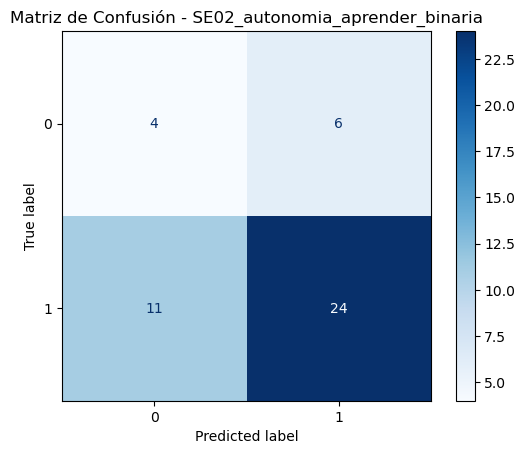


AUC para SE02_autonomia_aprender_binaria: 0.557


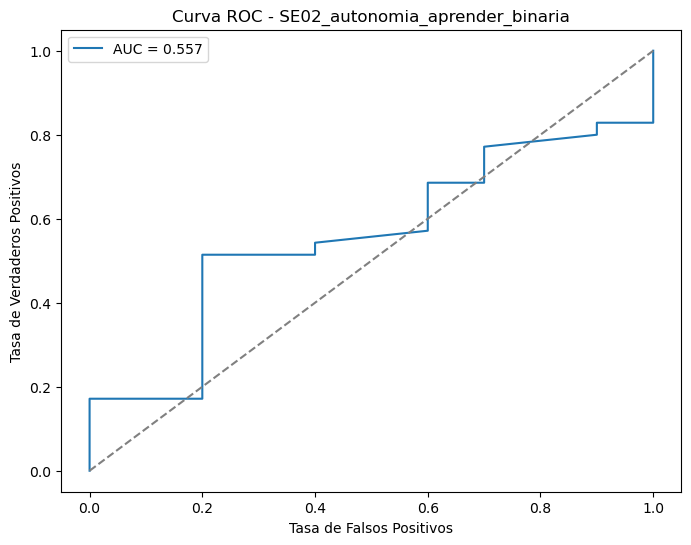


Coeficientes del modelo para SE02_autonomia_aprender_binaria:
                      Variable  Coeficiente
3       count_correct_attempts     0.250115
5  count_correct_without_hints     0.078965
2                 avg_try_step     0.073999
6   similar_difficulty_changes     0.056262
7               easier_changes     0.043292
4     count_incorrect_attempts     0.007220
0       avg_time_to_first_hint     0.001023
1       count_complete_content    -0.392151


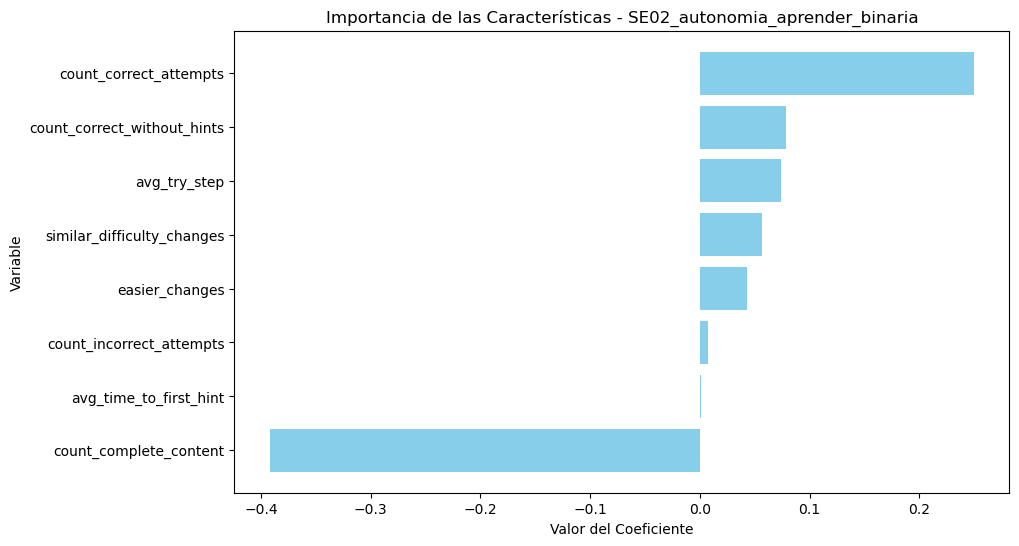



Evaluando modelo con SE14R_cuesta_ejercicios_binaria como variable dependiente

VIF (Factor de Inflación de la Varianza):
                      Variable          VIF
0       avg_time_to_first_hint     1.814183
1       count_complete_content  3450.927126
2                 avg_try_step     2.854706
3       count_correct_attempts  2941.195012
4     count_incorrect_attempts    18.797614
5  count_correct_without_hints    29.203148
6   similar_difficulty_changes     5.450361
7               easier_changes     7.804161

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.38      0.42      0.40        19
           1       0.54      0.50      0.52        26

    accuracy                           0.47        45
   macro avg       0.46      0.46      0.46        45
weighted avg       0.47      0.47      0.47        45



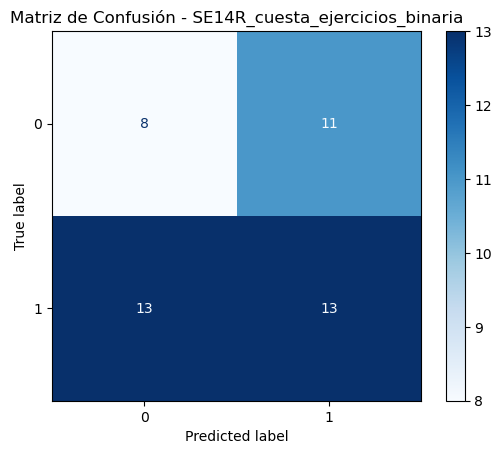


AUC para SE14R_cuesta_ejercicios_binaria: 0.523


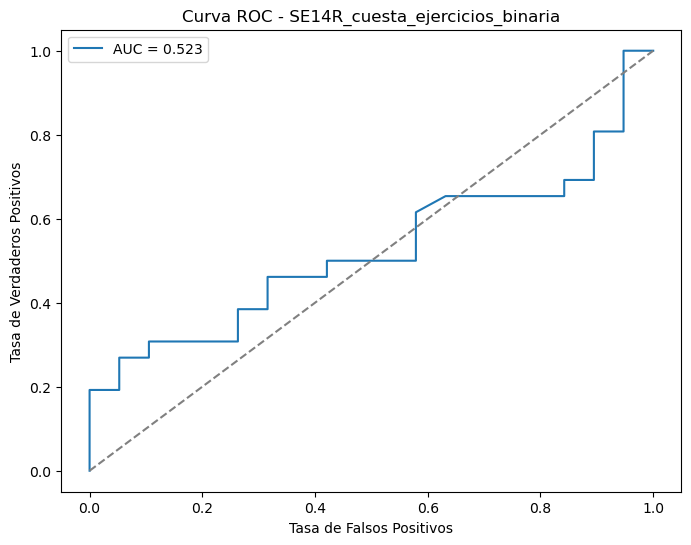


Coeficientes del modelo para SE14R_cuesta_ejercicios_binaria:
                      Variable  Coeficiente
1       count_complete_content     0.075913
5  count_correct_without_hints     0.034282
6   similar_difficulty_changes     0.029416
0       avg_time_to_first_hint     0.007029
2                 avg_try_step    -0.000920
4     count_incorrect_attempts    -0.005420
7               easier_changes    -0.022055
3       count_correct_attempts    -0.078410


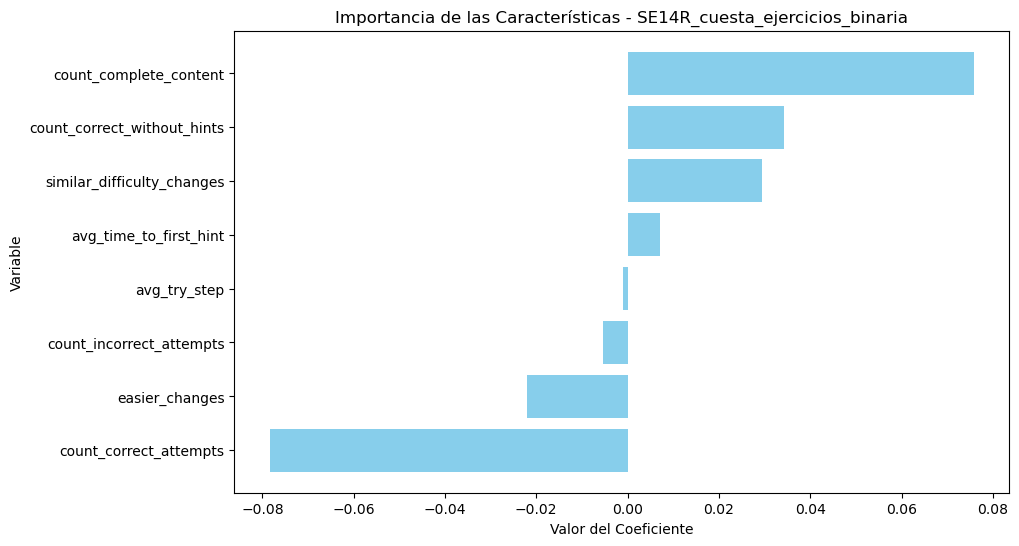



Evaluando modelo con SE03_resolver_ejercicios_binaria como variable dependiente

VIF (Factor de Inflación de la Varianza):
                      Variable          VIF
0       avg_time_to_first_hint     1.814183
1       count_complete_content  3450.927126
2                 avg_try_step     2.854706
3       count_correct_attempts  2941.195012
4     count_incorrect_attempts    18.797614
5  count_correct_without_hints    29.203148
6   similar_difficulty_changes     5.450361
7               easier_changes     7.804161

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.33      0.57      0.42        14
           1       0.71      0.48      0.58        31

    accuracy                           0.51        45
   macro avg       0.52      0.53      0.50        45
weighted avg       0.60      0.51      0.53        45



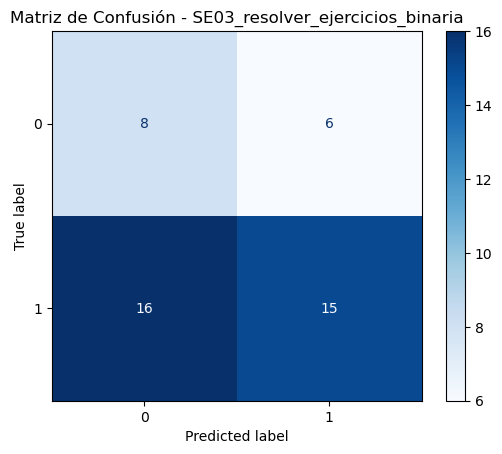


AUC para SE03_resolver_ejercicios_binaria: 0.532


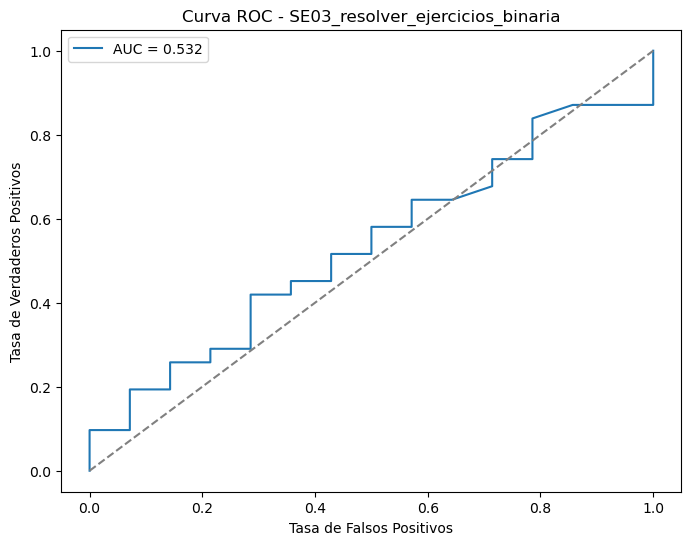


Coeficientes del modelo para SE03_resolver_ejercicios_binaria:
                      Variable  Coeficiente
3       count_correct_attempts     0.351354
2                 avg_try_step     0.140758
5  count_correct_without_hints     0.074784
7               easier_changes     0.039584
0       avg_time_to_first_hint     0.001015
4     count_incorrect_attempts    -0.007941
6   similar_difficulty_changes    -0.024618
1       count_complete_content    -0.369579


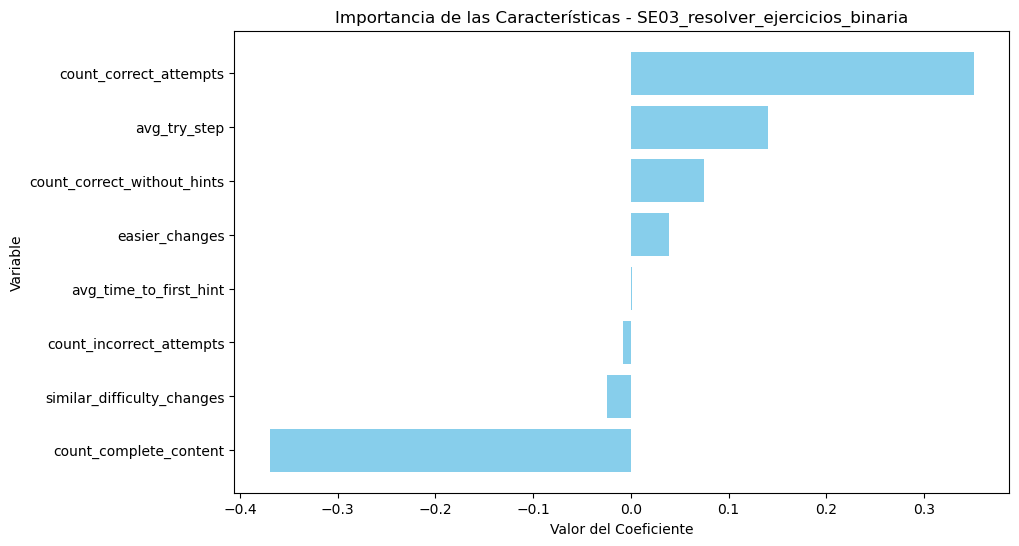



Evaluando modelo con SE04_estudiar_tiempo_necesario_binaria como variable dependiente

VIF (Factor de Inflación de la Varianza):
                      Variable          VIF
0       avg_time_to_first_hint     1.814183
1       count_complete_content  3450.927126
2                 avg_try_step     2.854706
3       count_correct_attempts  2941.195012
4     count_incorrect_attempts    18.797614
5  count_correct_without_hints    29.203148
6   similar_difficulty_changes     5.450361
7               easier_changes     7.804161

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.13      0.20      0.16        10
           1       0.73      0.63      0.68        35

    accuracy                           0.53        45
   macro avg       0.43      0.41      0.42        45
weighted avg       0.60      0.53      0.56        45



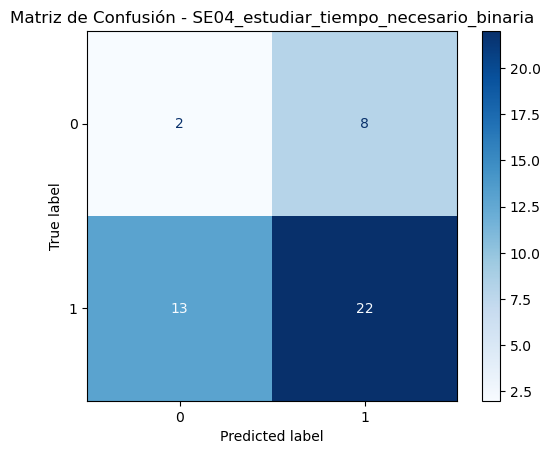


AUC para SE04_estudiar_tiempo_necesario_binaria: 0.414


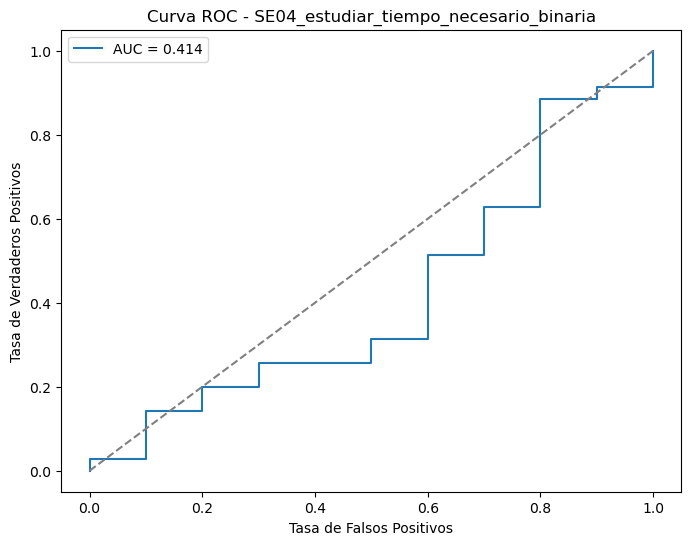


Coeficientes del modelo para SE04_estudiar_tiempo_necesario_binaria:
                      Variable  Coeficiente
3       count_correct_attempts     0.062738
6   similar_difficulty_changes     0.013334
7               easier_changes     0.011729
4     count_incorrect_attempts     0.006035
2                 avg_try_step     0.000164
0       avg_time_to_first_hint    -0.000861
5  count_correct_without_hints    -0.043211
1       count_complete_content    -0.076884


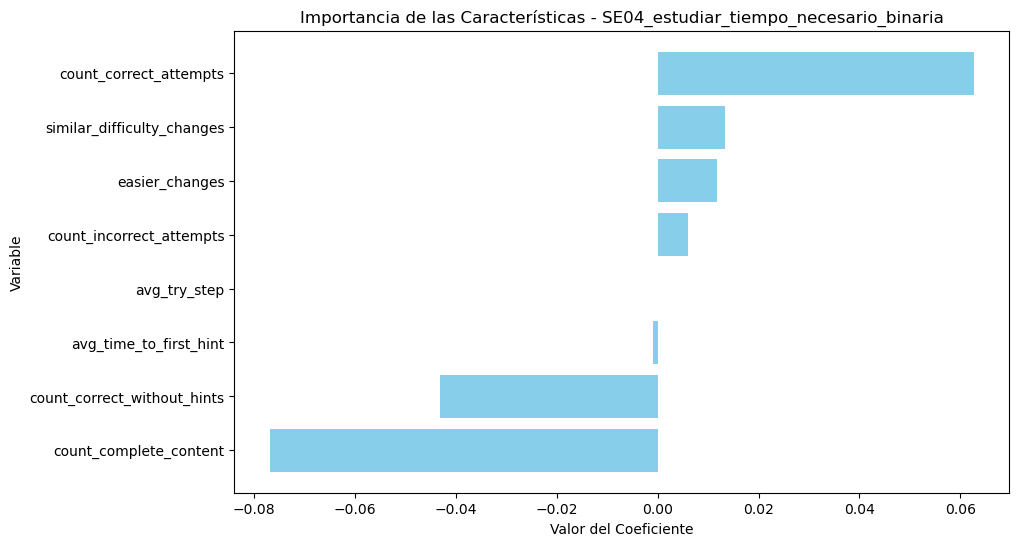



Evaluando modelo con SE15R_cuesta_clases_binaria como variable dependiente

VIF (Factor de Inflación de la Varianza):
                      Variable          VIF
0       avg_time_to_first_hint     1.814183
1       count_complete_content  3450.927126
2                 avg_try_step     2.854706
3       count_correct_attempts  2941.195012
4     count_incorrect_attempts    18.797614
5  count_correct_without_hints    29.203148
6   similar_difficulty_changes     5.450361
7               easier_changes     7.804161

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.43      0.56      0.49        16
           1       0.71      0.59      0.64        29

    accuracy                           0.58        45
   macro avg       0.57      0.57      0.56        45
weighted avg       0.61      0.58      0.59        45



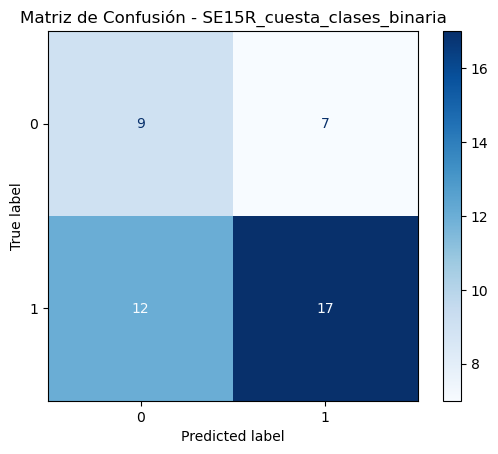


AUC para SE15R_cuesta_clases_binaria: 0.478


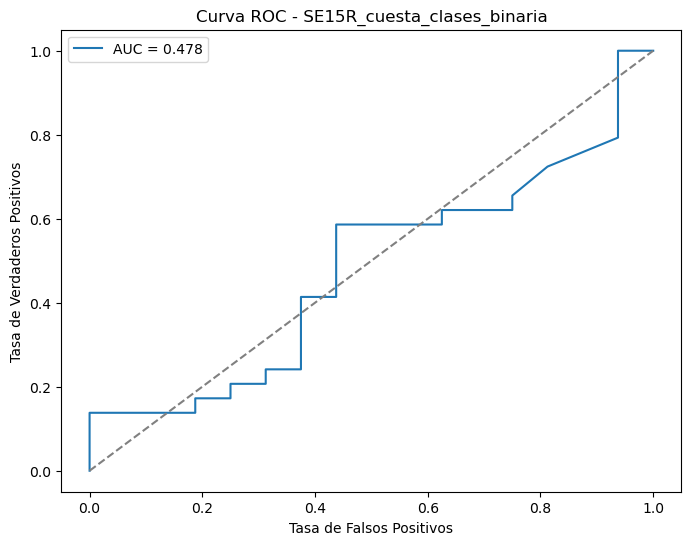


Coeficientes del modelo para SE15R_cuesta_clases_binaria:
                      Variable  Coeficiente
1       count_complete_content     0.282654
7               easier_changes     0.039395
0       avg_time_to_first_hint     0.005029
4     count_incorrect_attempts    -0.000824
5  count_correct_without_hints    -0.018782
6   similar_difficulty_changes    -0.032219
2                 avg_try_step    -0.101159
3       count_correct_attempts    -0.278649


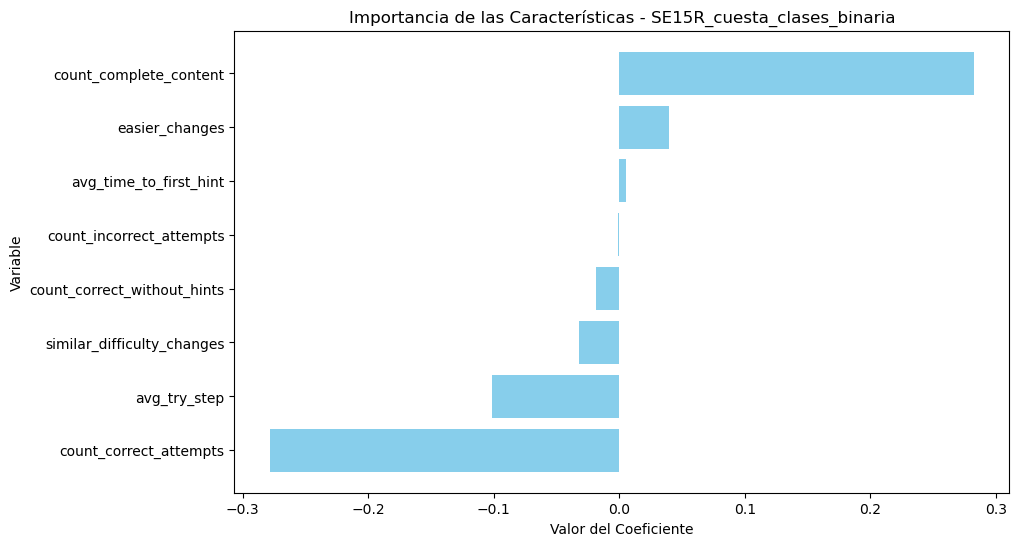



Evaluando modelo con SE06_entender_compleja_binaria como variable dependiente

VIF (Factor de Inflación de la Varianza):
                      Variable          VIF
0       avg_time_to_first_hint     1.814183
1       count_complete_content  3450.927126
2                 avg_try_step     2.854706
3       count_correct_attempts  2941.195012
4     count_incorrect_attempts    18.797614
5  count_correct_without_hints    29.203148
6   similar_difficulty_changes     5.450361
7               easier_changes     7.804161

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.25      0.33      0.29        15
           1       0.60      0.50      0.55        30

    accuracy                           0.44        45
   macro avg       0.42      0.42      0.42        45
weighted avg       0.48      0.44      0.46        45



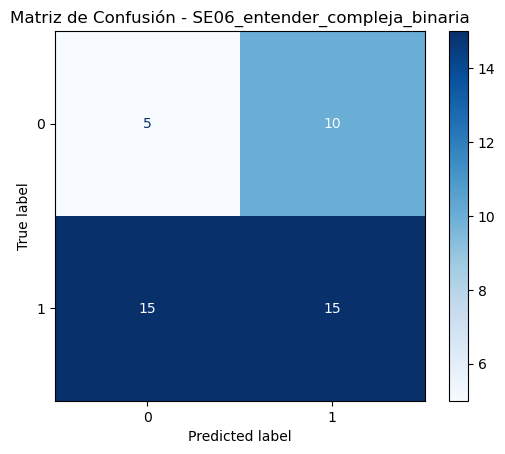


AUC para SE06_entender_compleja_binaria: 0.412


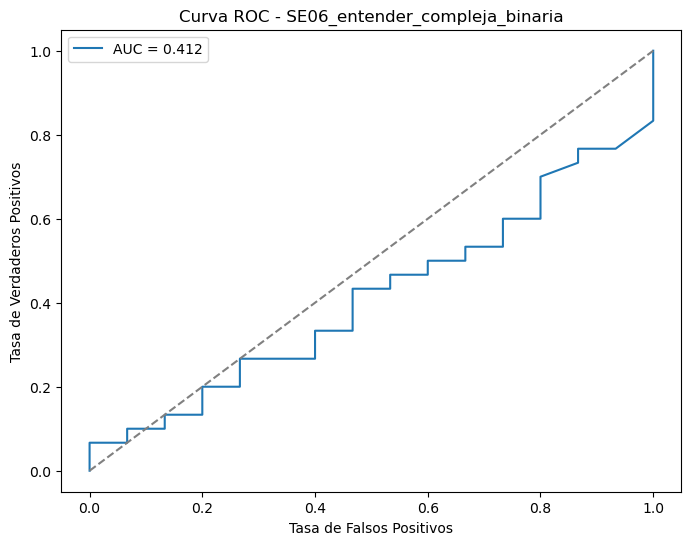


Coeficientes del modelo para SE06_entender_compleja_binaria:
                      Variable  Coeficiente
1       count_complete_content     0.179157
2                 avg_try_step     0.120087
7               easier_changes     0.015372
0       avg_time_to_first_hint     0.001349
4     count_incorrect_attempts    -0.006488
5  count_correct_without_hints    -0.009997
6   similar_difficulty_changes    -0.027960
3       count_correct_attempts    -0.144575


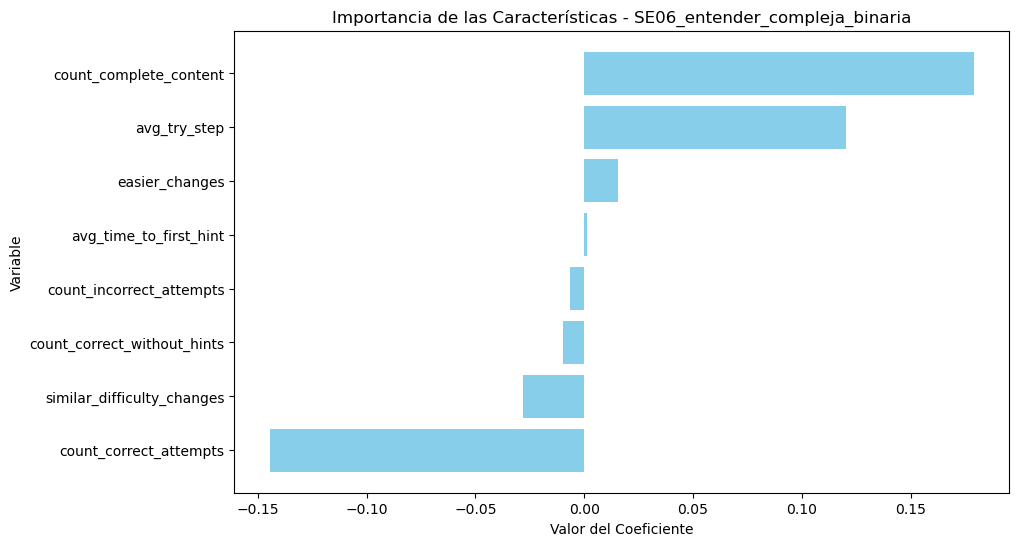



Evaluando modelo con SE08_buscar_ayuda_autonomia_binaria como variable dependiente

VIF (Factor de Inflación de la Varianza):
                      Variable          VIF
0       avg_time_to_first_hint     1.814183
1       count_complete_content  3450.927126
2                 avg_try_step     2.854706
3       count_correct_attempts  2941.195012
4     count_incorrect_attempts    18.797614
5  count_correct_without_hints    29.203148
6   similar_difficulty_changes     5.450361
7               easier_changes     7.804161

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.18      0.62      0.28         8
           1       0.82      0.38      0.52        37

    accuracy                           0.42        45
   macro avg       0.50      0.50      0.40        45
weighted avg       0.71      0.42      0.48        45



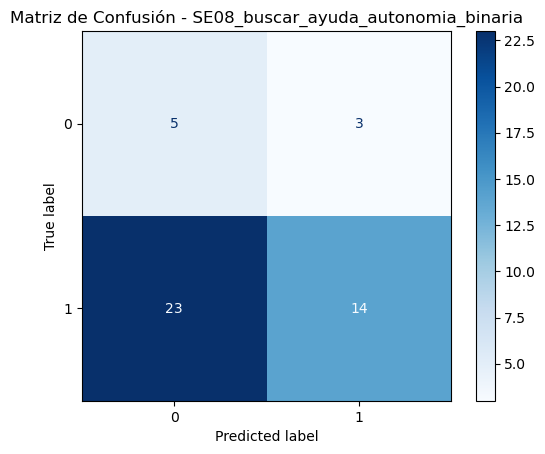


AUC para SE08_buscar_ayuda_autonomia_binaria: 0.385


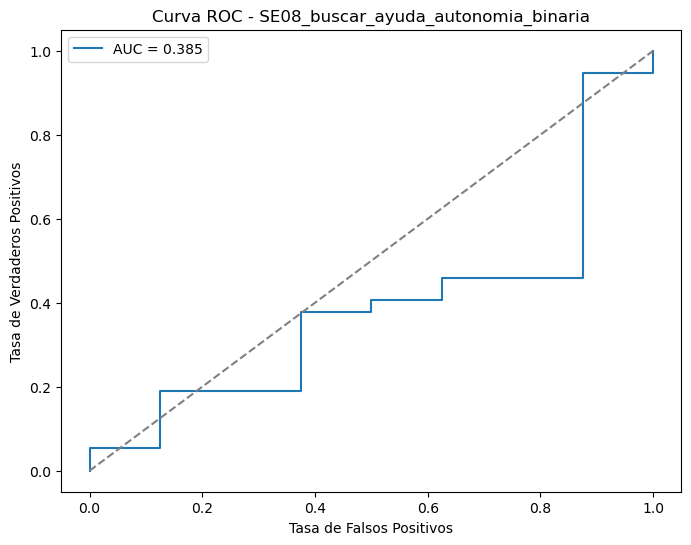


Coeficientes del modelo para SE08_buscar_ayuda_autonomia_binaria:
                      Variable  Coeficiente
1       count_complete_content     0.340546
2                 avg_try_step     0.072412
6   similar_difficulty_changes     0.013194
0       avg_time_to_first_hint     0.005382
4     count_incorrect_attempts    -0.007435
7               easier_changes    -0.016504
5  count_correct_without_hints    -0.037510
3       count_correct_attempts    -0.284288


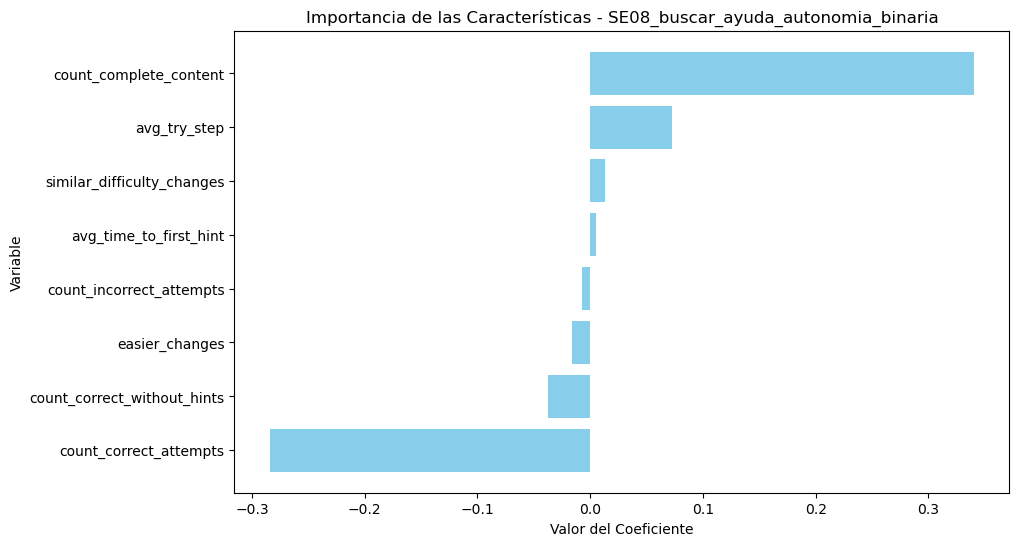



Evaluando modelo con SE09_conf_aprobar_binaria como variable dependiente

VIF (Factor de Inflación de la Varianza):
                      Variable          VIF
0       avg_time_to_first_hint     1.814183
1       count_complete_content  3450.927126
2                 avg_try_step     2.854706
3       count_correct_attempts  2941.195012
4     count_incorrect_attempts    18.797614
5  count_correct_without_hints    29.203148
6   similar_difficulty_changes     5.450361
7               easier_changes     7.804161

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.22      0.71      0.33         7
           1       0.91      0.53      0.67        38

    accuracy                           0.56        45
   macro avg       0.56      0.62      0.50        45
weighted avg       0.80      0.56      0.61        45



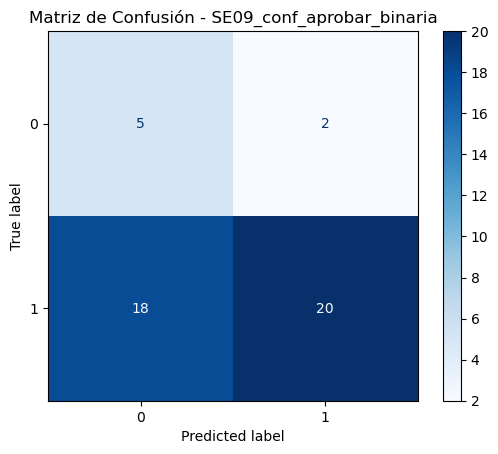


AUC para SE09_conf_aprobar_binaria: 0.701


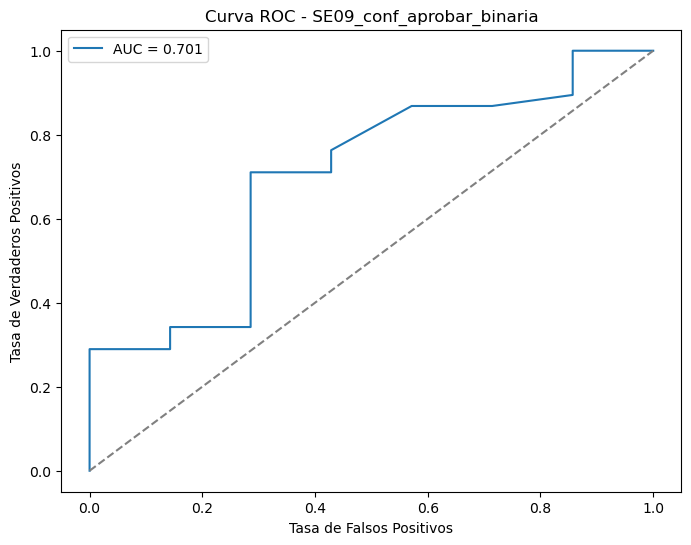


Coeficientes del modelo para SE09_conf_aprobar_binaria:
                      Variable  Coeficiente
1       count_complete_content     0.321839
5  count_correct_without_hints     0.098137
6   similar_difficulty_changes     0.073679
2                 avg_try_step     0.050881
0       avg_time_to_first_hint     0.006174
4     count_incorrect_attempts     0.000665
7               easier_changes    -0.056858
3       count_correct_attempts    -0.339203


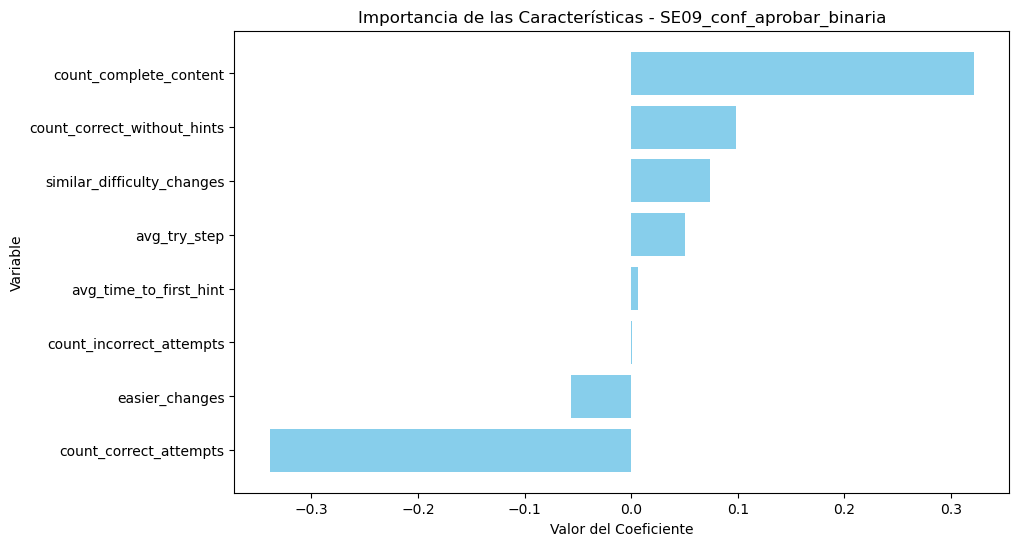



Evaluando modelo con SE10_identif_baches_binaria como variable dependiente

VIF (Factor de Inflación de la Varianza):
                      Variable          VIF
0       avg_time_to_first_hint     1.814183
1       count_complete_content  3450.927126
2                 avg_try_step     2.854706
3       count_correct_attempts  2941.195012
4     count_incorrect_attempts    18.797614
5  count_correct_without_hints    29.203148
6   similar_difficulty_changes     5.450361
7               easier_changes     7.804161

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.09      0.29      0.14         7
           1       0.78      0.47      0.59        38

    accuracy                           0.44        45
   macro avg       0.44      0.38      0.36        45
weighted avg       0.68      0.44      0.52        45



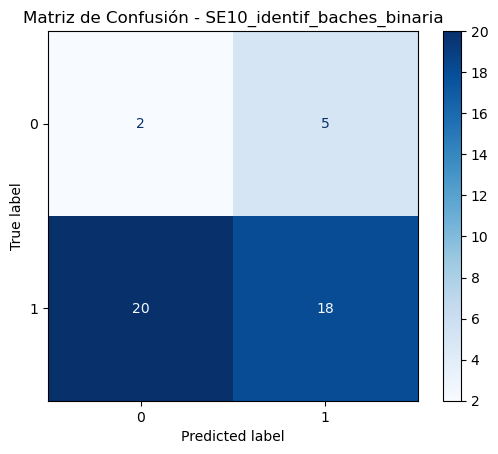


AUC para SE10_identif_baches_binaria: 0.305


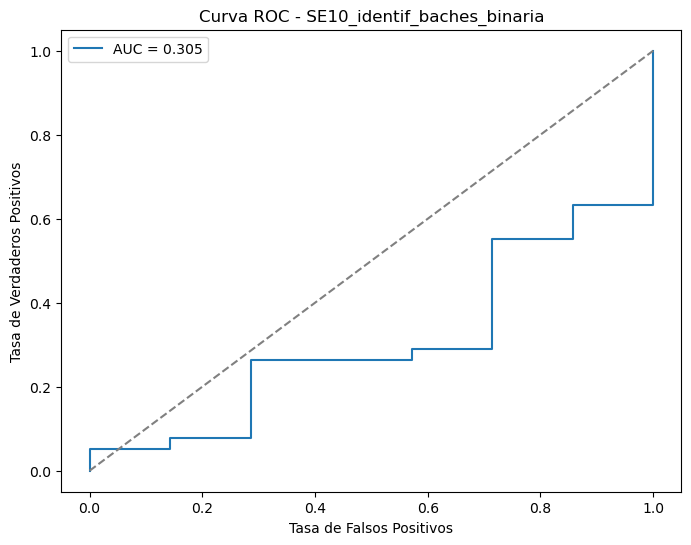


Coeficientes del modelo para SE10_identif_baches_binaria:
                      Variable  Coeficiente
2                 avg_try_step     0.195115
6   similar_difficulty_changes     0.046779
7               easier_changes     0.022343
3       count_correct_attempts     0.005905
4     count_incorrect_attempts     0.000346
0       avg_time_to_first_hint    -0.001061
1       count_complete_content    -0.015044
5  count_correct_without_hints    -0.023452


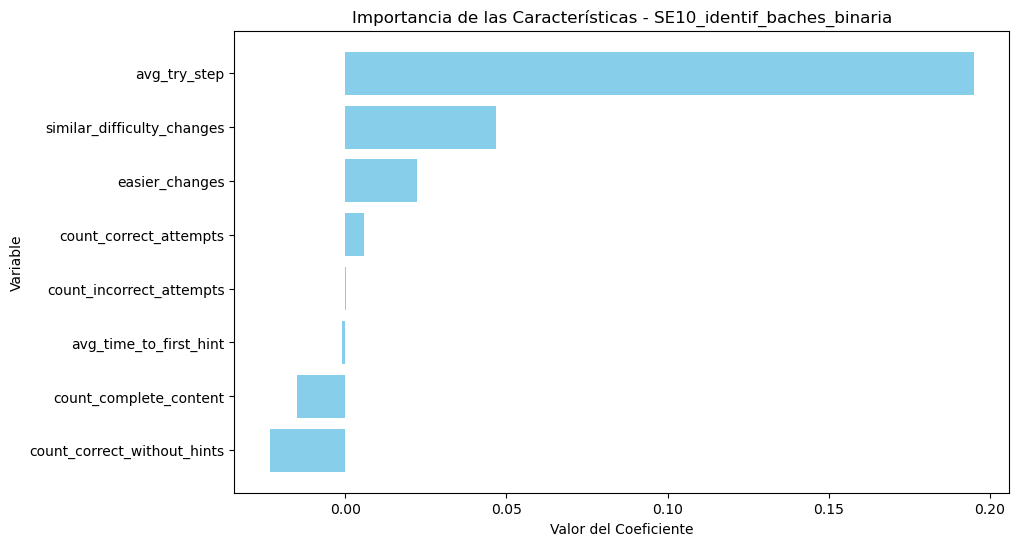



Evaluando modelo con SE16R_cuesta_comparacion_binaria como variable dependiente

VIF (Factor de Inflación de la Varianza):
                      Variable          VIF
0       avg_time_to_first_hint     1.814183
1       count_complete_content  3450.927126
2                 avg_try_step     2.854706
3       count_correct_attempts  2941.195012
4     count_incorrect_attempts    18.797614
5  count_correct_without_hints    29.203148
6   similar_difficulty_changes     5.450361
7               easier_changes     7.804161

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.27      0.47      0.34        15
           1       0.58      0.37      0.45        30

    accuracy                           0.40        45
   macro avg       0.42      0.42      0.40        45
weighted avg       0.48      0.40      0.41        45



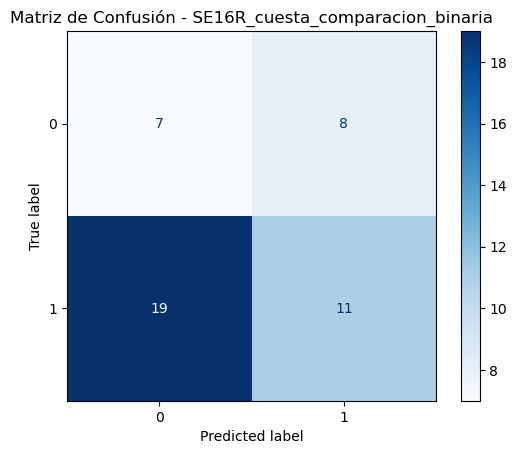


AUC para SE16R_cuesta_comparacion_binaria: 0.356


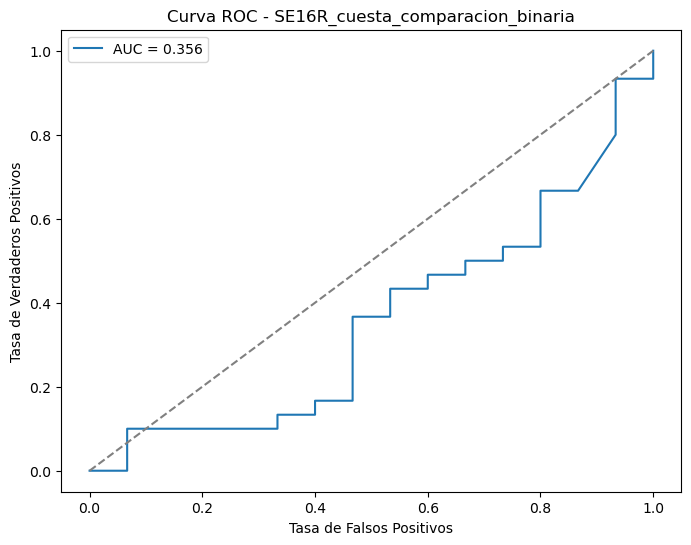


Coeficientes del modelo para SE16R_cuesta_comparacion_binaria:
                      Variable  Coeficiente
2                 avg_try_step     0.207414
3       count_correct_attempts     0.115400
5  count_correct_without_hints     0.096746
7               easier_changes     0.028147
6   similar_difficulty_changes     0.027521
0       avg_time_to_first_hint    -0.001552
4     count_incorrect_attempts    -0.003252
1       count_complete_content    -0.196495


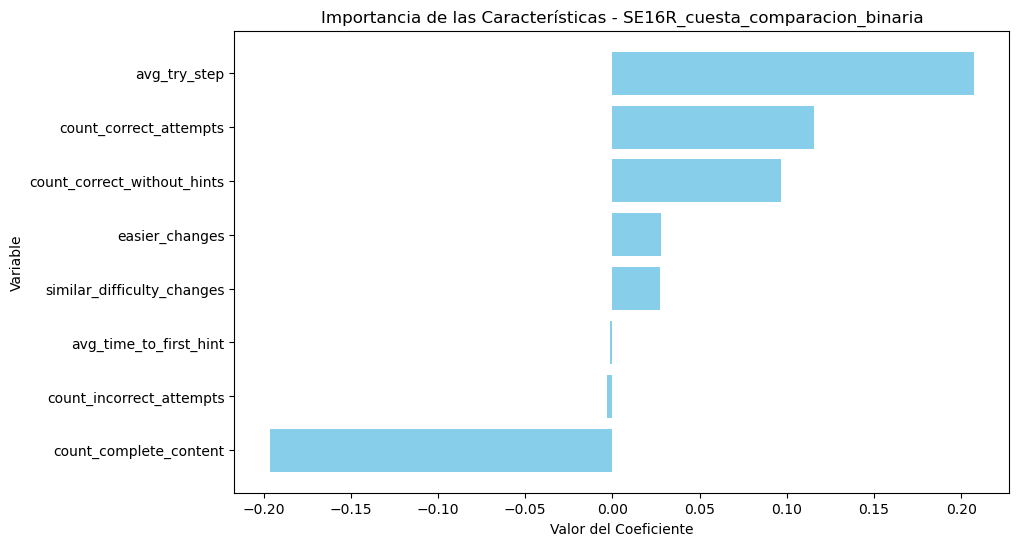



Evaluando modelo con SE11_entender_clases_binaria como variable dependiente

VIF (Factor de Inflación de la Varianza):
                      Variable          VIF
0       avg_time_to_first_hint     1.814183
1       count_complete_content  3450.927126
2                 avg_try_step     2.854706
3       count_correct_attempts  2941.195012
4     count_incorrect_attempts    18.797614
5  count_correct_without_hints    29.203148
6   similar_difficulty_changes     5.450361
7               easier_changes     7.804161

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.15      0.67      0.24         6
           1       0.89      0.41      0.56        39

    accuracy                           0.44        45
   macro avg       0.52      0.54      0.40        45
weighted avg       0.79      0.44      0.52        45



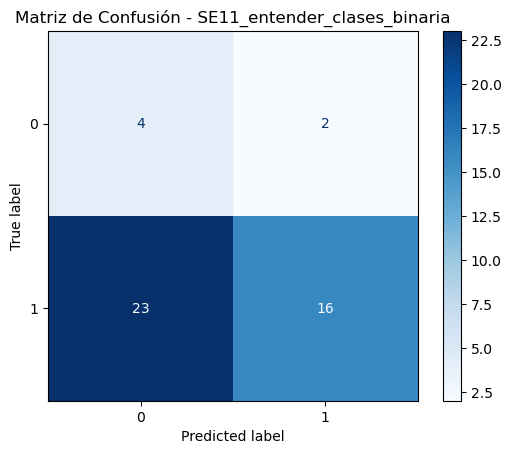


AUC para SE11_entender_clases_binaria: 0.470


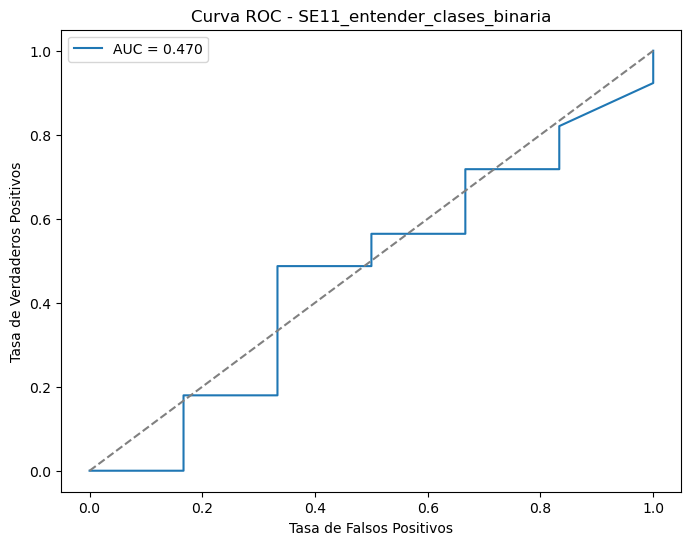


Coeficientes del modelo para SE11_entender_clases_binaria:
                      Variable  Coeficiente
1       count_complete_content     0.493359
2                 avg_try_step     0.105095
6   similar_difficulty_changes     0.043328
7               easier_changes     0.010603
0       avg_time_to_first_hint     0.003193
5  count_correct_without_hints    -0.006005
4     count_incorrect_attempts    -0.016632
3       count_correct_attempts    -0.427992


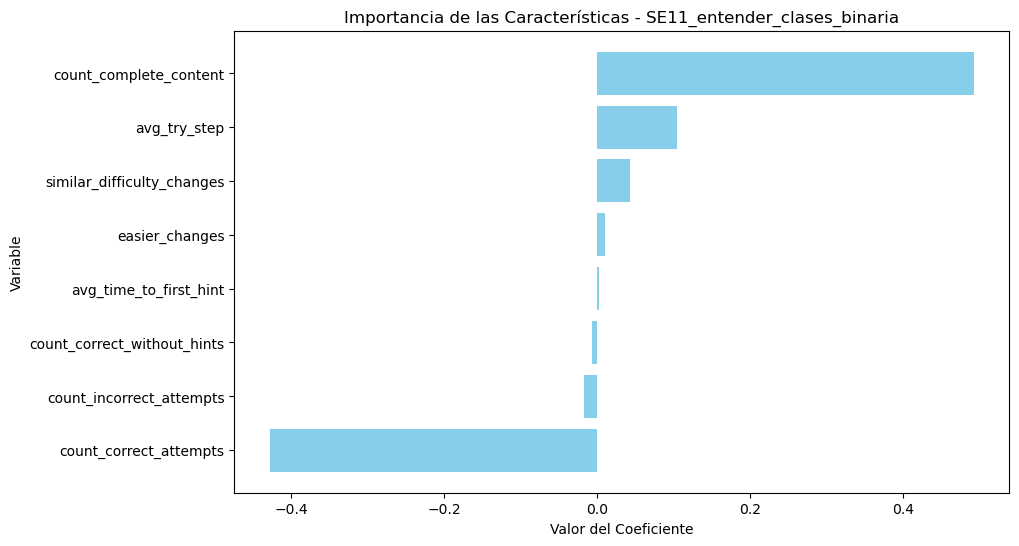



Evaluando modelo con SE13_resiliencia_binaria como variable dependiente

VIF (Factor de Inflación de la Varianza):
                      Variable          VIF
0       avg_time_to_first_hint     1.814183
1       count_complete_content  3450.927126
2                 avg_try_step     2.854706
3       count_correct_attempts  2941.195012
4     count_incorrect_attempts    18.797614
5  count_correct_without_hints    29.203148
6   similar_difficulty_changes     5.450361
7               easier_changes     7.804161

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.11      0.20      0.14        10
           1       0.70      0.54      0.61        35

    accuracy                           0.47        45
   macro avg       0.41      0.37      0.38        45
weighted avg       0.57      0.47      0.51        45



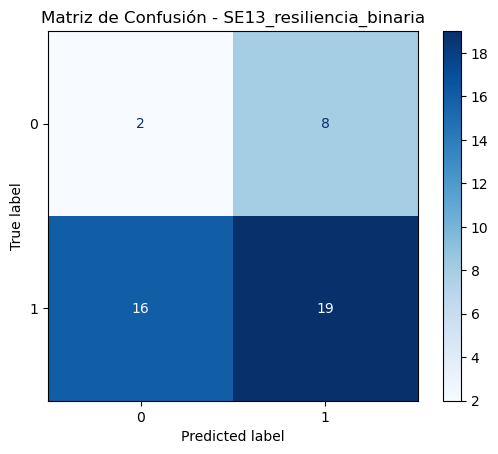


AUC para SE13_resiliencia_binaria: 0.471


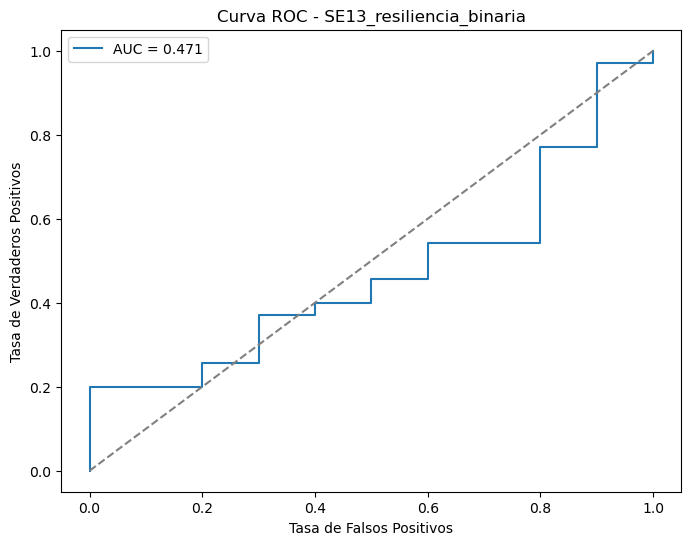


Coeficientes del modelo para SE13_resiliencia_binaria:
                      Variable  Coeficiente
2                 avg_try_step     0.212303
3       count_correct_attempts     0.183079
5  count_correct_without_hints     0.137533
6   similar_difficulty_changes     0.109821
0       avg_time_to_first_hint     0.000924
4     count_incorrect_attempts    -0.015572
7               easier_changes    -0.020041
1       count_complete_content    -0.200314


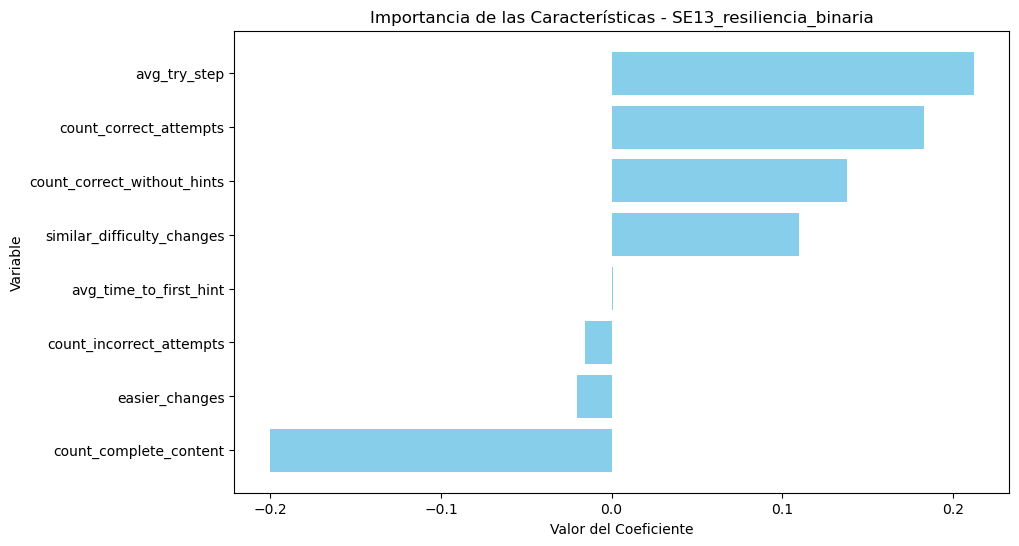

In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt

columnas_autoeficacia = [
    'SE01_conf_aprender', 'SE02_autonomia_aprender',
    'SE14R_cuesta_ejercicios', 'SE03_resolver_ejercicios',
    'SE04_estudiar_tiempo_necesario', 'SE15R_cuesta_clases',
    'SE06_entender_compleja', 'SE08_buscar_ayuda_autonomia',
    'SE09_conf_aprobar', 'SE10_identif_baches', 'SE16R_cuesta_comparacion',
    'SE11_entender_clases', 'SE13_resiliencia'
]

variables_significativas = [
    'avg_time_to_first_hint', 'count_complete_content', 'avg_try_step',
    'count_correct_attempts', 'count_incorrect_attempts',
    'count_correct_without_hints', 'similar_difficulty_changes',
    'easier_changes'
]

for col in columnas_autoeficacia:
    df.loc[:, f'{col}_binaria'] = np.where(df[col] >= 4, 1, 0)

columnas_autoeficacia_binarias = [f'{col}_binaria' for col in columnas_autoeficacia]

df_modelo = df[columnas_autoeficacia_binarias + variables_significativas].dropna()

for col in columnas_autoeficacia_binarias:
    print(f"\n\nEvaluando modelo con {col} como variable dependiente")

    # Dividir datos en entrenamiento y prueba
    X = df_modelo[variables_significativas]
    y = df_modelo[col]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    vif_data = pd.DataFrame()
    vif_data["Variable"] = variables_significativas
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    print("\nVIF (Factor de Inflación de la Varianza):")
    print(vif_data)

    # Ajustar el modelo de regresión logística con ponderación de clases
    modelo = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
    modelo.fit(X_train, y_train)

    # Predicciones
    y_pred = modelo.predict(X_test)
    y_prob = modelo.predict_proba(X_test)[:, 1]

    # Evaluar
    print("\nReporte de clasificación:")
    print(classification_report(y_test, y_pred))

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelo.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Matriz de Confusión - {col}")
    plt.show()

    # Calcular y graficar ROC-AUC
    auc = roc_auc_score(y_test, y_prob)
    print(f"\nAUC para {col}: {auc:.3f}")

    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'AUC = {auc:.3f}')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title(f'Curva ROC - {col}')
    plt.legend()
    plt.show()

    # Mostrar los coeficientes del modelo
    coeficientes = pd.DataFrame({
        'Variable': variables_significativas,
        'Coeficiente': modelo.coef_[0]
    }).sort_values(by='Coeficiente', ascending=False)

    print(f"\nCoeficientes del modelo para {col}:")
    print(coeficientes)

    # Visualizar la importancia de las características
    plt.figure(figsize=(10, 6))
    plt.barh(coeficientes['Variable'], coeficientes['Coeficiente'], color='skyblue')
    plt.xlabel("Valor del Coeficiente")
    plt.ylabel("Variable")
    plt.title(f"Importancia de las Características - {col}")
    plt.gca().invert_yaxis()
    plt.show()




Evaluando modelo con SE01_conf_aprender_binaria como variable dependiente

VIF (Factor de Inflación de la Varianza):
                      Variable       VIF
0       avg_time_to_first_hint  1.717893
1                 avg_try_step  2.807089
2     count_incorrect_attempts  9.262708
3  count_correct_without_hints  7.959048
4   similar_difficulty_changes  4.977948
5               easier_changes  6.005721

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.15      0.57      0.24         7
           1       0.84      0.42      0.56        38

    accuracy                           0.44        45
   macro avg       0.50      0.50      0.40        45
weighted avg       0.74      0.44      0.51        45



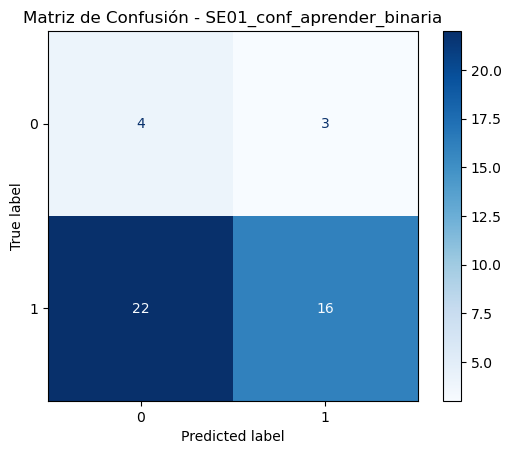


AUC para SE01_conf_aprender_binaria: 0.519


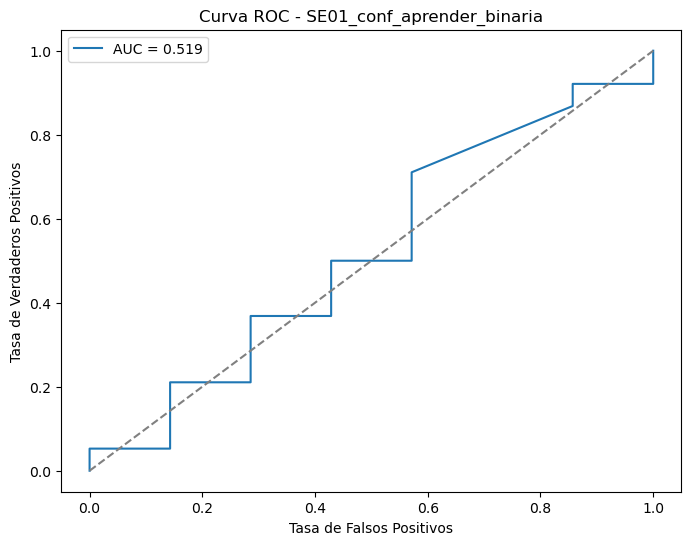


Coeficientes del modelo para SE01_conf_aprender_binaria:
                      Variable  Coeficiente
1                 avg_try_step     0.237823
4   similar_difficulty_changes     0.128045
0       avg_time_to_first_hint     0.000786
2     count_incorrect_attempts    -0.003805
3  count_correct_without_hints    -0.016926
5               easier_changes    -0.019129


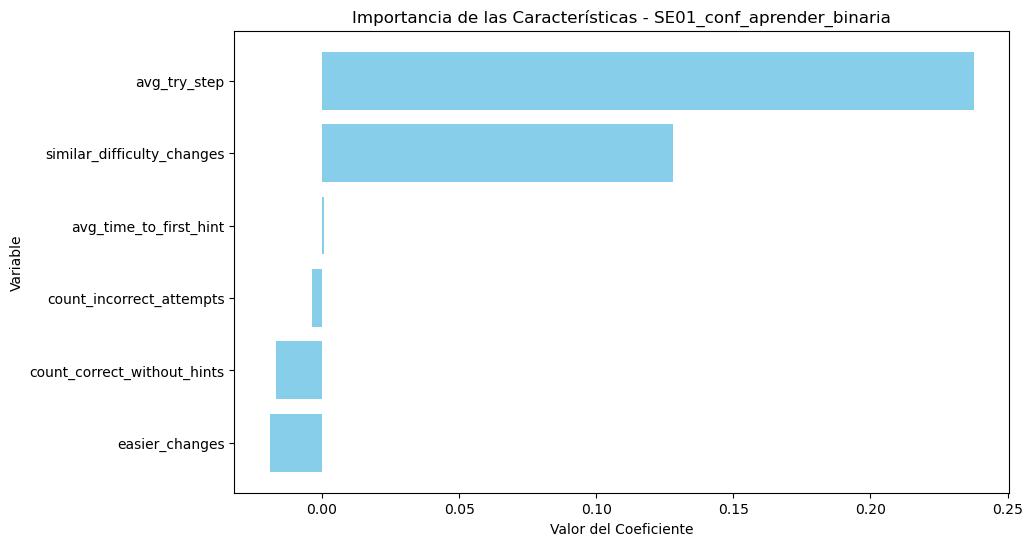



Evaluando modelo con SE02_autonomia_aprender_binaria como variable dependiente

VIF (Factor de Inflación de la Varianza):
                      Variable       VIF
0       avg_time_to_first_hint  1.717893
1                 avg_try_step  2.807089
2     count_incorrect_attempts  9.262708
3  count_correct_without_hints  7.959048
4   similar_difficulty_changes  4.977948
5               easier_changes  6.005721

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.21      0.40      0.28        10
           1       0.77      0.57      0.66        35

    accuracy                           0.53        45
   macro avg       0.49      0.49      0.47        45
weighted avg       0.65      0.53      0.57        45



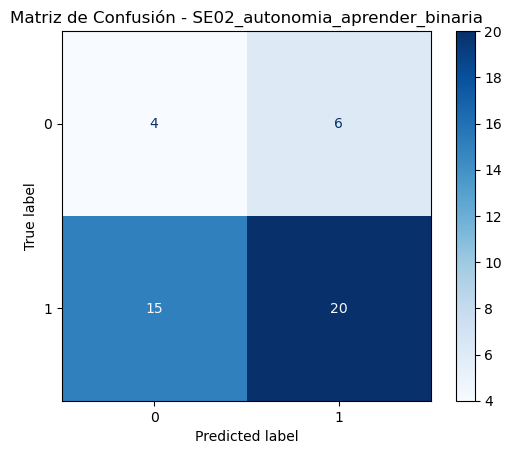


AUC para SE02_autonomia_aprender_binaria: 0.509


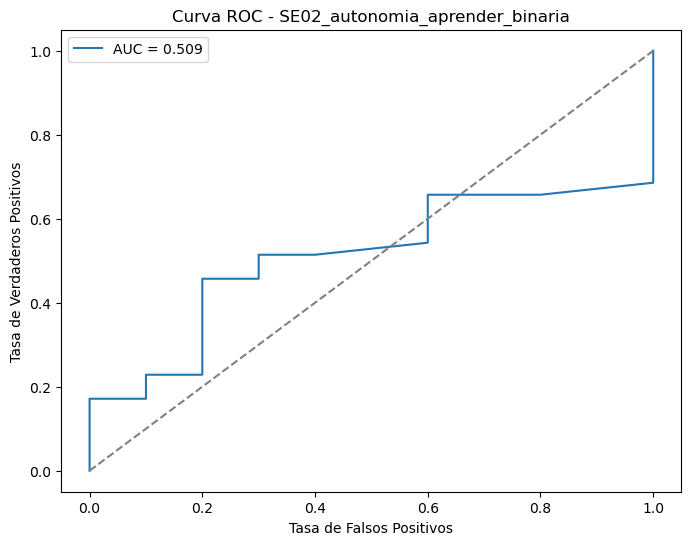


Coeficientes del modelo para SE02_autonomia_aprender_binaria:
                      Variable  Coeficiente
1                 avg_try_step     0.074335
4   similar_difficulty_changes     0.029261
5               easier_changes     0.018057
0       avg_time_to_first_hint     0.001821
2     count_incorrect_attempts    -0.002860
3  count_correct_without_hints    -0.042660


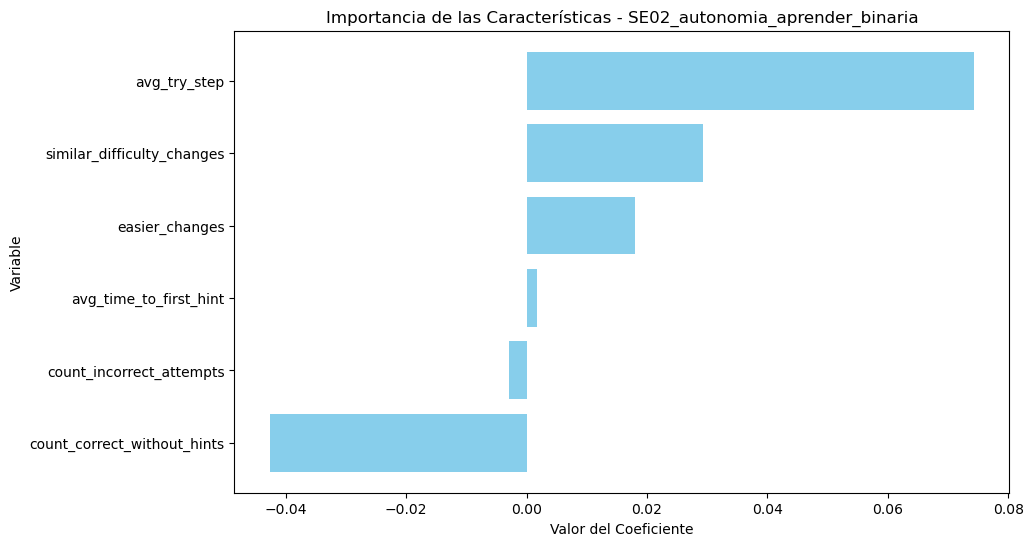



Evaluando modelo con SE14R_cuesta_ejercicios_binaria como variable dependiente

VIF (Factor de Inflación de la Varianza):
                      Variable       VIF
0       avg_time_to_first_hint  1.717893
1                 avg_try_step  2.807089
2     count_incorrect_attempts  9.262708
3  count_correct_without_hints  7.959048
4   similar_difficulty_changes  4.977948
5               easier_changes  6.005721

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.38      0.42      0.40        19
           1       0.54      0.50      0.52        26

    accuracy                           0.47        45
   macro avg       0.46      0.46      0.46        45
weighted avg       0.47      0.47      0.47        45



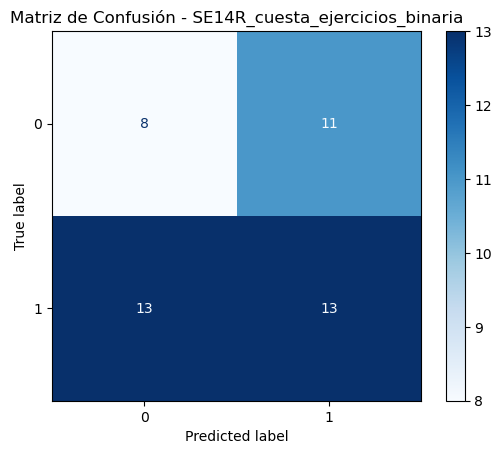


AUC para SE14R_cuesta_ejercicios_binaria: 0.533


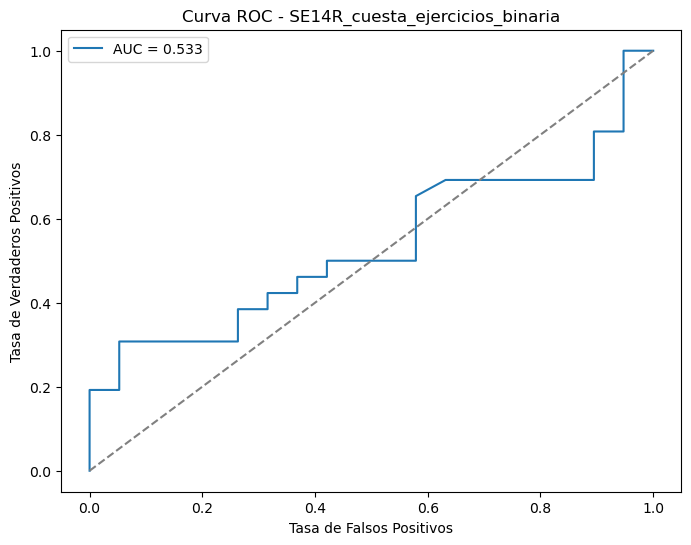


Coeficientes del modelo para SE14R_cuesta_ejercicios_binaria:
                      Variable  Coeficiente
4   similar_difficulty_changes     0.029597
3  count_correct_without_hints     0.029200
0       avg_time_to_first_hint     0.007175
1                 avg_try_step    -0.001635
2     count_incorrect_attempts    -0.005455
5               easier_changes    -0.020843


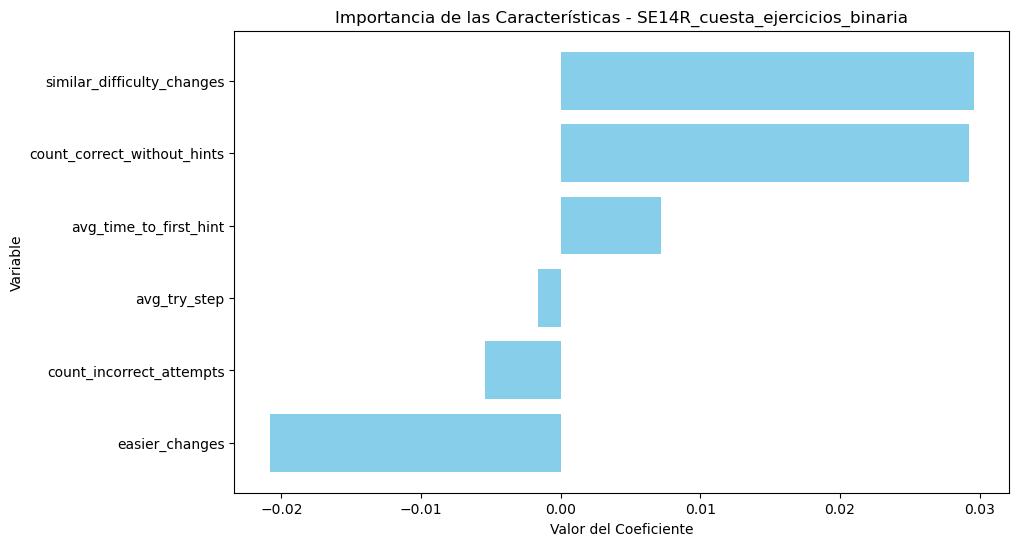



Evaluando modelo con SE03_resolver_ejercicios_binaria como variable dependiente

VIF (Factor de Inflación de la Varianza):
                      Variable       VIF
0       avg_time_to_first_hint  1.717893
1                 avg_try_step  2.807089
2     count_incorrect_attempts  9.262708
3  count_correct_without_hints  7.959048
4   similar_difficulty_changes  4.977948
5               easier_changes  6.005721

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.39      0.79      0.52        14
           1       0.82      0.45      0.58        31

    accuracy                           0.56        45
   macro avg       0.61      0.62      0.55        45
weighted avg       0.69      0.56      0.56        45



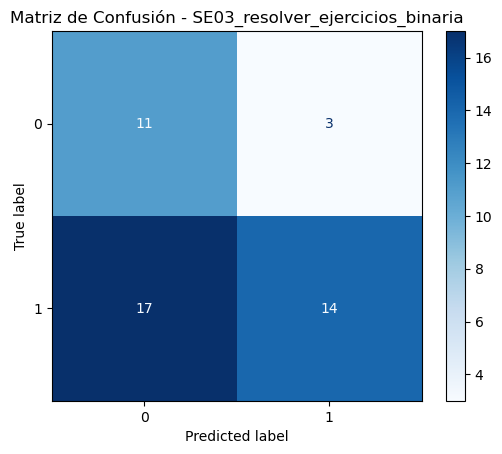


AUC para SE03_resolver_ejercicios_binaria: 0.551


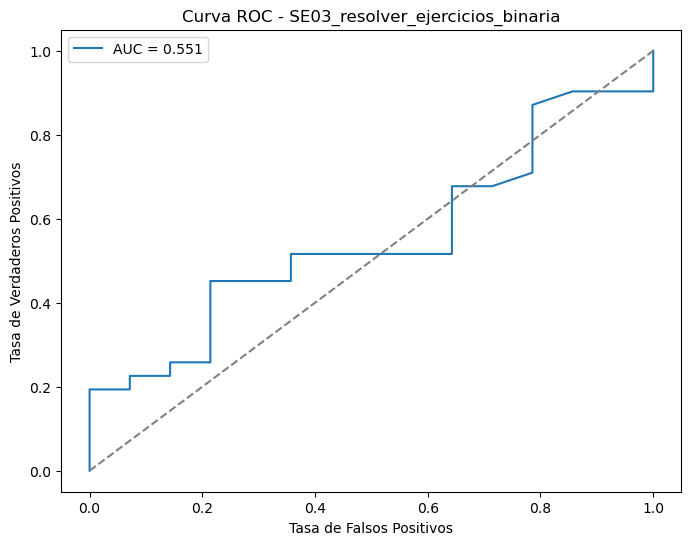


Coeficientes del modelo para SE03_resolver_ejercicios_binaria:
                      Variable  Coeficiente
1                 avg_try_step     0.145264
3  count_correct_without_hints     0.069154
5               easier_changes     0.031007
0       avg_time_to_first_hint     0.000941
2     count_incorrect_attempts    -0.010163
4   similar_difficulty_changes    -0.028416


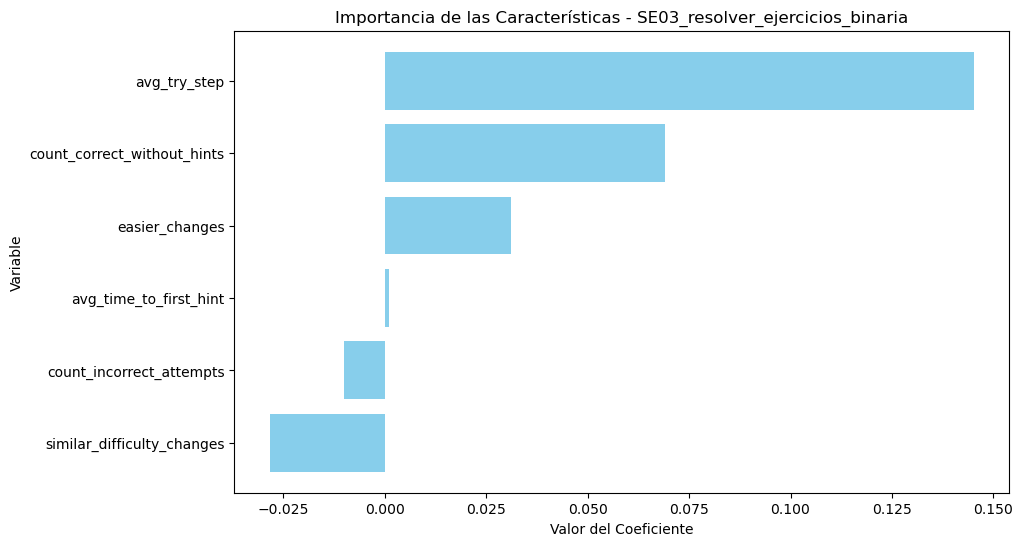



Evaluando modelo con SE04_estudiar_tiempo_necesario_binaria como variable dependiente

VIF (Factor de Inflación de la Varianza):
                      Variable       VIF
0       avg_time_to_first_hint  1.717893
1                 avg_try_step  2.807089
2     count_incorrect_attempts  9.262708
3  count_correct_without_hints  7.959048
4   similar_difficulty_changes  4.977948
5               easier_changes  6.005721

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.13      0.20      0.16        10
           1       0.73      0.63      0.68        35

    accuracy                           0.53        45
   macro avg       0.43      0.41      0.42        45
weighted avg       0.60      0.53      0.56        45



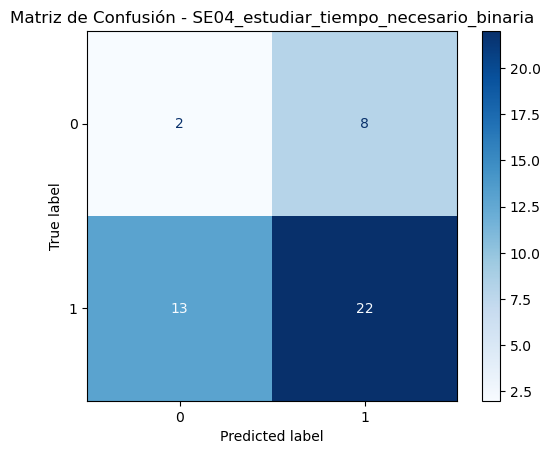


AUC para SE04_estudiar_tiempo_necesario_binaria: 0.403


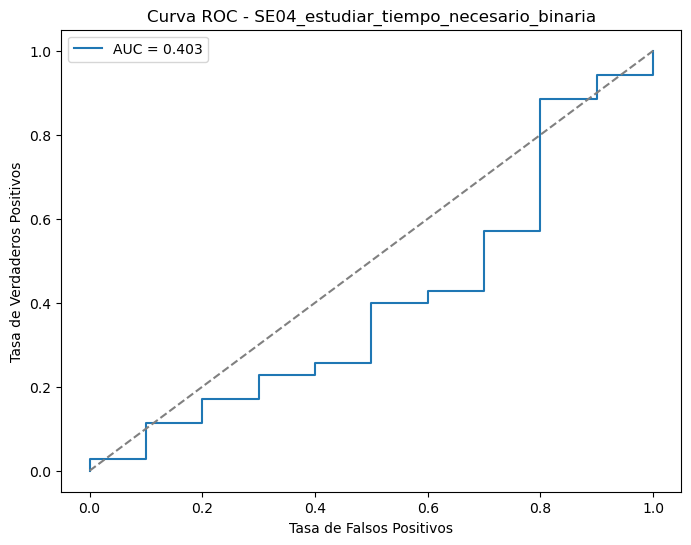


Coeficientes del modelo para SE04_estudiar_tiempo_necesario_binaria:
                      Variable  Coeficiente
4   similar_difficulty_changes     0.009772
5               easier_changes     0.008921
2     count_incorrect_attempts     0.004875
1                 avg_try_step     0.001617
0       avg_time_to_first_hint    -0.000813
3  count_correct_without_hints    -0.053634


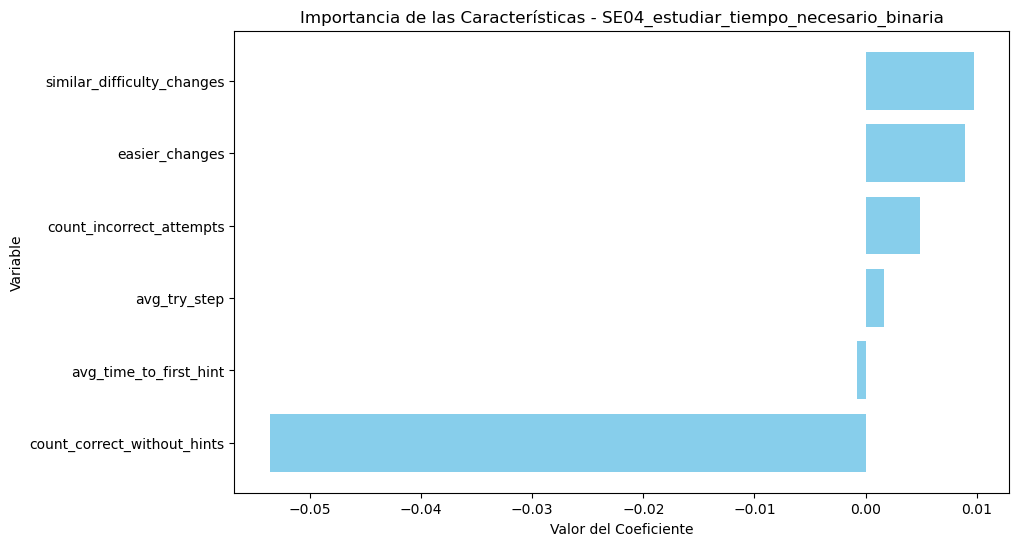



Evaluando modelo con SE15R_cuesta_clases_binaria como variable dependiente

VIF (Factor de Inflación de la Varianza):
                      Variable       VIF
0       avg_time_to_first_hint  1.717893
1                 avg_try_step  2.807089
2     count_incorrect_attempts  9.262708
3  count_correct_without_hints  7.959048
4   similar_difficulty_changes  4.977948
5               easier_changes  6.005721

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.41      0.56      0.47        16
           1       0.70      0.55      0.62        29

    accuracy                           0.56        45
   macro avg       0.55      0.56      0.54        45
weighted avg       0.59      0.56      0.57        45



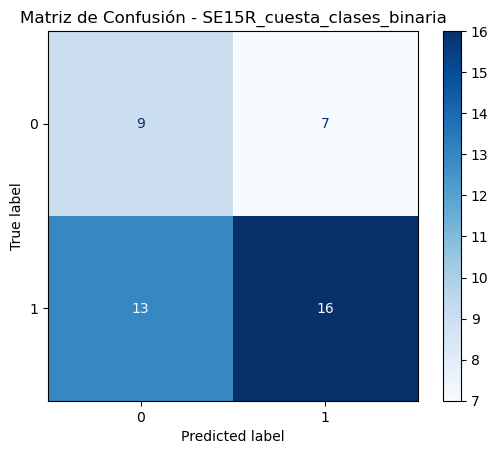


AUC para SE15R_cuesta_clases_binaria: 0.496


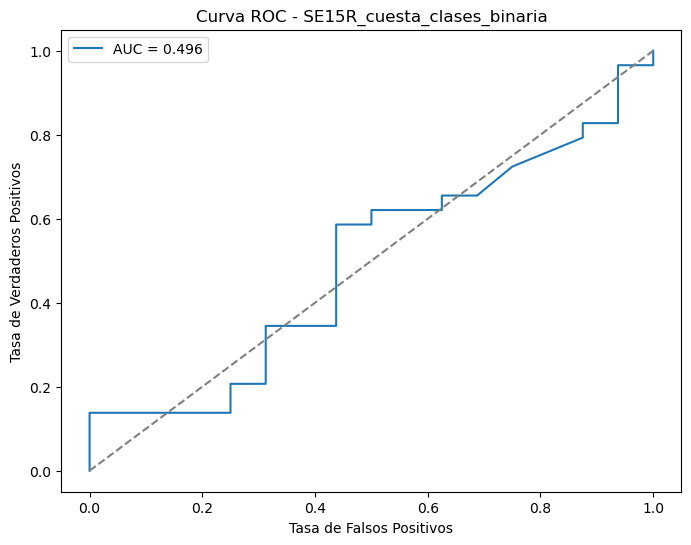


Coeficientes del modelo para SE15R_cuesta_clases_binaria:
                      Variable  Coeficiente
5               easier_changes     0.041743
0       avg_time_to_first_hint     0.005083
2     count_incorrect_attempts    -0.000248
3  count_correct_without_hints    -0.019378
4   similar_difficulty_changes    -0.029543
1                 avg_try_step    -0.100205


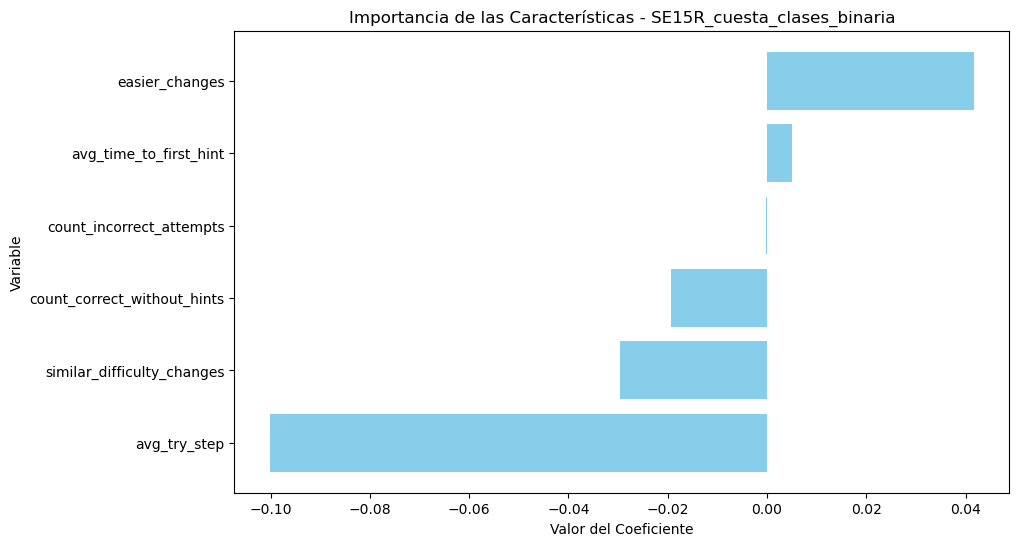



Evaluando modelo con SE06_entender_compleja_binaria como variable dependiente

VIF (Factor de Inflación de la Varianza):
                      Variable       VIF
0       avg_time_to_first_hint  1.717893
1                 avg_try_step  2.807089
2     count_incorrect_attempts  9.262708
3  count_correct_without_hints  7.959048
4   similar_difficulty_changes  4.977948
5               easier_changes  6.005721

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.25      0.33      0.29        15
           1       0.60      0.50      0.55        30

    accuracy                           0.44        45
   macro avg       0.42      0.42      0.42        45
weighted avg       0.48      0.44      0.46        45



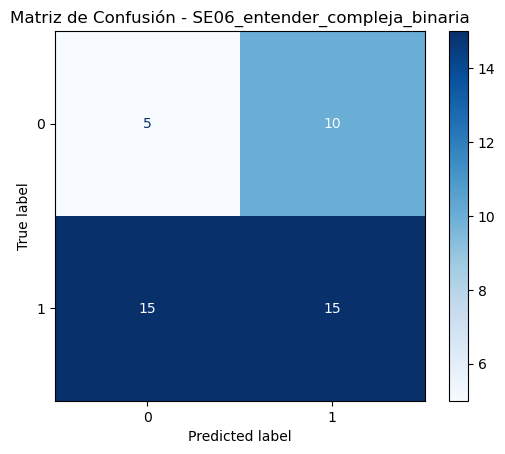


AUC para SE06_entender_compleja_binaria: 0.439


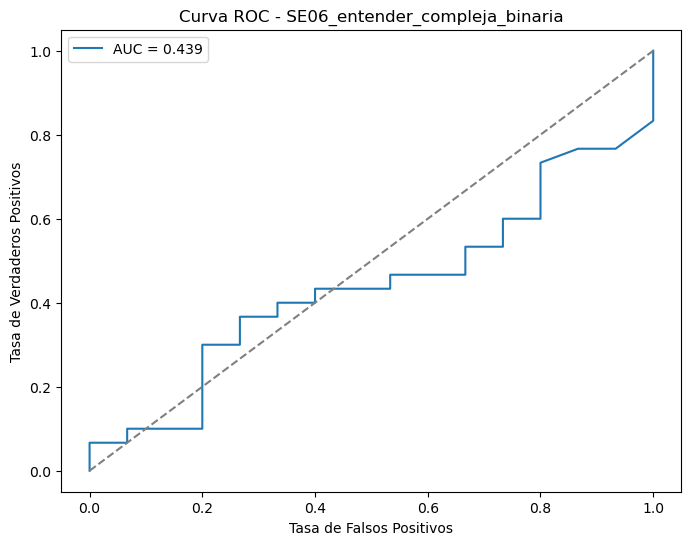


Coeficientes del modelo para SE06_entender_compleja_binaria:
                      Variable  Coeficiente
1                 avg_try_step     0.122422
5               easier_changes     0.021565
3  count_correct_without_hints     0.019493
0       avg_time_to_first_hint     0.001132
2     count_incorrect_attempts    -0.004033
4   similar_difficulty_changes    -0.021252


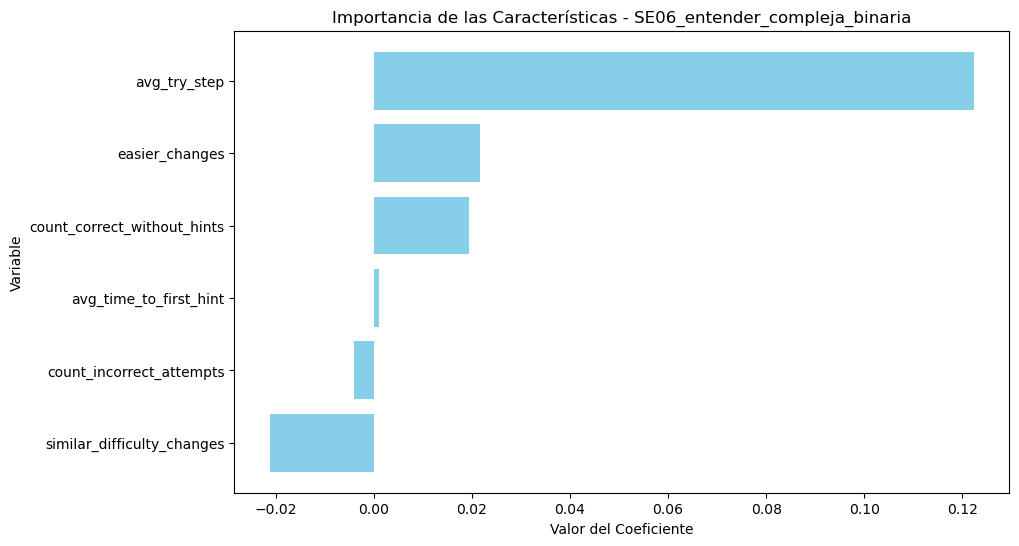



Evaluando modelo con SE08_buscar_ayuda_autonomia_binaria como variable dependiente

VIF (Factor de Inflación de la Varianza):
                      Variable       VIF
0       avg_time_to_first_hint  1.717893
1                 avg_try_step  2.807089
2     count_incorrect_attempts  9.262708
3  count_correct_without_hints  7.959048
4   similar_difficulty_changes  4.977948
5               easier_changes  6.005721

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.10      0.38      0.16         8
           1       0.67      0.27      0.38        37

    accuracy                           0.29        45
   macro avg       0.38      0.32      0.27        45
weighted avg       0.57      0.29      0.34        45



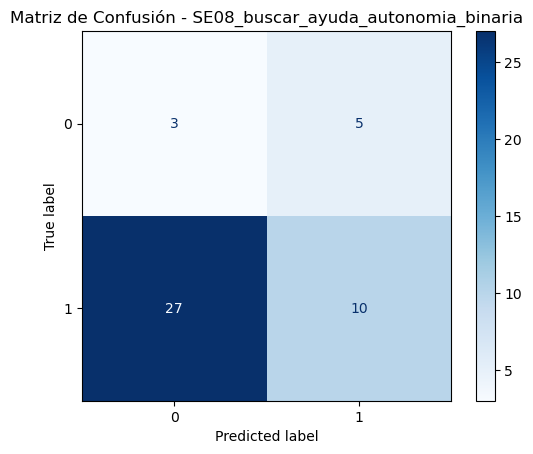


AUC para SE08_buscar_ayuda_autonomia_binaria: 0.311


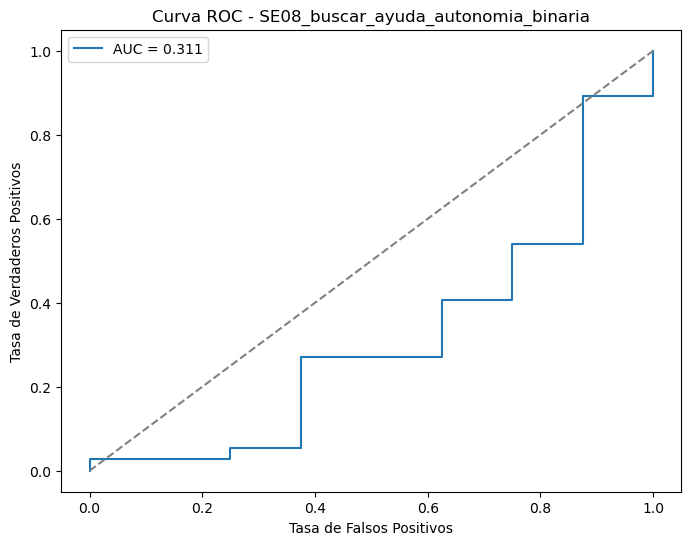


Coeficientes del modelo para SE08_buscar_ayuda_autonomia_binaria:
                      Variable  Coeficiente
1                 avg_try_step     0.061298
4   similar_difficulty_changes     0.025758
3  count_correct_without_hints     0.007006
0       avg_time_to_first_hint     0.005041
5               easier_changes    -0.003376
2     count_incorrect_attempts    -0.003482


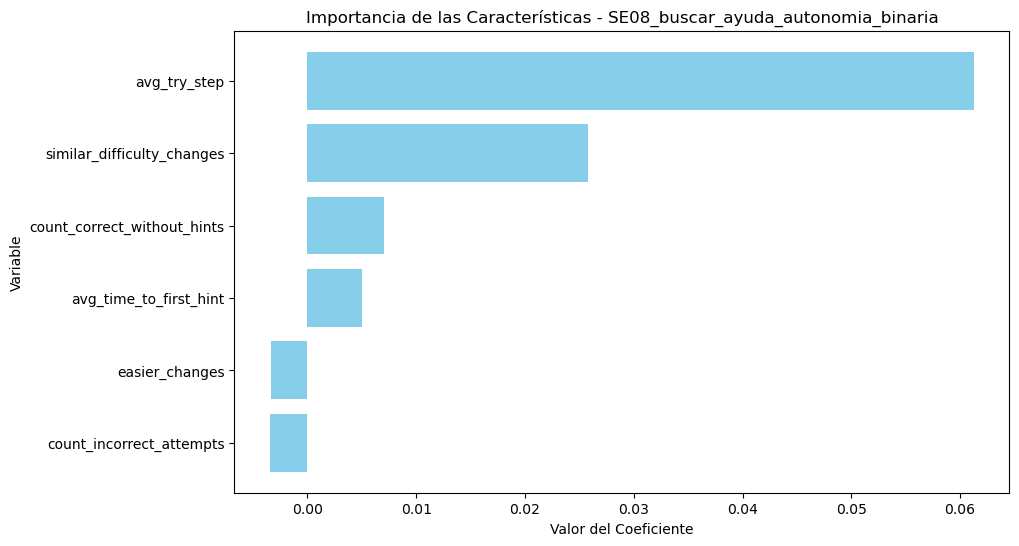



Evaluando modelo con SE09_conf_aprobar_binaria como variable dependiente

VIF (Factor de Inflación de la Varianza):
                      Variable       VIF
0       avg_time_to_first_hint  1.717893
1                 avg_try_step  2.807089
2     count_incorrect_attempts  9.262708
3  count_correct_without_hints  7.959048
4   similar_difficulty_changes  4.977948
5               easier_changes  6.005721

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.22      0.71      0.33         7
           1       0.91      0.53      0.67        38

    accuracy                           0.56        45
   macro avg       0.56      0.62      0.50        45
weighted avg       0.80      0.56      0.61        45



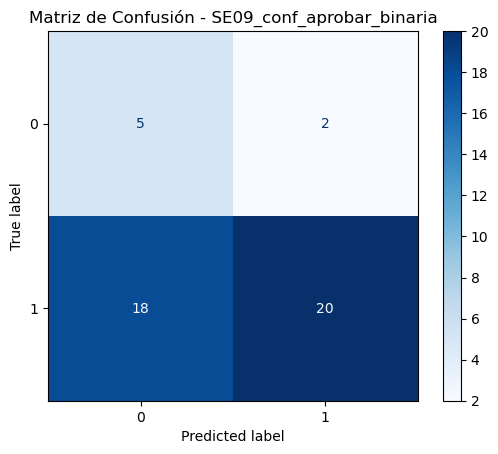


AUC para SE09_conf_aprobar_binaria: 0.664


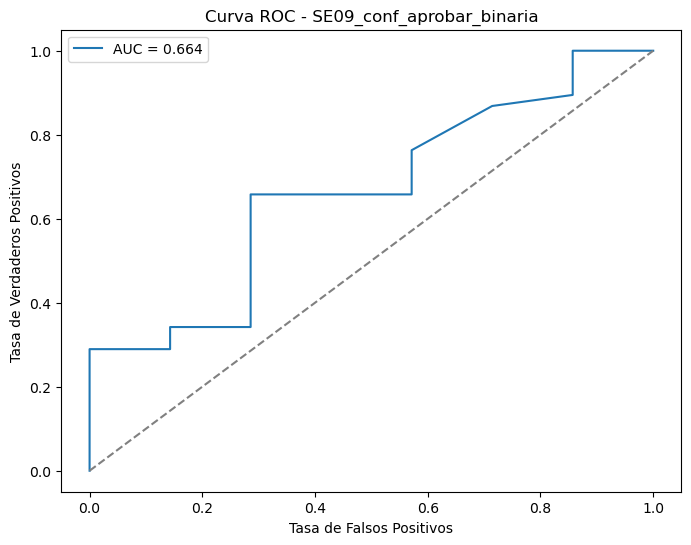


Coeficientes del modelo para SE09_conf_aprobar_binaria:
                      Variable  Coeficiente
3  count_correct_without_hints     0.078008
4   similar_difficulty_changes     0.072253
1                 avg_try_step     0.055737
0       avg_time_to_first_hint     0.005940
2     count_incorrect_attempts    -0.001386
5               easier_changes    -0.047796


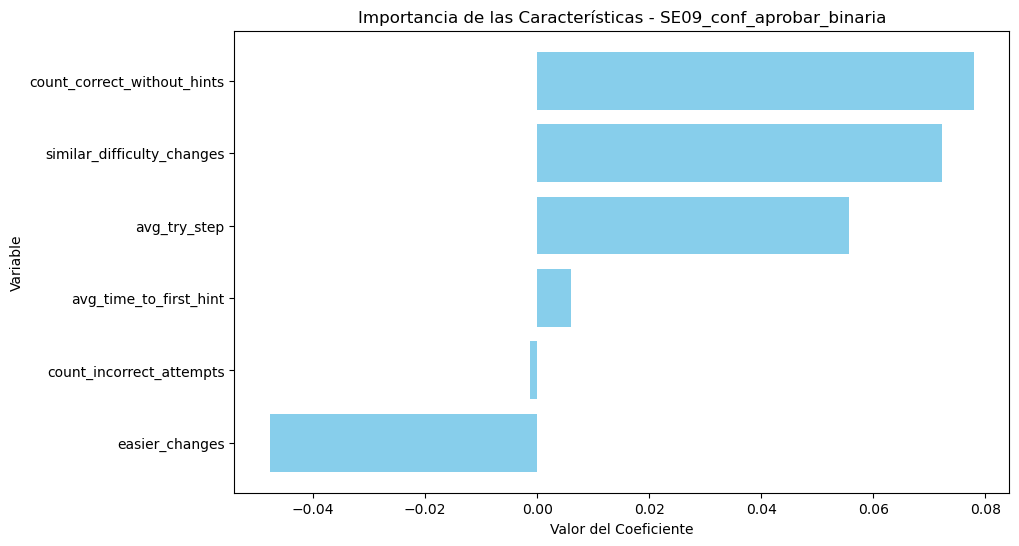



Evaluando modelo con SE10_identif_baches_binaria como variable dependiente

VIF (Factor de Inflación de la Varianza):
                      Variable       VIF
0       avg_time_to_first_hint  1.717893
1                 avg_try_step  2.807089
2     count_incorrect_attempts  9.262708
3  count_correct_without_hints  7.959048
4   similar_difficulty_changes  4.977948
5               easier_changes  6.005721

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.09      0.29      0.14         7
           1       0.78      0.47      0.59        38

    accuracy                           0.44        45
   macro avg       0.44      0.38      0.36        45
weighted avg       0.68      0.44      0.52        45



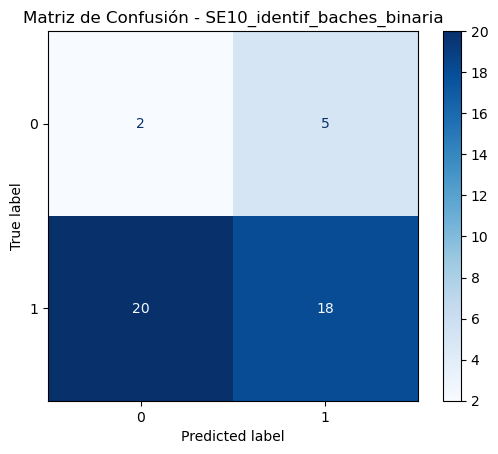


AUC para SE10_identif_baches_binaria: 0.305


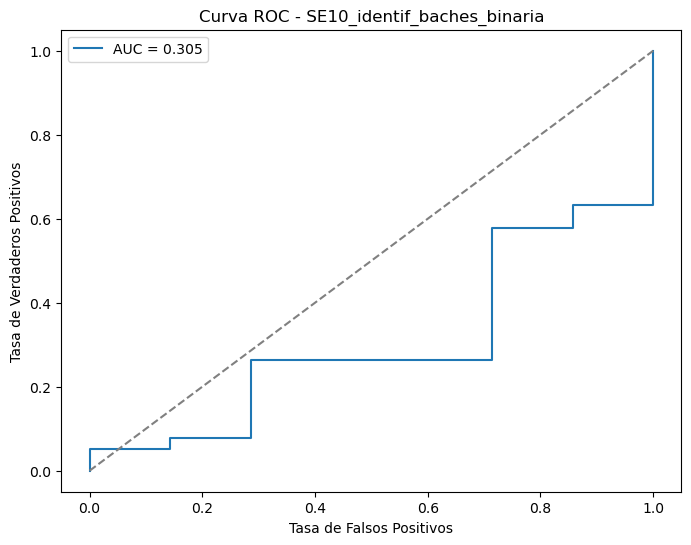


Coeficientes del modelo para SE10_identif_baches_binaria:
                      Variable  Coeficiente
1                 avg_try_step     0.194271
4   similar_difficulty_changes     0.045189
5               easier_changes     0.021297
2     count_incorrect_attempts    -0.000282
0       avg_time_to_first_hint    -0.001012
3  count_correct_without_hints    -0.031605


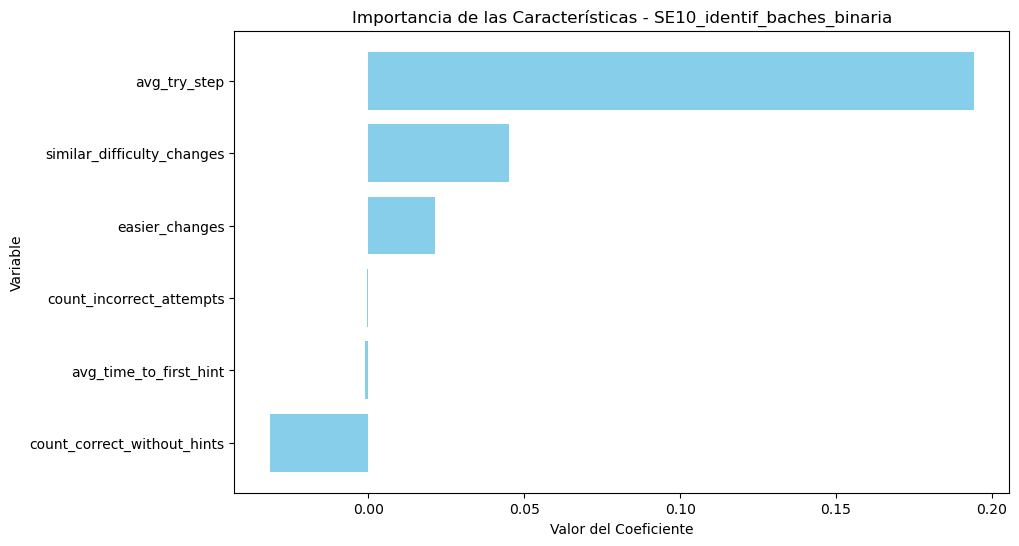



Evaluando modelo con SE16R_cuesta_comparacion_binaria como variable dependiente

VIF (Factor de Inflación de la Varianza):
                      Variable       VIF
0       avg_time_to_first_hint  1.717893
1                 avg_try_step  2.807089
2     count_incorrect_attempts  9.262708
3  count_correct_without_hints  7.959048
4   similar_difficulty_changes  4.977948
5               easier_changes  6.005721

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.30      0.47      0.37        15
           1       0.64      0.47      0.54        30

    accuracy                           0.47        45
   macro avg       0.47      0.47      0.45        45
weighted avg       0.53      0.47      0.48        45



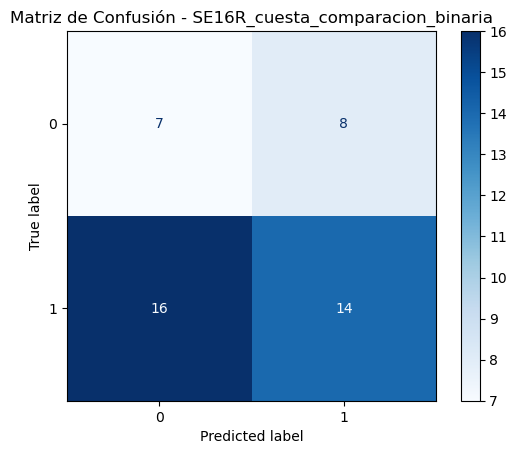


AUC para SE16R_cuesta_comparacion_binaria: 0.420


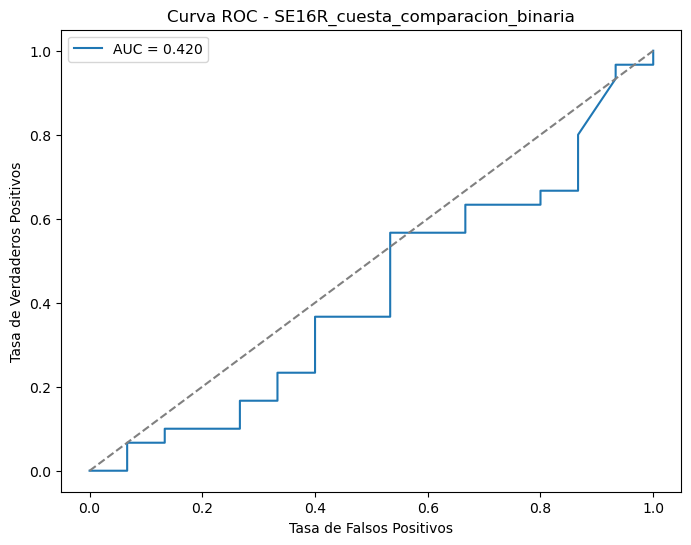


Coeficientes del modelo para SE16R_cuesta_comparacion_binaria:
                      Variable  Coeficiente
1                 avg_try_step     0.214915
3  count_correct_without_hints     0.023232
5               easier_changes     0.016440
4   similar_difficulty_changes     0.008096
0       avg_time_to_first_hint    -0.000698
2     count_incorrect_attempts    -0.008963


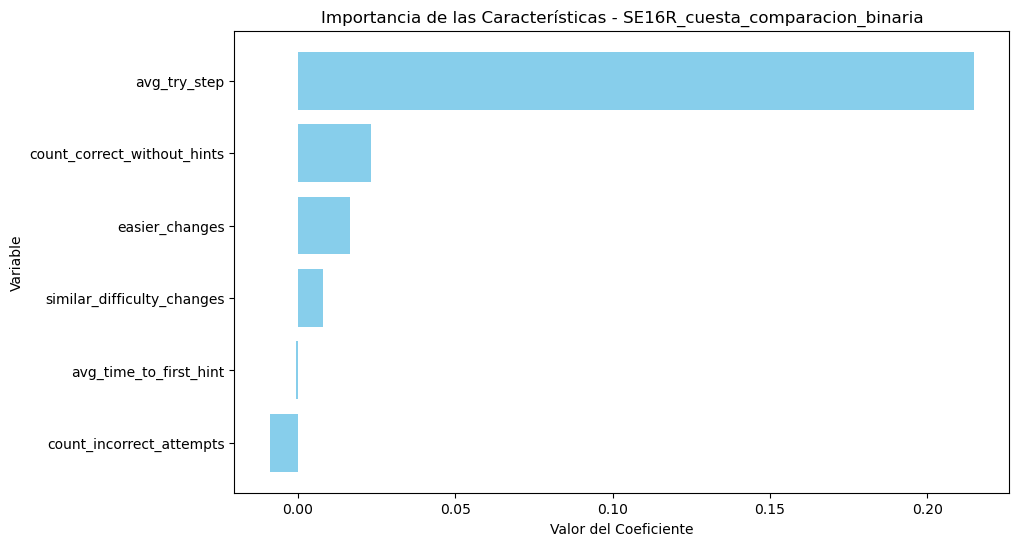



Evaluando modelo con SE11_entender_clases_binaria como variable dependiente

VIF (Factor de Inflación de la Varianza):
                      Variable       VIF
0       avg_time_to_first_hint  1.717893
1                 avg_try_step  2.807089
2     count_incorrect_attempts  9.262708
3  count_correct_without_hints  7.959048
4   similar_difficulty_changes  4.977948
5               easier_changes  6.005721

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.15      0.67      0.25         6
           1       0.89      0.44      0.59        39

    accuracy                           0.47        45
   macro avg       0.52      0.55      0.42        45
weighted avg       0.80      0.47      0.54        45



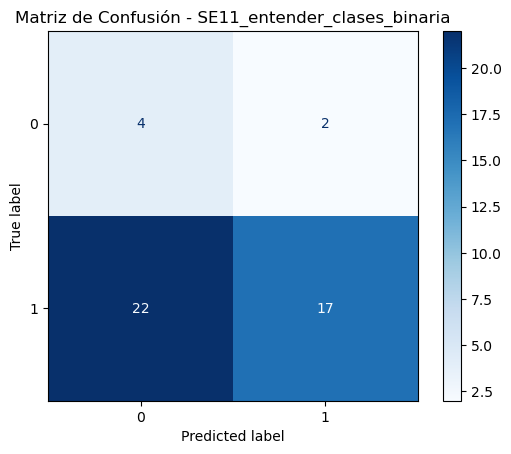


AUC para SE11_entender_clases_binaria: 0.504


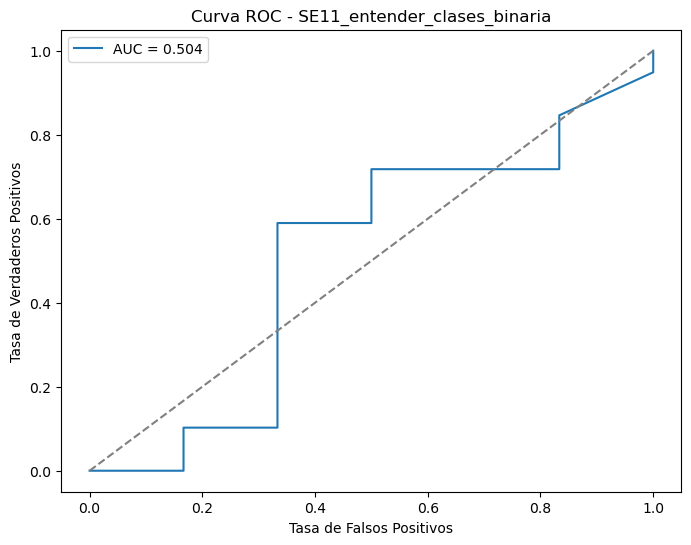


Coeficientes del modelo para SE11_entender_clases_binaria:
                      Variable  Coeficiente
1                 avg_try_step     0.101442
4   similar_difficulty_changes     0.055098
3  count_correct_without_hints     0.046169
5               easier_changes     0.023419
0       avg_time_to_first_hint     0.002893
2     count_incorrect_attempts    -0.011356


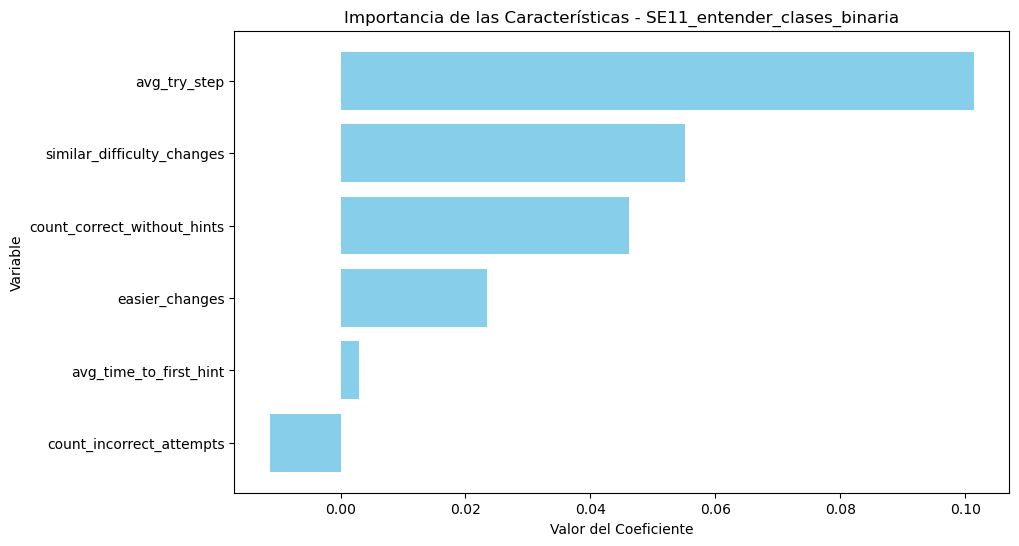



Evaluando modelo con SE13_resiliencia_binaria como variable dependiente

VIF (Factor de Inflación de la Varianza):
                      Variable       VIF
0       avg_time_to_first_hint  1.717893
1                 avg_try_step  2.807089
2     count_incorrect_attempts  9.262708
3  count_correct_without_hints  7.959048
4   similar_difficulty_changes  4.977948
5               easier_changes  6.005721

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.16      0.30      0.21        10
           1       0.73      0.54      0.62        35

    accuracy                           0.49        45
   macro avg       0.44      0.42      0.41        45
weighted avg       0.60      0.49      0.53        45



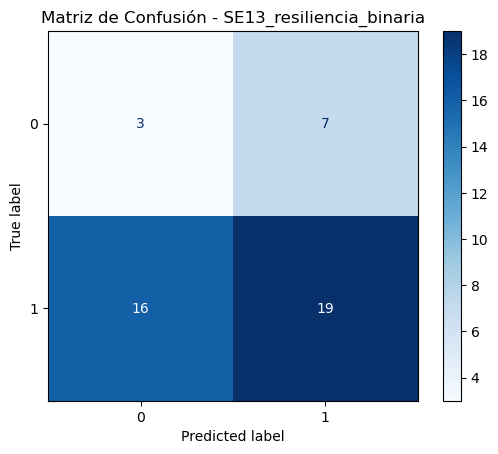


AUC para SE13_resiliencia_binaria: 0.486


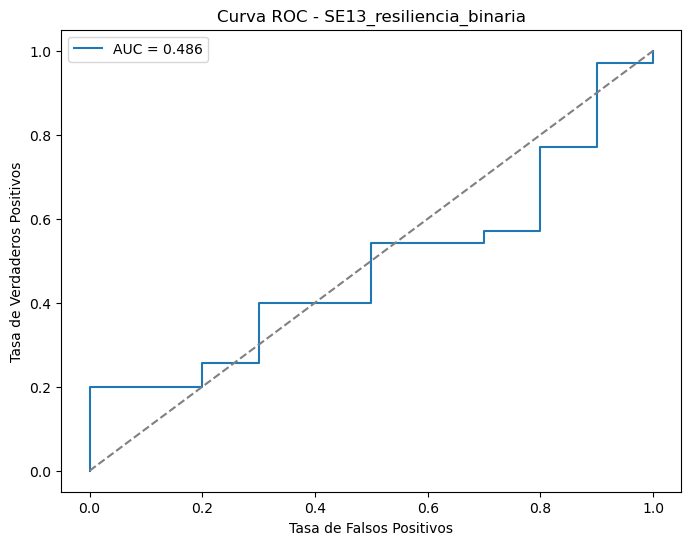


Coeficientes del modelo para SE13_resiliencia_binaria:
                      Variable  Coeficiente
1                 avg_try_step     0.214090
3  count_correct_without_hints     0.126354
4   similar_difficulty_changes     0.105815
0       avg_time_to_first_hint     0.000921
2     count_incorrect_attempts    -0.017045
5               easier_changes    -0.025312


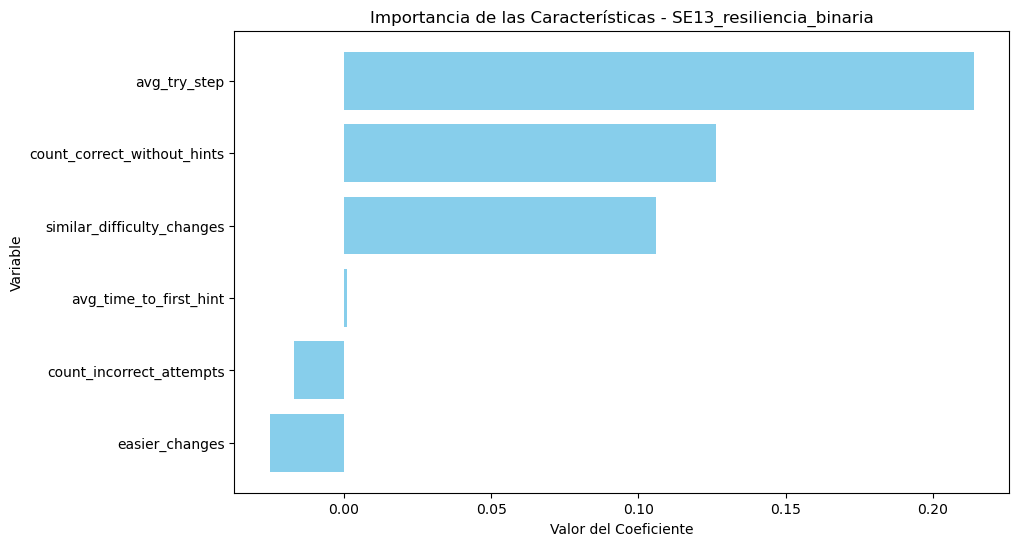

In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt

columnas_autoeficacia = [
    'SE01_conf_aprender', 'SE02_autonomia_aprender',
    'SE14R_cuesta_ejercicios', 'SE03_resolver_ejercicios',
    'SE04_estudiar_tiempo_necesario', 'SE15R_cuesta_clases',
    'SE06_entender_compleja', 'SE08_buscar_ayuda_autonomia',
    'SE09_conf_aprobar', 'SE10_identif_baches', 'SE16R_cuesta_comparacion',
    'SE11_entender_clases', 'SE13_resiliencia'
]

variables_significativas = [
    'avg_time_to_first_hint', 'avg_try_step', 'count_incorrect_attempts',
    'count_correct_without_hints', 'similar_difficulty_changes',
    'easier_changes'
]

for col in columnas_autoeficacia:
    df.loc[:, f'{col}_binaria'] = np.where(df[col] >= 4, 1, 0)

columnas_autoeficacia_binarias = [f'{col}_binaria' for col in columnas_autoeficacia]

# Crear DataFrame para el modelo
df_modelo = df[columnas_autoeficacia_binarias + variables_significativas].dropna()

# Iterar sobre cada columna de autoeficacia binaria
for col in columnas_autoeficacia_binarias:
    print(f"\n\nEvaluando modelo con {col} como variable dependiente")

    # Dividir datos en entrenamiento y prueba
    X = df_modelo[variables_significativas]
    y = df_modelo[col]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    vif_data = pd.DataFrame()
    vif_data["Variable"] = variables_significativas
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    print("\nVIF (Factor de Inflación de la Varianza):")
    print(vif_data)

    # Ajustar el modelo de regresión logística con ponderación de clases
    modelo = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
    modelo.fit(X_train, y_train)

    # Predicciones
    y_pred = modelo.predict(X_test)
    y_prob = modelo.predict_proba(X_test)[:, 1]

    # Evaluar el modelo
    print("\nReporte de clasificación:")
    print(classification_report(y_test, y_pred))

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelo.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Matriz de Confusión - {col}")
    plt.show()

    # Calcular y graficar ROC-AUC
    auc = roc_auc_score(y_test, y_prob)
    print(f"\nAUC para {col}: {auc:.3f}")

    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'AUC = {auc:.3f}')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title(f'Curva ROC - {col}')
    plt.legend()
    plt.show()

    # Mostrar los coeficientes del modelo
    coeficientes = pd.DataFrame({
        'Variable': variables_significativas,
        'Coeficiente': modelo.coef_[0]
    }).sort_values(by='Coeficiente', ascending=False)

    print(f"\nCoeficientes del modelo para {col}:")
    print(coeficientes)

    # Visualizar la importancia de las características
    plt.figure(figsize=(10, 6))
    plt.barh(coeficientes['Variable'], coeficientes['Coeficiente'], color='skyblue')
    plt.xlabel("Valor del Coeficiente")
    plt.ylabel("Variable")
    plt.title(f"Importancia de las Características - {col}")
    plt.gca().invert_yaxis()
    plt.show()




Evaluando modelo con SE01_conf_aprender_binaria como variable dependiente

VIF (Factor de Inflación de la Varianza):
                      Variable       VIF
0       avg_time_to_first_hint  1.712171
1                 avg_try_step  2.377625
2  count_correct_without_hints  6.158256
3   similar_difficulty_changes  4.765078
4               easier_changes  5.433496

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.18      0.71      0.29         7
           1       0.88      0.39      0.55        38

    accuracy                           0.44        45
   macro avg       0.53      0.55      0.42        45
weighted avg       0.77      0.44      0.51        45



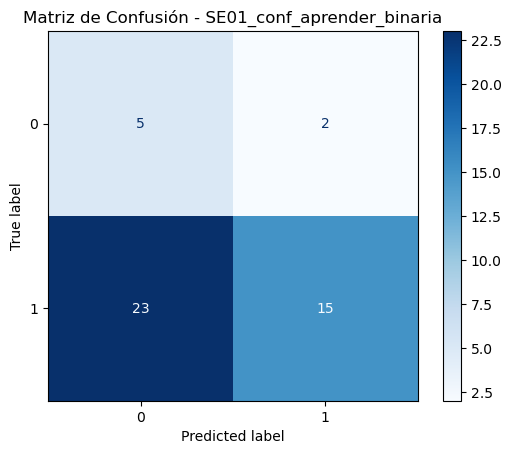


AUC para SE01_conf_aprender_binaria: 0.511


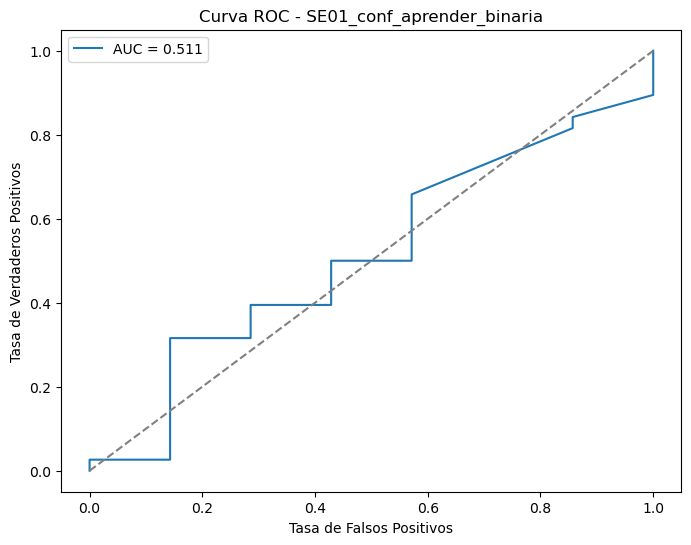


Coeficientes del modelo para SE01_conf_aprender_binaria:
                      Variable  Coeficiente
1                 avg_try_step     0.193814
3   similar_difficulty_changes     0.119139
0       avg_time_to_first_hint     0.000925
2  count_correct_without_hints    -0.024725
4               easier_changes    -0.027442


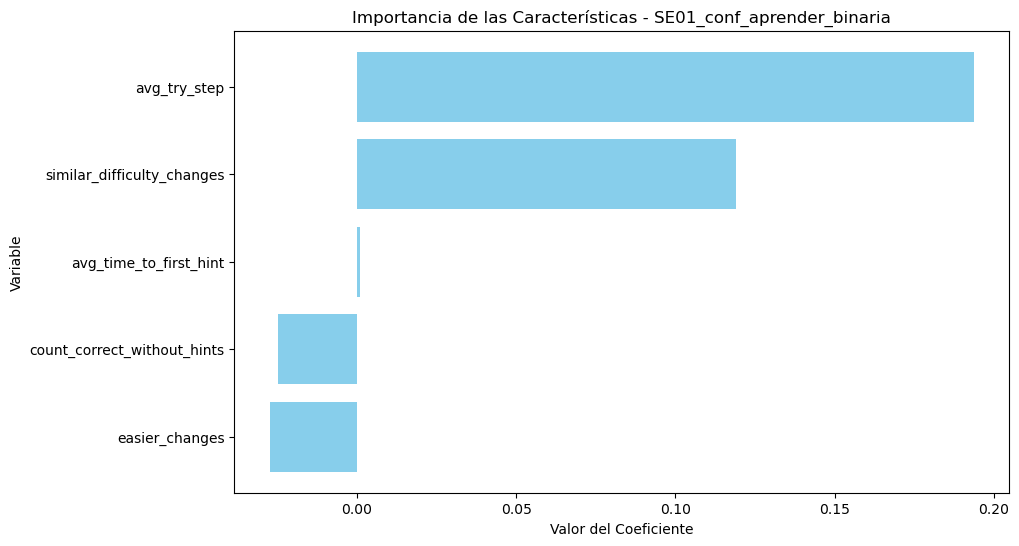



Evaluando modelo con SE02_autonomia_aprender_binaria como variable dependiente

VIF (Factor de Inflación de la Varianza):
                      Variable       VIF
0       avg_time_to_first_hint  1.712171
1                 avg_try_step  2.377625
2  count_correct_without_hints  6.158256
3   similar_difficulty_changes  4.765078
4               easier_changes  5.433496

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.19      0.40      0.26        10
           1       0.75      0.51      0.61        35

    accuracy                           0.49        45
   macro avg       0.47      0.46      0.43        45
weighted avg       0.63      0.49      0.53        45



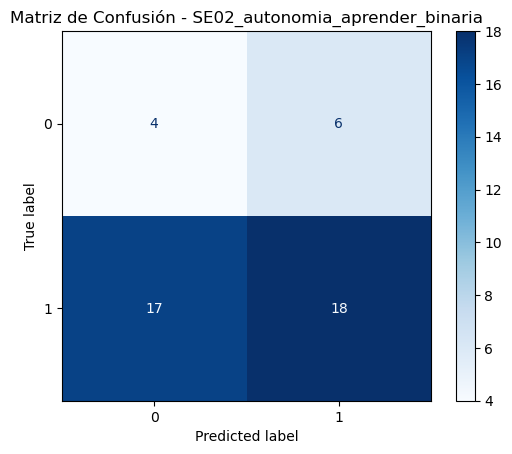


AUC para SE02_autonomia_aprender_binaria: 0.489


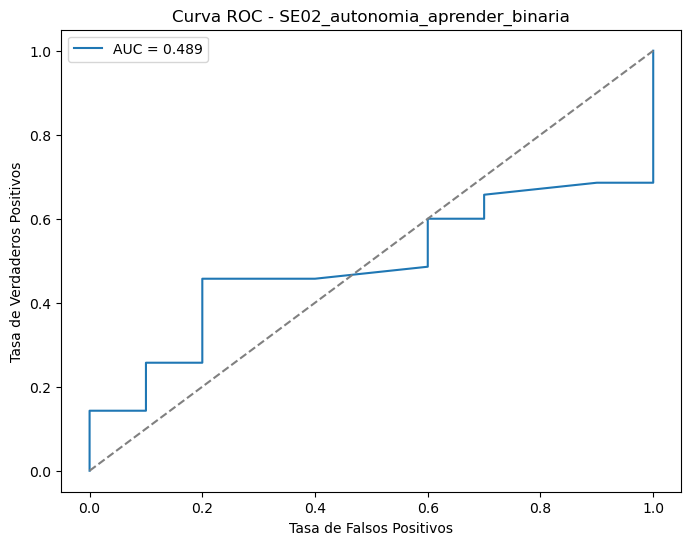


Coeficientes del modelo para SE02_autonomia_aprender_binaria:
                      Variable  Coeficiente
1                 avg_try_step     0.049956
3   similar_difficulty_changes     0.021968
4               easier_changes     0.013463
0       avg_time_to_first_hint     0.001946
2  count_correct_without_hints    -0.051578


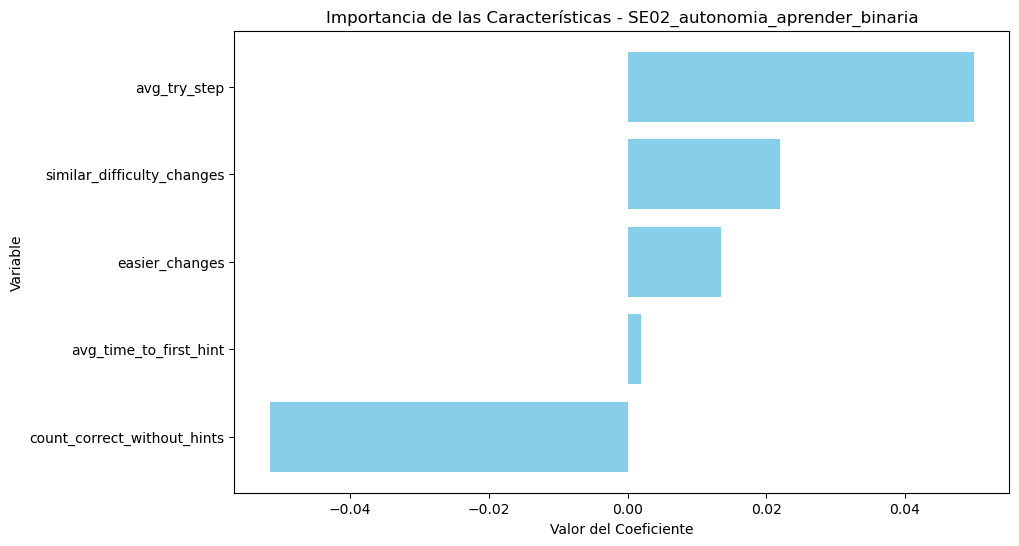



Evaluando modelo con SE14R_cuesta_ejercicios_binaria como variable dependiente

VIF (Factor de Inflación de la Varianza):
                      Variable       VIF
0       avg_time_to_first_hint  1.712171
1                 avg_try_step  2.377625
2  count_correct_without_hints  6.158256
3   similar_difficulty_changes  4.765078
4               easier_changes  5.433496

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.45      0.53      0.49        19
           1       0.61      0.54      0.57        26

    accuracy                           0.53        45
   macro avg       0.53      0.53      0.53        45
weighted avg       0.54      0.53      0.54        45



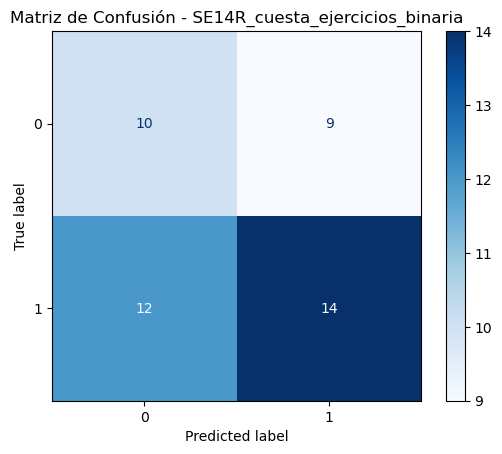


AUC para SE14R_cuesta_ejercicios_binaria: 0.517


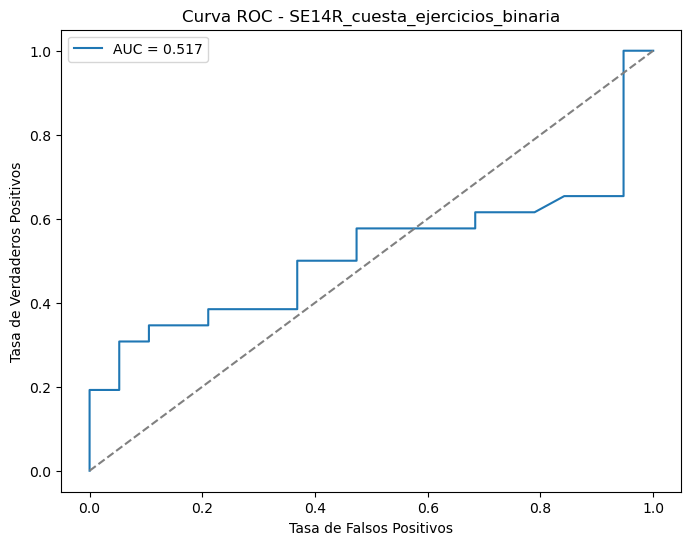


Coeficientes del modelo para SE14R_cuesta_ejercicios_binaria:
                      Variable  Coeficiente
3   similar_difficulty_changes     0.021004
0       avg_time_to_first_hint     0.007422
2  count_correct_without_hints     0.005924
4               easier_changes    -0.028754
1                 avg_try_step    -0.046383


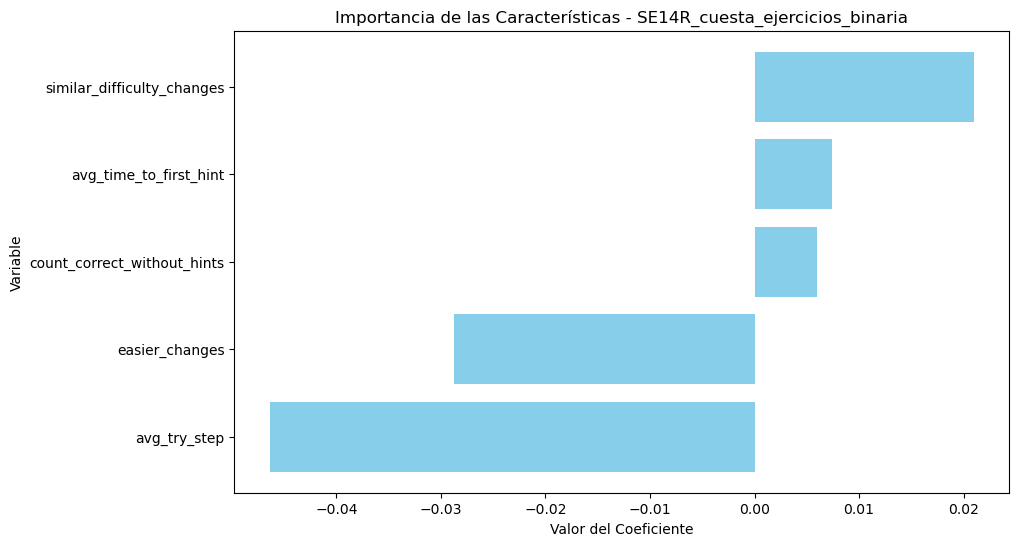



Evaluando modelo con SE03_resolver_ejercicios_binaria como variable dependiente

VIF (Factor de Inflación de la Varianza):
                      Variable       VIF
0       avg_time_to_first_hint  1.712171
1                 avg_try_step  2.377625
2  count_correct_without_hints  6.158256
3   similar_difficulty_changes  4.765078
4               easier_changes  5.433496

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.27      0.50      0.35        14
           1       0.63      0.39      0.48        31

    accuracy                           0.42        45
   macro avg       0.45      0.44      0.42        45
weighted avg       0.52      0.42      0.44        45



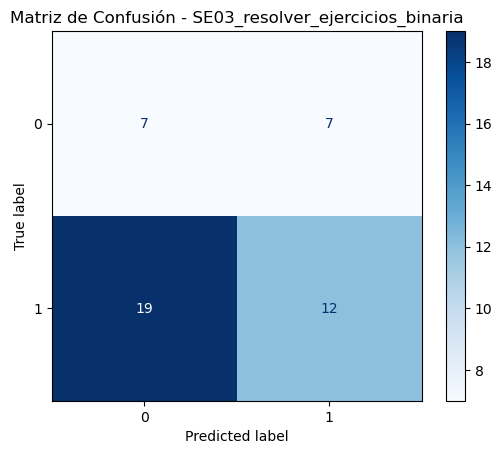


AUC para SE03_resolver_ejercicios_binaria: 0.498


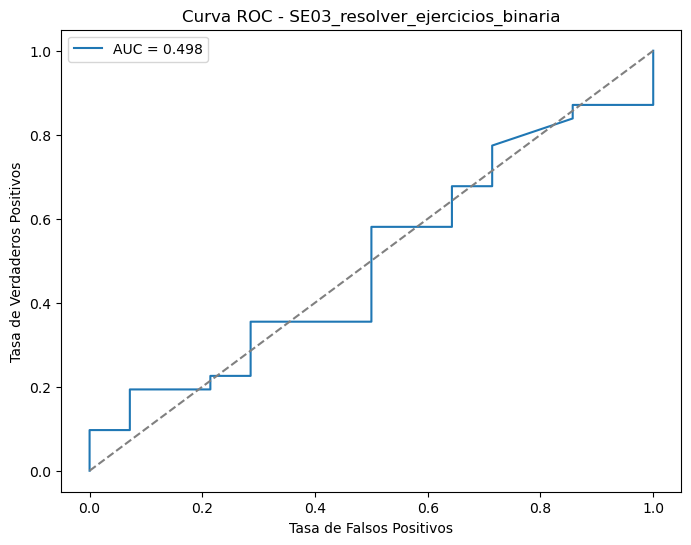


Coeficientes del modelo para SE03_resolver_ejercicios_binaria:
                      Variable  Coeficiente
1                 avg_try_step     0.048488
2  count_correct_without_hints     0.025016
4               easier_changes     0.021529
0       avg_time_to_first_hint     0.001435
3   similar_difficulty_changes    -0.049693


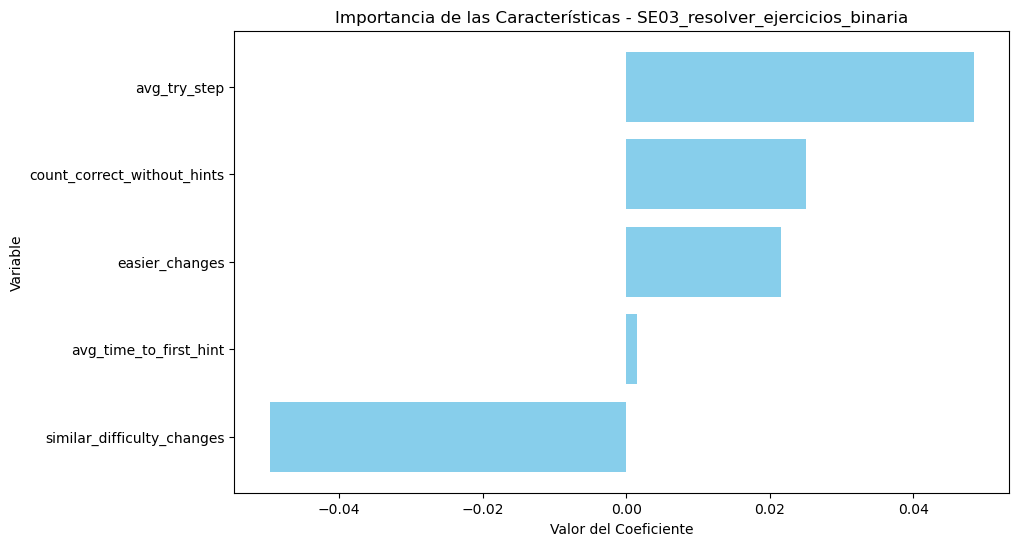



Evaluando modelo con SE04_estudiar_tiempo_necesario_binaria como variable dependiente

VIF (Factor de Inflación de la Varianza):
                      Variable       VIF
0       avg_time_to_first_hint  1.712171
1                 avg_try_step  2.377625
2  count_correct_without_hints  6.158256
3   similar_difficulty_changes  4.765078
4               easier_changes  5.433496

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.13      0.20      0.16        10
           1       0.73      0.63      0.68        35

    accuracy                           0.53        45
   macro avg       0.43      0.41      0.42        45
weighted avg       0.60      0.53      0.56        45



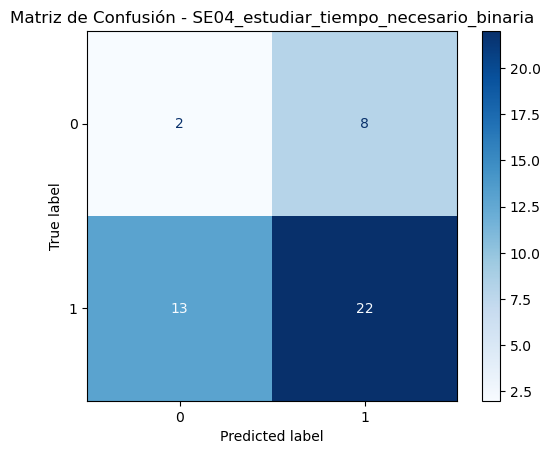


AUC para SE04_estudiar_tiempo_necesario_binaria: 0.480


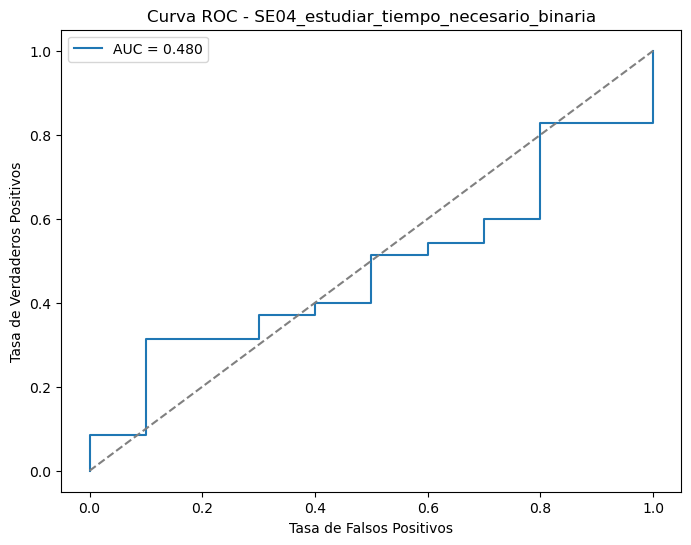


Coeficientes del modelo para SE04_estudiar_tiempo_necesario_binaria:
                      Variable  Coeficiente
1                 avg_try_step     0.029170
3   similar_difficulty_changes     0.018295
4               easier_changes     0.018228
0       avg_time_to_first_hint    -0.000800
2  count_correct_without_hints    -0.035499


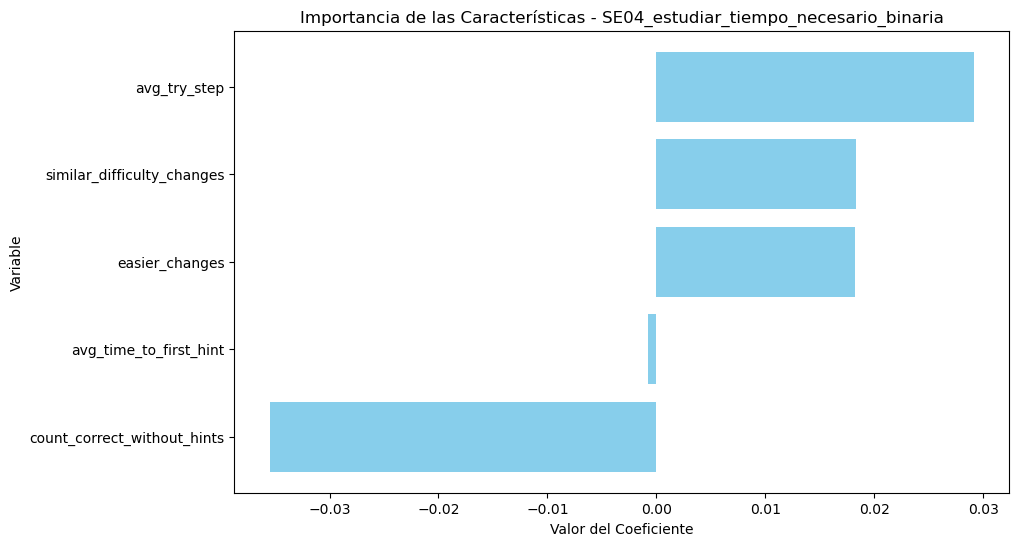



Evaluando modelo con SE15R_cuesta_clases_binaria como variable dependiente

VIF (Factor de Inflación de la Varianza):
                      Variable       VIF
0       avg_time_to_first_hint  1.712171
1                 avg_try_step  2.377625
2  count_correct_without_hints  6.158256
3   similar_difficulty_changes  4.765078
4               easier_changes  5.433496

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.41      0.56      0.47        16
           1       0.70      0.55      0.62        29

    accuracy                           0.56        45
   macro avg       0.55      0.56      0.54        45
weighted avg       0.59      0.56      0.57        45



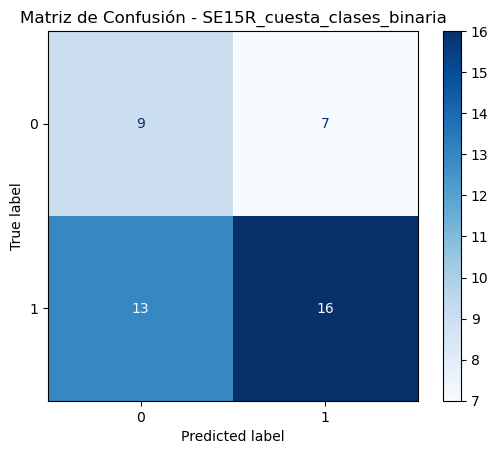


AUC para SE15R_cuesta_clases_binaria: 0.494


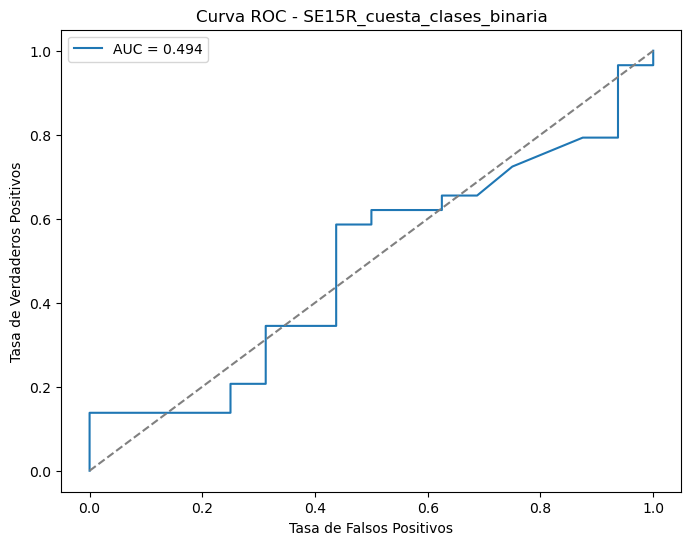


Coeficientes del modelo para SE15R_cuesta_clases_binaria:
                      Variable  Coeficiente
4               easier_changes     0.041216
0       avg_time_to_first_hint     0.005100
2  count_correct_without_hints    -0.020189
3   similar_difficulty_changes    -0.029934
1                 avg_try_step    -0.102106


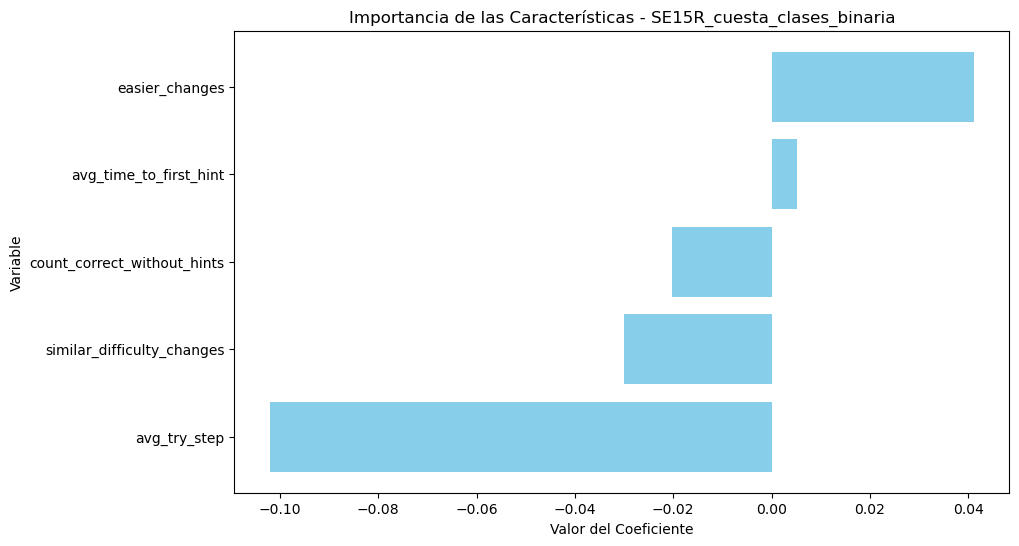



Evaluando modelo con SE06_entender_compleja_binaria como variable dependiente

VIF (Factor de Inflación de la Varianza):
                      Variable       VIF
0       avg_time_to_first_hint  1.712171
1                 avg_try_step  2.377625
2  count_correct_without_hints  6.158256
3   similar_difficulty_changes  4.765078
4               easier_changes  5.433496

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.35      0.53      0.42        15
           1       0.68      0.50      0.58        30

    accuracy                           0.51        45
   macro avg       0.51      0.52      0.50        45
weighted avg       0.57      0.51      0.52        45



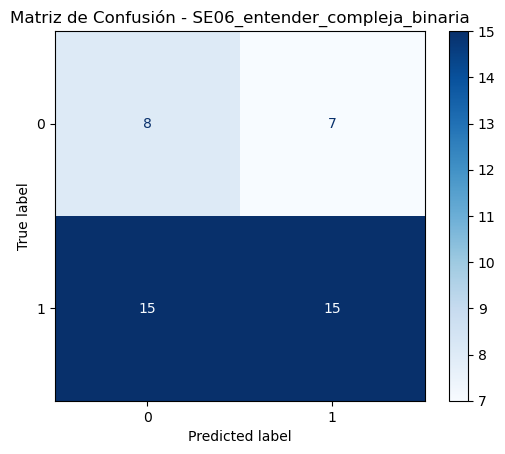


AUC para SE06_entender_compleja_binaria: 0.439


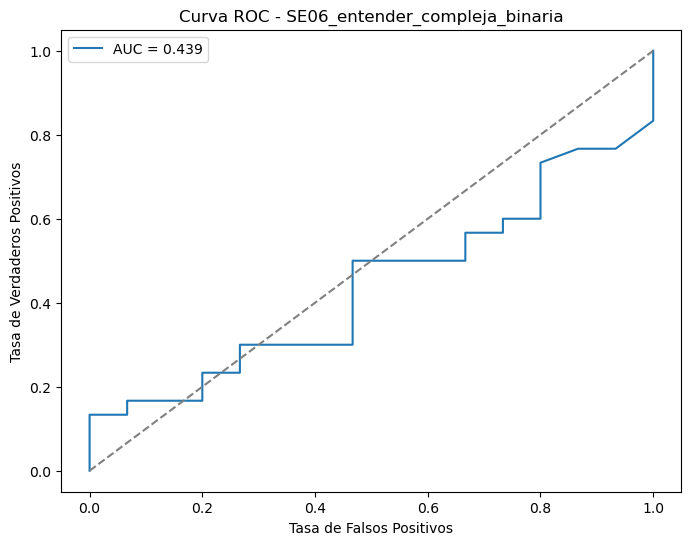


Coeficientes del modelo para SE06_entender_compleja_binaria:
                      Variable  Coeficiente
1                 avg_try_step     0.079481
4               easier_changes     0.016722
2  count_correct_without_hints     0.004552
0       avg_time_to_first_hint     0.001259
3   similar_difficulty_changes    -0.030160


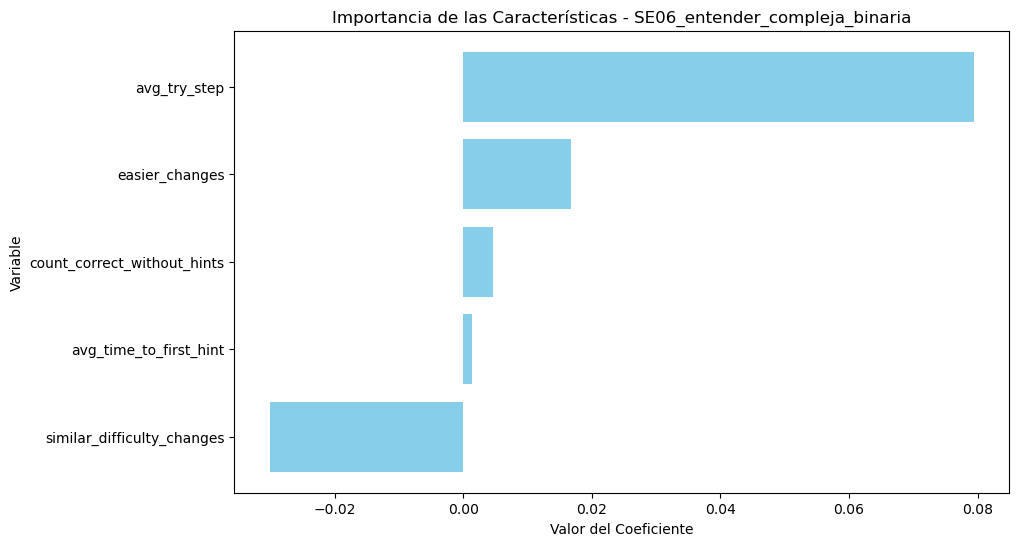



Evaluando modelo con SE08_buscar_ayuda_autonomia_binaria como variable dependiente

VIF (Factor de Inflación de la Varianza):
                      Variable       VIF
0       avg_time_to_first_hint  1.712171
1                 avg_try_step  2.377625
2  count_correct_without_hints  6.158256
3   similar_difficulty_changes  4.765078
4               easier_changes  5.433496

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.13      0.50      0.21         8
           1       0.73      0.30      0.42        37

    accuracy                           0.33        45
   macro avg       0.43      0.40      0.32        45
weighted avg       0.63      0.33      0.39        45



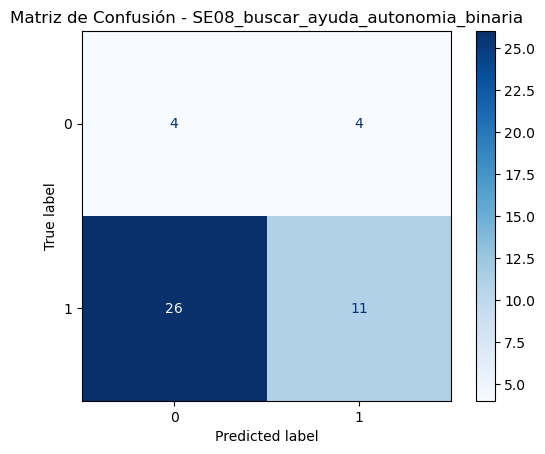


AUC para SE08_buscar_ayuda_autonomia_binaria: 0.334


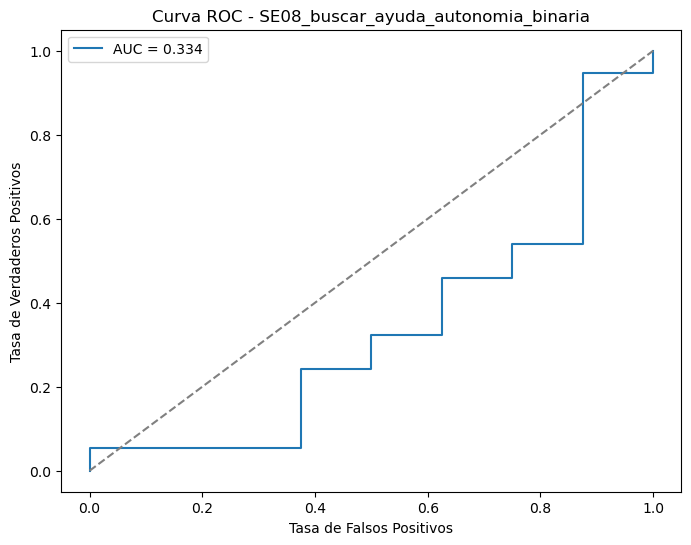


Coeficientes del modelo para SE08_buscar_ayuda_autonomia_binaria:
                      Variable  Coeficiente
1                 avg_try_step     0.028645
3   similar_difficulty_changes     0.014874
0       avg_time_to_first_hint     0.005277
2  count_correct_without_hints    -0.003556
4               easier_changes    -0.007749


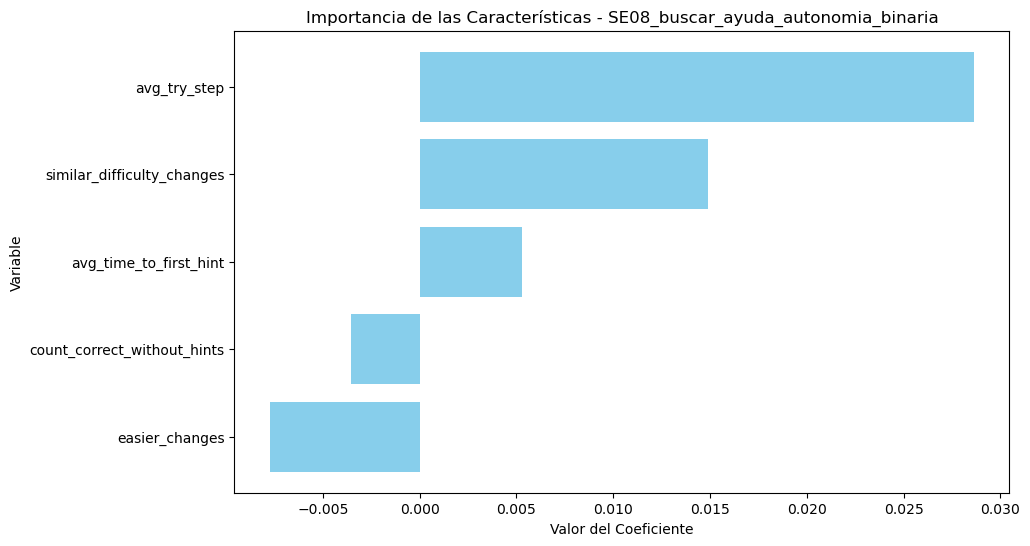



Evaluando modelo con SE09_conf_aprobar_binaria como variable dependiente

VIF (Factor de Inflación de la Varianza):
                      Variable       VIF
0       avg_time_to_first_hint  1.712171
1                 avg_try_step  2.377625
2  count_correct_without_hints  6.158256
3   similar_difficulty_changes  4.765078
4               easier_changes  5.433496

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.22      0.71      0.33         7
           1       0.91      0.53      0.67        38

    accuracy                           0.56        45
   macro avg       0.56      0.62      0.50        45
weighted avg       0.80      0.56      0.61        45



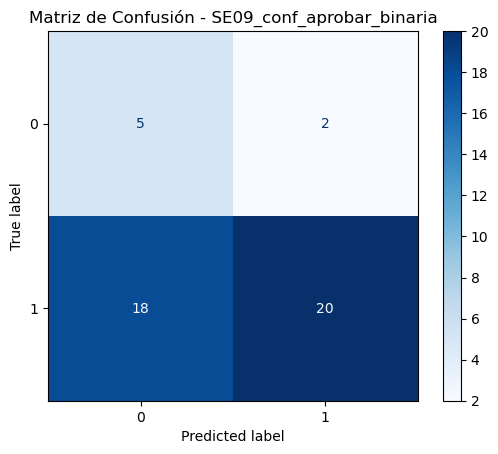


AUC para SE09_conf_aprobar_binaria: 0.664


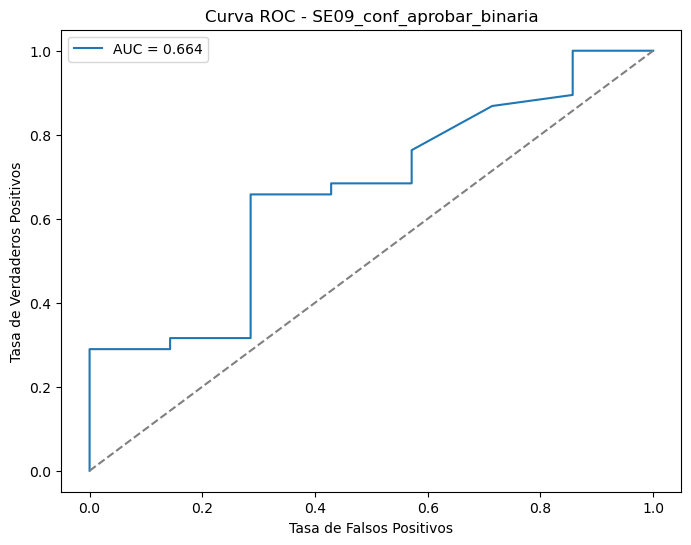


Coeficientes del modelo para SE09_conf_aprobar_binaria:
                      Variable  Coeficiente
2  count_correct_without_hints     0.074600
3   similar_difficulty_changes     0.068033
1                 avg_try_step     0.047395
0       avg_time_to_first_hint     0.006021
4               easier_changes    -0.051037


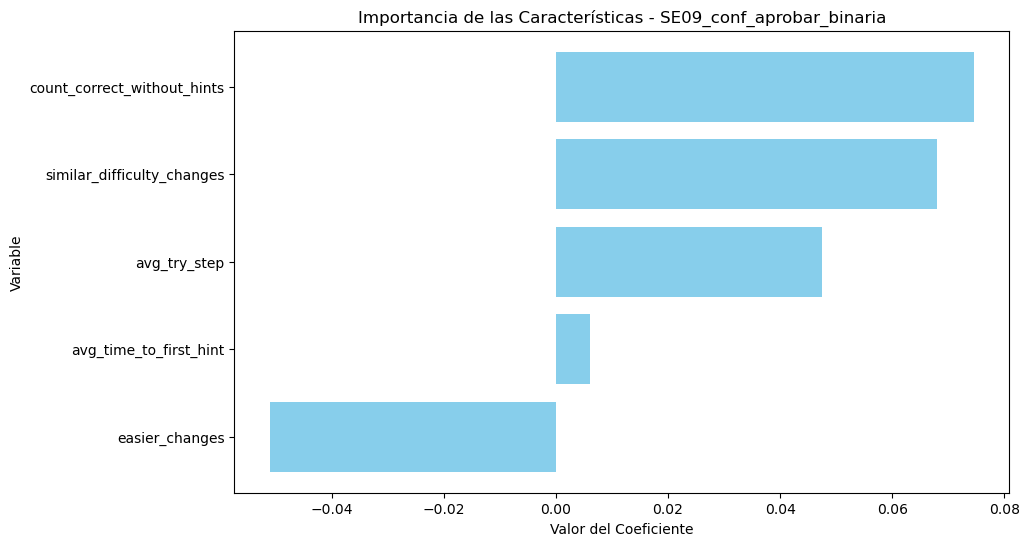



Evaluando modelo con SE10_identif_baches_binaria como variable dependiente

VIF (Factor de Inflación de la Varianza):
                      Variable       VIF
0       avg_time_to_first_hint  1.712171
1                 avg_try_step  2.377625
2  count_correct_without_hints  6.158256
3   similar_difficulty_changes  4.765078
4               easier_changes  5.433496

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.09      0.29      0.14         7
           1       0.78      0.47      0.59        38

    accuracy                           0.44        45
   macro avg       0.44      0.38      0.36        45
weighted avg       0.68      0.44      0.52        45



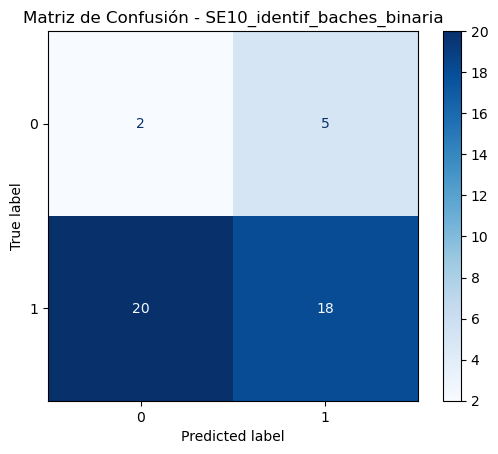


AUC para SE10_identif_baches_binaria: 0.305


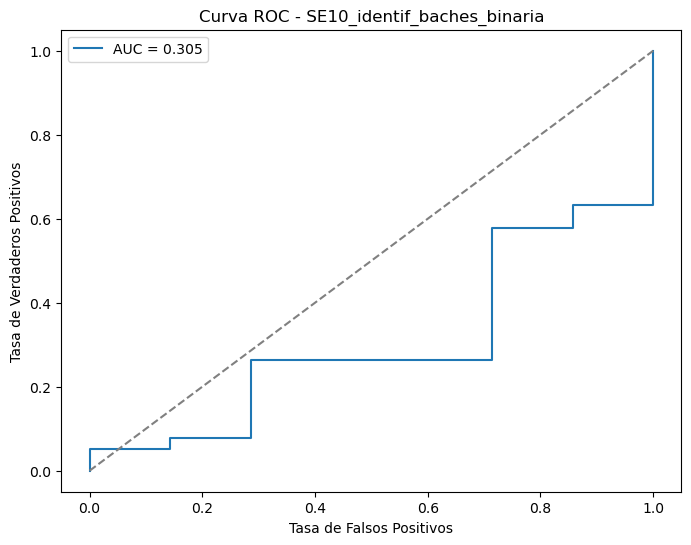


Coeficientes del modelo para SE10_identif_baches_binaria:
                      Variable  Coeficiente
1                 avg_try_step     0.191574
3   similar_difficulty_changes     0.044584
4               easier_changes     0.020878
0       avg_time_to_first_hint    -0.000997
2  count_correct_without_hints    -0.032517


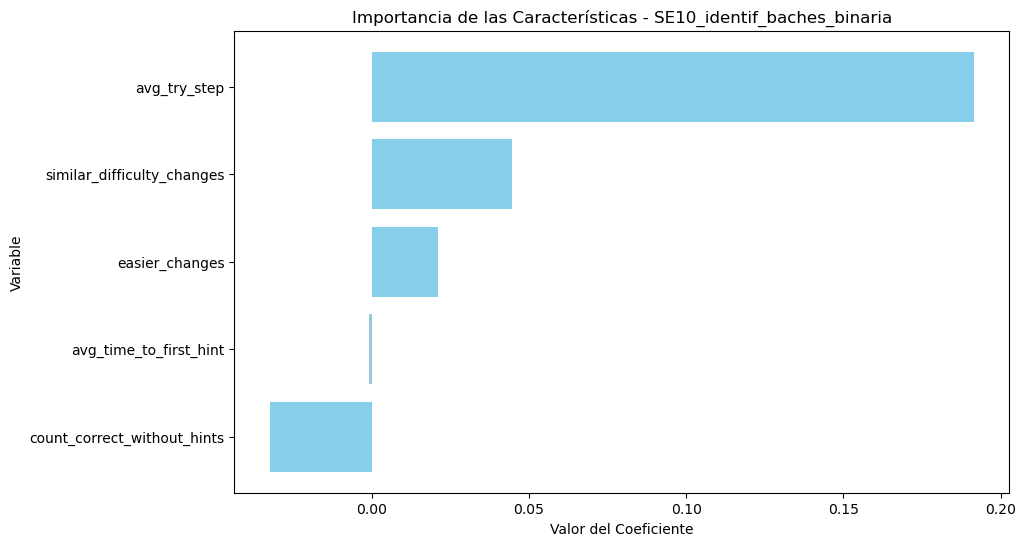



Evaluando modelo con SE16R_cuesta_comparacion_binaria como variable dependiente

VIF (Factor de Inflación de la Varianza):
                      Variable       VIF
0       avg_time_to_first_hint  1.712171
1                 avg_try_step  2.377625
2  count_correct_without_hints  6.158256
3   similar_difficulty_changes  4.765078
4               easier_changes  5.433496

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.24      0.40      0.30        15
           1       0.55      0.37      0.44        30

    accuracy                           0.38        45
   macro avg       0.40      0.38      0.37        45
weighted avg       0.45      0.38      0.39        45



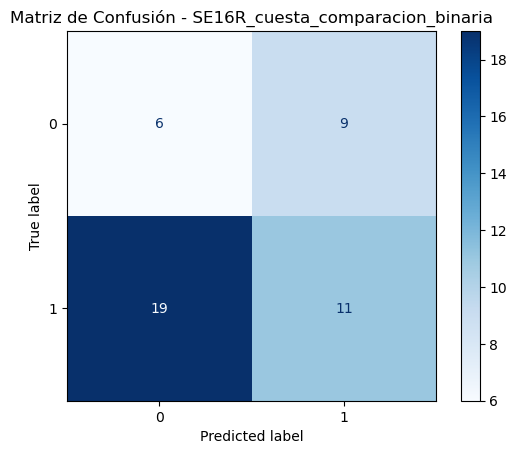


AUC para SE16R_cuesta_comparacion_binaria: 0.380


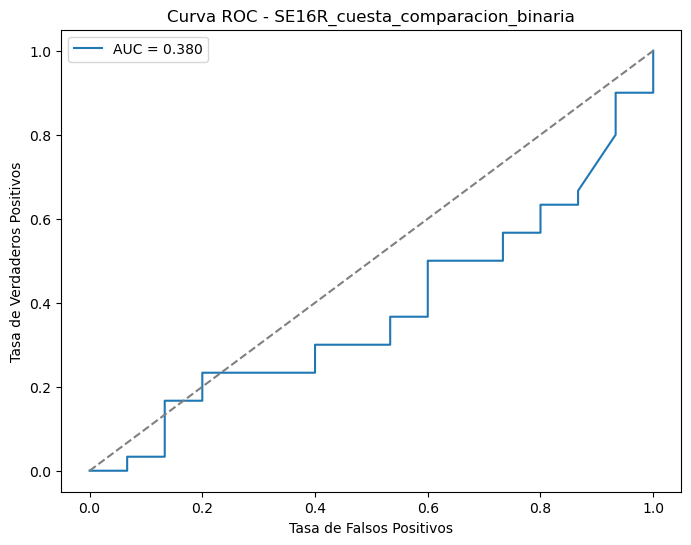


Coeficientes del modelo para SE16R_cuesta_comparacion_binaria:
                      Variable  Coeficiente
1                 avg_try_step     0.113039
2  count_correct_without_hints     0.000496
0       avg_time_to_first_hint    -0.000904
4               easier_changes    -0.002537
3   similar_difficulty_changes    -0.008644


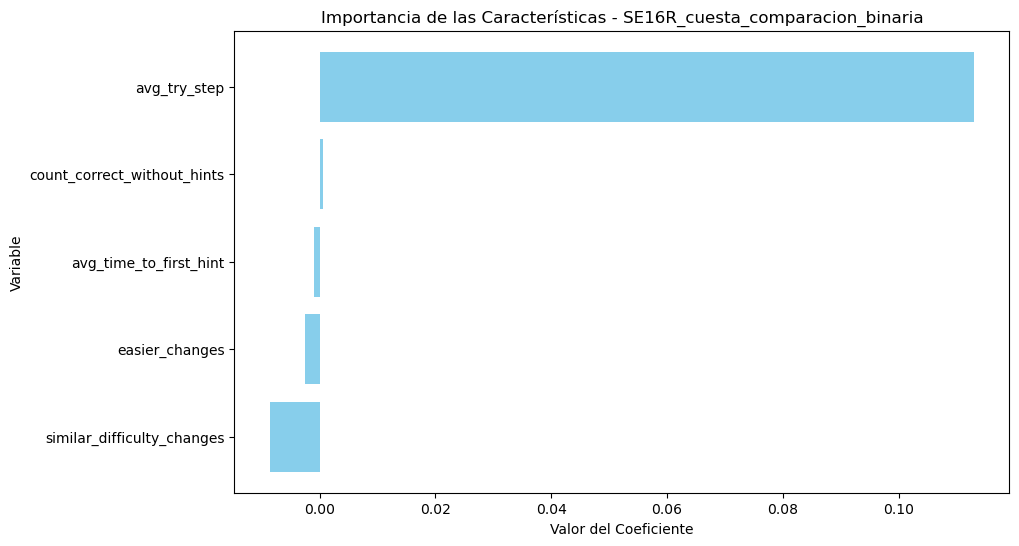



Evaluando modelo con SE11_entender_clases_binaria como variable dependiente

VIF (Factor de Inflación de la Varianza):
                      Variable       VIF
0       avg_time_to_first_hint  1.712171
1                 avg_try_step  2.377625
2  count_correct_without_hints  6.158256
3   similar_difficulty_changes  4.765078
4               easier_changes  5.433496

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.14      0.67      0.23         6
           1       0.88      0.36      0.51        39

    accuracy                           0.40        45
   macro avg       0.51      0.51      0.37        45
weighted avg       0.78      0.40      0.47        45



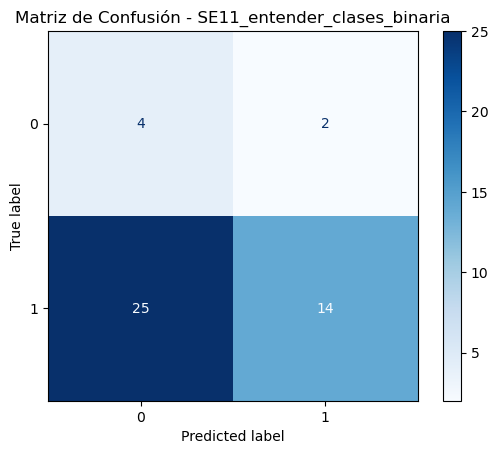


AUC para SE11_entender_clases_binaria: 0.470


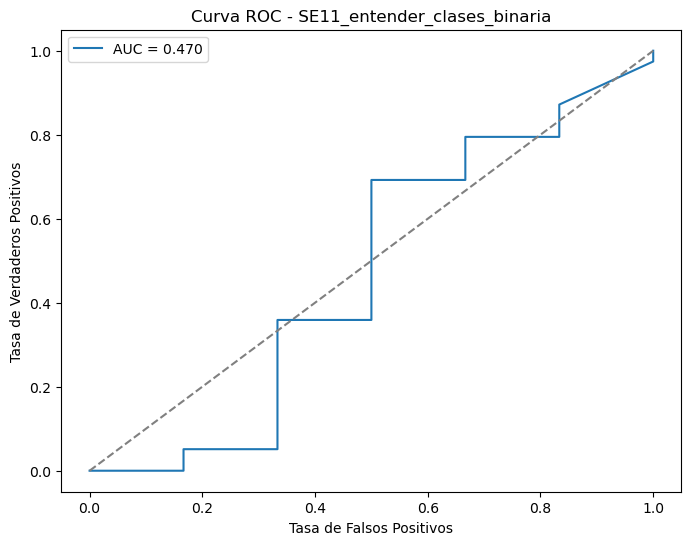


Coeficientes del modelo para SE11_entender_clases_binaria:
                      Variable  Coeficiente
3   similar_difficulty_changes     0.028795
4               easier_changes     0.014778
0       avg_time_to_first_hint     0.002763
1                 avg_try_step    -0.004463
2  count_correct_without_hints    -0.010694


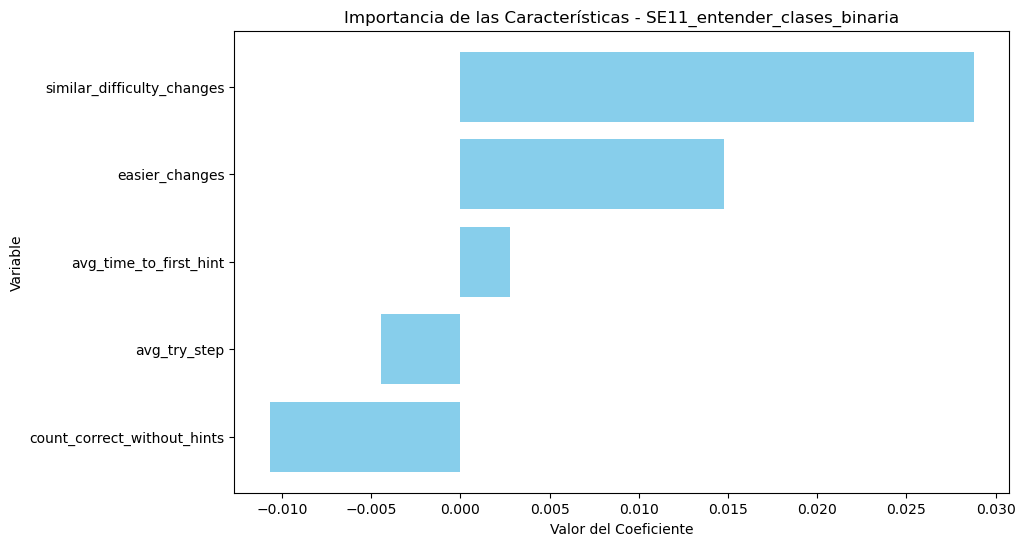



Evaluando modelo con SE13_resiliencia_binaria como variable dependiente

VIF (Factor de Inflación de la Varianza):
                      Variable       VIF
0       avg_time_to_first_hint  1.712171
1                 avg_try_step  2.377625
2  count_correct_without_hints  6.158256
3   similar_difficulty_changes  4.765078
4               easier_changes  5.433496

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.22      0.40      0.29        10
           1       0.78      0.60      0.68        35

    accuracy                           0.56        45
   macro avg       0.50      0.50      0.48        45
weighted avg       0.65      0.56      0.59        45



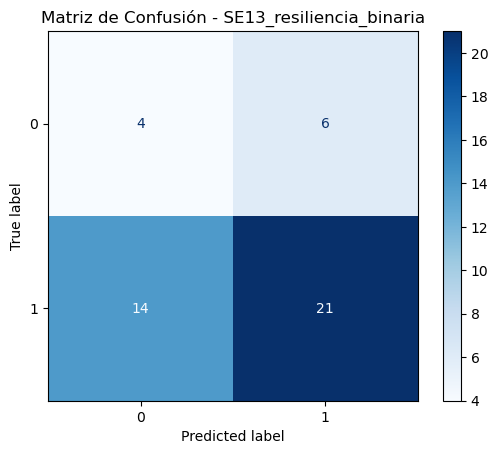


AUC para SE13_resiliencia_binaria: 0.620


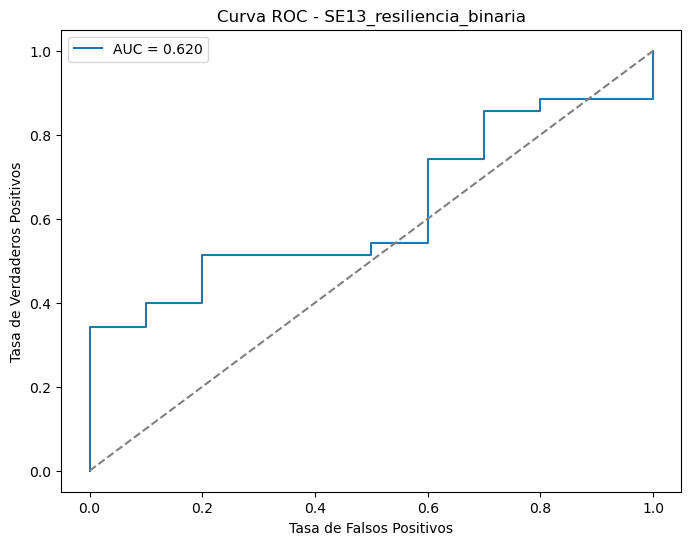


Coeficientes del modelo para SE13_resiliencia_binaria:
                      Variable  Coeficiente
2  count_correct_without_hints     0.084422
3   similar_difficulty_changes     0.055530
1                 avg_try_step     0.049162
0       avg_time_to_first_hint     0.000881
4               easier_changes    -0.063566


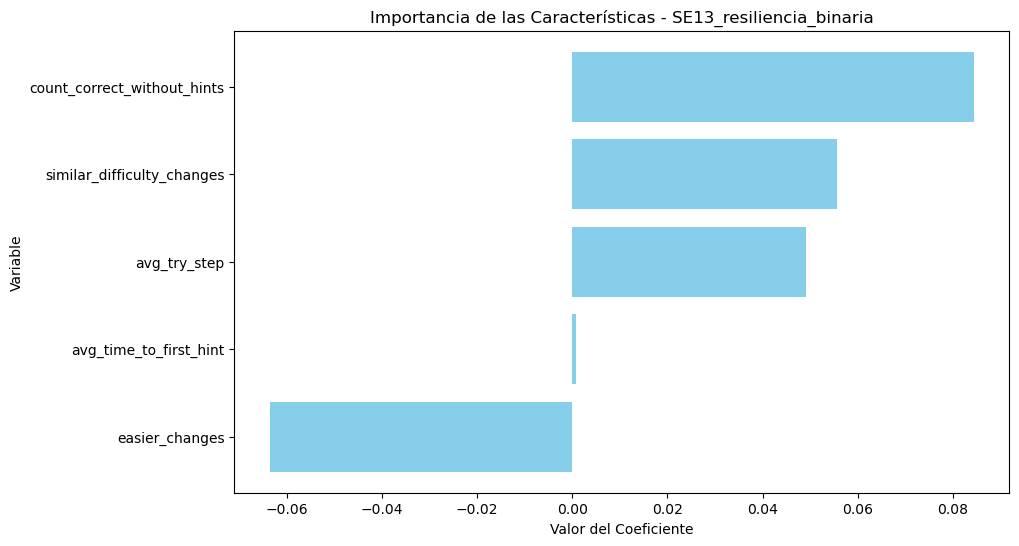

In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt

columnas_autoeficacia = [
    'SE01_conf_aprender', 'SE02_autonomia_aprender',
    'SE14R_cuesta_ejercicios', 'SE03_resolver_ejercicios',
    'SE04_estudiar_tiempo_necesario', 'SE15R_cuesta_clases',
    'SE06_entender_compleja', 'SE08_buscar_ayuda_autonomia',
    'SE09_conf_aprobar', 'SE10_identif_baches', 'SE16R_cuesta_comparacion',
    'SE11_entender_clases', 'SE13_resiliencia'
]

variables_significativas = [
    'avg_time_to_first_hint', 'avg_try_step',
    'count_correct_without_hints', 'similar_difficulty_changes',
    'easier_changes'
]

for col in columnas_autoeficacia:
    df.loc[:, f'{col}_binaria'] = np.where(df[col] >= 4, 1, 0)

columnas_autoeficacia_binarias = [f'{col}_binaria' for col in columnas_autoeficacia]

# Crear DataFrame para el modelo
df_modelo = df[columnas_autoeficacia_binarias + variables_significativas].dropna()

# Iterar sobre cada columna de autoeficacia binaria
for col in columnas_autoeficacia_binarias:
    print(f"\n\nEvaluando modelo con {col} como variable dependiente")

    # Dividir datos en entrenamiento y prueba
    X = df_modelo[variables_significativas]
    y = df_modelo[col]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    vif_data = pd.DataFrame()
    vif_data["Variable"] = variables_significativas
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    print("\nVIF (Factor de Inflación de la Varianza):")
    print(vif_data)

    # Ajustar el modelo de regresión logística con ponderación de clases
    modelo = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
    modelo.fit(X_train, y_train)

    # Predicciones
    y_pred = modelo.predict(X_test)
    y_prob = modelo.predict_proba(X_test)[:, 1]

    # Evaluar el modelo
    print("\nReporte de clasificación:")
    print(classification_report(y_test, y_pred))

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelo.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Matriz de Confusión - {col}")
    plt.show()

    # Calcular y graficar ROC-AUC
    auc = roc_auc_score(y_test, y_prob)
    print(f"\nAUC para {col}: {auc:.3f}")

    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'AUC = {auc:.3f}')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title(f'Curva ROC - {col}')
    plt.legend()
    plt.show()

    # Mostrar los coeficientes del modelo
    coeficientes = pd.DataFrame({
        'Variable': variables_significativas,
        'Coeficiente': modelo.coef_[0]
    }).sort_values(by='Coeficiente', ascending=False)

    print(f"\nCoeficientes del modelo para {col}:")
    print(coeficientes)

    # Visualizar la importancia de las características
    plt.figure(figsize=(10, 6))
    plt.barh(coeficientes['Variable'], coeficientes['Coeficiente'], color='skyblue')
    plt.xlabel("Valor del Coeficiente")
    plt.ylabel("Variable")
    plt.title(f"Importancia de las Características - {col}")
    plt.gca().invert_yaxis()
    plt.show()
